# I Preparation

In [1]:
# Uncomment the pip install commands if needed:
!pip install squarify
!pip install keras-tuner
!pip install optuna

# base packages
import pandas as pd
import numpy as np
import math
import optuna

# stats
from scipy import stats
from scipy.stats import linregress, pearsonr
import statsmodels.api as sm

# dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import squarify  # Uncomment if needed

# data modeling and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# deep learning
from keras.models import Sequential
from keras.layers import Dense, LSTM
# from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras.models import load_model
from keras.utils import plot_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [2]:
# Mount GDrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets

df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')

df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

df_FAO = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')


# II Exploratory analysis

## 2.1 The NASA GISS Surface Temperature Analysis (GISTEMP) version 4

In [ ]:
# Load NASA dataset
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.head()

Year  Glob  NHem  SHem  24N-90N  ...  EQU-24N  24S-EQU  44S-24S  64S-44S  \
0  1880 -0.17 -0.30 -0.05    -0.40  ...    -0.14    -0.10    -0.04     0.05   
1  1881 -0.09 -0.18  0.00    -0.37  ...     0.11     0.11    -0.06    -0.07   
2  1882 -0.11 -0.22 -0.01    -0.33  ...    -0.04    -0.04     0.01     0.04   
3  1883 -0.18 -0.30 -0.07    -0.37  ...    -0.17    -0.15    -0.04     0.07   
4  1884 -0.29 -0.44 -0.15    -0.63  ...    -0.12    -0.16    -0.20    -0.02   

   90S-64S  
0     0.67  
1     0.60  
2     0.63  
3     0.50  
4     0.65  

[5 rows x 15 columns]

In [ ]:
# GENERAL DATASET INFO

df_NASA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     143 non-null    int64  
 1   Glob     143 non-null    float64
 2   NHem     143 non-null    float64
 3   SHem     143 non-null    float64
 4   24N-90N  143 non-null    float64
 5   24S-24N  143 non-null    float64
 6   90S-24S  143 non-null    float64
 7   64N-90N  143 non-null    float64
 8   44N-64N  143 non-null    float64
 9   24N-44N  143 non-null    float64
 10  EQU-24N  143 non-null    float64
 11  24S-EQU  143 non-null    float64
 12  44S-24S  143 non-null    float64
 13  64S-44S  143 non-null    float64
 14  90S-64S  143 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 16.9 KB


In [ ]:
# SUMMARY STATISTICS

df_NASA.describe()

Year        Glob        NHem        SHem     24N-90N  ...  \
count   143.00000  143.000000  143.000000  143.000000  143.000000  ...   
mean   1951.00000    0.058252    0.086853    0.030070    0.108462  ...   
std      41.42463    0.368110    0.441967    0.313877    0.535121  ...   
min    1880.00000   -0.490000   -0.570000   -0.480000   -0.670000  ...   
25%    1915.50000   -0.200000   -0.220000   -0.220000   -0.300000  ...   
50%    1951.00000   -0.060000    0.000000   -0.060000    0.020000  ...   
75%    1986.50000    0.265000    0.245000    0.270000    0.365000  ...   
max    2022.00000    1.010000    1.340000    0.750000    1.670000  ...   

          EQU-24N     24S-EQU    44S-24S     64S-44S     90S-64S  
count  143.000000  143.000000  143.00000  143.000000  143.000000  
mean     0.058112    0.076783    0.03986   -0.056923   -0.079091  
std      0.342423    0.350458    0.33225    0.274512    0.761570  
min     -0.670000   -0.590000   -0.45000   -0.550000   -2.600000  
25%     -0.210000   -0.175000   -0.22000   -0.260000   -0.530000  
50%      0.000000   -0.010000   -0.06000   -0.080000    0.040000  
75%      0.275000    0.310000    0.28500    0.190000    0.445000  
max      0.960000    1.070000    0.80000    0.440000    1.270000  

[8 rows x 15 columns]

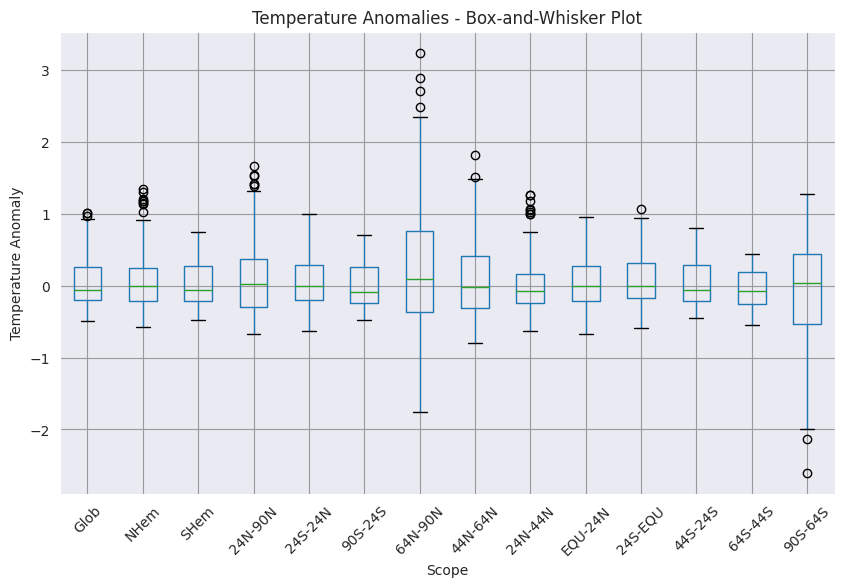

In [ ]:
# BOX-WHISKER-PLOTS

# Select the columns for the box-and-whisker plot
columns = ['Glob', 'NHem', 'SHem', "24N-90N", "24S-24N", "90S-24S", "64N-90N", "44N-64N", "24N-44N",
           "EQU-24N", "24S-EQU", "44S-24S", "64S-44S", "90S-64S"]

# Create the box-and-whisker plot
plt.figure(figsize=(10, 6))  # Set the figure size
df_NASA[columns].boxplot()  # Plot the selected columns as box-and-whisker plots

# Customize the plot
plt.title('Temperature Anomalies - Box-and-Whisker Plot')
plt.xlabel('Scope')
plt.ylabel('Temperature Anomaly')
plt.xticks(rotation=45)

# Display the plot
plt.show()


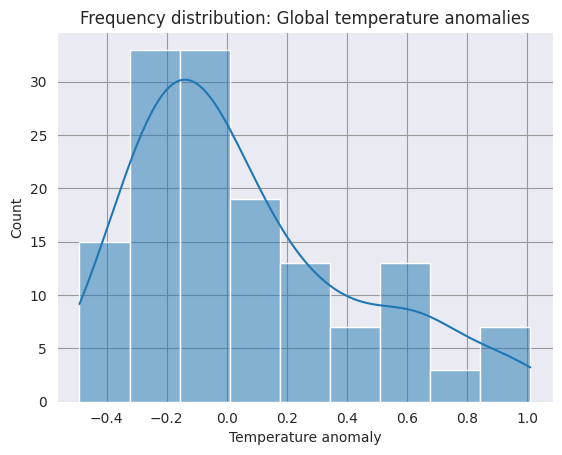

In [ ]:
# GLOBAL TEMPERATURE CHANGE FREQUENCY DISTRIBUTION

sns.set_style("darkgrid", {"grid.color": ".6"})
sns.histplot(df_NASA.Glob, kde = True)
plt.title('Frequency distribution: Global temperature anomalies')
plt.xlabel('Temperature anomaly');

In [ ]:
# OUTLIER ANALYSIS

# Create a copy of the original dataframe to avoid any unwanted modifications
df_NASA = df_NASA.copy()

# Initialize an empty list to store dataframes with outliers for each column
outliers_list = []

# Iterate over columns of the dataframe (excluding the first column 'Year')
for column in df_NASA.columns[1:]:

    # Extract temperature values for the current column
    temperatures = df_NASA[column]

    # Calculate the first quartile (Q1) and third quartile (Q3) of the data
    q1 = temperatures.quantile(0.25)
    q3 = temperatures.quantile(0.75)

    # Compute the Interquartile Range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers based on the IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and extract rows that are outliers for the current column
    outliers_iqr = df_NASA[(temperatures < lower_bound) | (temperatures > upper_bound)][['Year', column]]
    # Rename the columns to standard names for aggregation
    outliers_iqr.columns = ['Year', 'OutlierValue']
    # Add a column to indicate which original column the outlier came from
    outliers_iqr['Variable'] = column
    # Append the dataframe with outliers for the current column to the list
    outliers_list.append(outliers_iqr)

# Concatenate all outlier dataframes into a single dataframe
outliers_df = pd.concat(outliers_list)

# Display the resulting dataframe with all outliers
outliers_df

# Group the outliers by year, aggregating the variable names and their corresponding outlier values
grouped_outliers = outliers_df.groupby('Year').agg({
    'Variable': list,
    'OutlierValue': list
}).reset_index()

# Display the grouped outliers
grouped_outliers


Year                                          Variable  \
0  1928                                         [90S-64S]   
1  1930                                         [90S-64S]   
2  2015                                   [NHem, 24N-44N]   
3  2016  [Glob, NHem, 24N-90N, 64N-90N, 24N-44N, 24S-EQU]   
4  2017                 [NHem, 24N-90N, 64N-90N, 24N-44N]   
5  2018                                   [NHem, 24N-44N]   
6  2019           [Glob, NHem, 24N-90N, 64N-90N, 24N-44N]   
7  2020  [Glob, NHem, 24N-90N, 64N-90N, 44N-64N, 24N-44N]   
8  2021                          [NHem, 24N-90N, 24N-44N]   
9  2022                 [NHem, 24N-90N, 44N-64N, 24N-44N]   

                           OutlierValue  
0                               [-2.13]  
1                                [-2.6]  
2                          [1.17, 0.99]  
3   [1.01, 1.3, 1.54, 3.24, 1.07, 1.07]  
4              [1.17, 1.38, 2.49, 1.03]  
5                          [1.03, 1.05]  
6         [0.97, 1.2, 1.41, 2.71, 0.99]  
7  [1.01, 1.34, 1.67, 2.89, 1.82, 1.18]  
8                    [1.13, 1.42, 1.26]  
9              [1.15, 1.52, 1.51, 1.26]

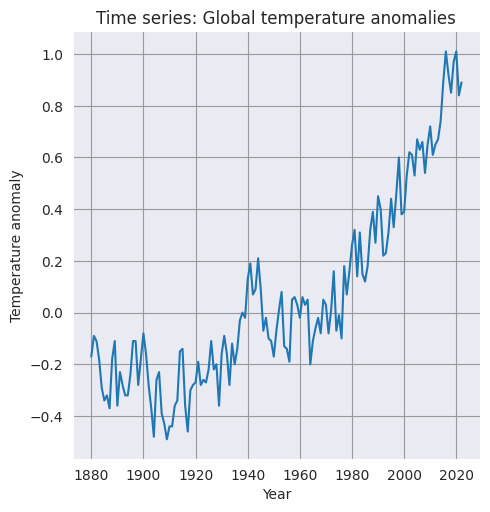

In [ ]:
# TIME-SERIES PLOT GLOBAL

sns.relplot(x = 'Year', y = 'Glob', kind = 'line', data = df_NASA)
plt.title('Time series: Global temperature anomalies')
plt.ylabel('Temperature anomaly');

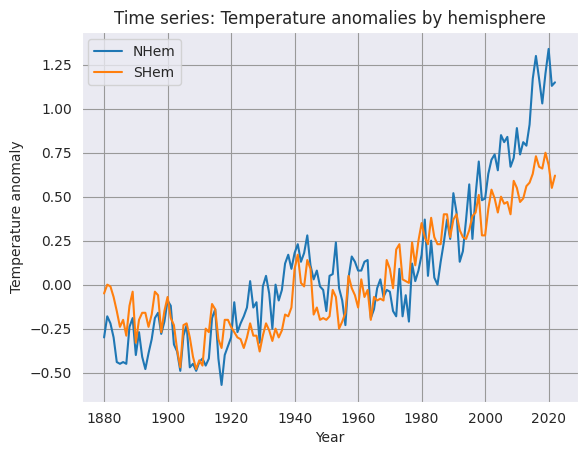

In [ ]:
# TIME-SERIES PLOT BY HEMISPHERE

df_NASA.plot.line(x = 'Year', y = [ 'NHem', 'SHem'])
plt.title('Time series: Temperature anomalies by hemisphere')
plt.ylabel('Temperature anomaly');

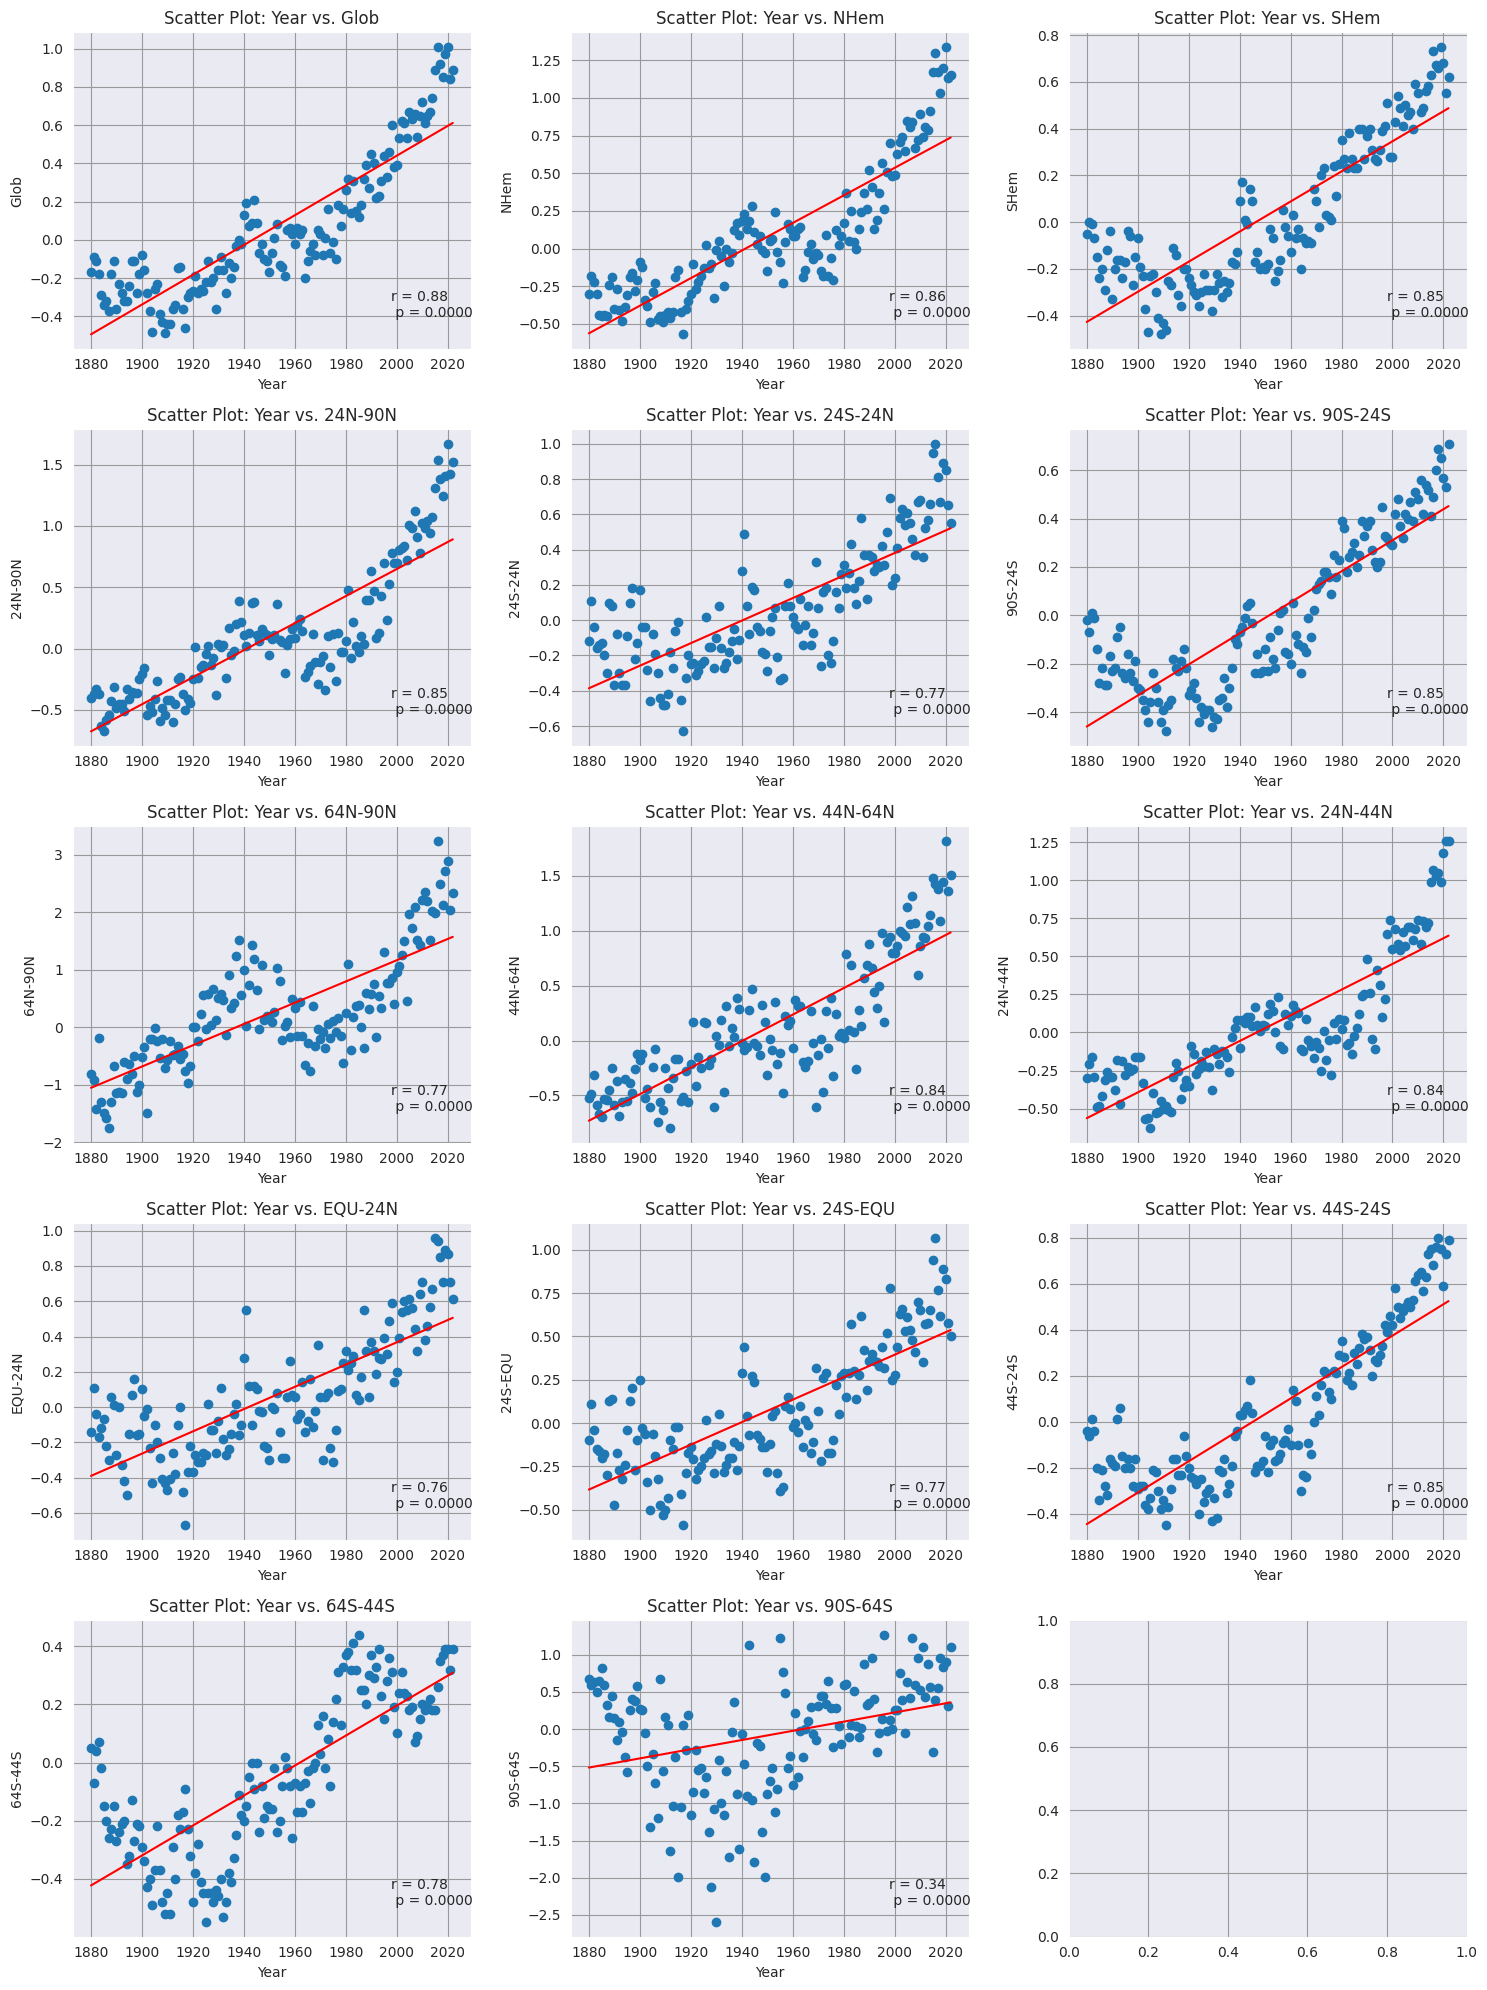

In [ ]:
# number of columns
num_cols = len(df_NASA.columns) - 1  # ignore the year-column

# Calculate number of rows and columns in subplot grid
num_rows = math.ceil(num_cols / 3)
num_cols_subplot = min(num_cols, 3)

# Set the size of the subplot grid
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(15, 4 * num_rows))

# Iterate over all columns except the first one (Year)
for i, column in enumerate(df_NASA.columns[1:]):
    # Calculate row and column index in subplot grid
    row_idx = i // 3
    col_idx = i % 3

    # Calculate row and column index in subplot grid
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    ax.scatter(df_NASA['Year'], df_NASA[column])
    ax.set_xlabel('Year')
    ax.set_ylabel(column)
    ax.set_title(f'Scatter Plot: Year vs. {column}')

    # Linear Regression
    slope, intercept, r_value, p_value, std_err = linregress(df_NASA['Year'], df_NASA[column])
    line = slope * df_NASA['Year'] + intercept
    ax.plot(df_NASA['Year'], line, color='red')

    # Add correlation coefficient and p-value as text
    ax.text(0.8, 0.1, f'r = {r_value:.2f}\n p = {p_value:.4f}', transform=ax.transAxes)

# Remove empty subplots if necessary
if num_cols_subplot < 3:
    for i in range(num_cols_subplot, 3):
        fig.delaxes(axes[row_idx, i])

plt.tight_layout()
plt.show()

## 2.2 The FAO Annual Surface Temperature Change dataset

In [ ]:
# Read the data into a dataframe
path = '/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv'
df_FAO = pd.read_csv(path)

df_FAO.head()

ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   

                                           Indicator  ...  F2018  F2019  \
0  Temperature change with respect to a baseline ...  ...  1.544  0.910   
1  Temperature change with respect to a baseline ...  ...  2.028  1.675   
2  Temperature change with respect to a baseline ...  ...  1.210  1.115   
3  Temperature change with respect to a baseline ...  ...  1.189  1.539   
4  Temperature change with respect to a baseline ...  ...  1.919  1.964   

   F2020  F2021  F2022  
0  0.498  1.327  2.012  
1  1.498  1.536  1.518  
2  1.926  2.330  1.688  
3  1.430  1.268  1.256  
4  2.562  1.533  3.243  

[5 rows x 72 columns]

In [ ]:
df_FAO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [ ]:
# Calculate summary statistics
pd.set_option('display.max_columns', 10)
df_FAO[df_FAO.columns[2:]].describe()

F1961       F1962       F1963       F1964       F1965  ...  \
count  188.000000  189.000000  188.000000  188.000000  188.000000  ...   
mean     0.163053   -0.013476   -0.006043   -0.070059   -0.247027  ...   
std      0.405080    0.341812    0.387348    0.309305    0.270734  ...   
min     -0.694000   -0.908000   -1.270000   -0.877000   -1.064000  ...   
25%     -0.097000   -0.164000   -0.205500   -0.236500   -0.392500  ...   
50%      0.064500   -0.056000   -0.003000   -0.056000   -0.230500  ...   
75%      0.318500    0.114000    0.230500    0.132500   -0.091500  ...   
max      1.892000    0.998000    1.202000    1.097000    0.857000  ...   

            F2018       F2019       F2020       F2021       F2022  
count  213.000000  213.000000  212.000000  213.000000  213.000000  
mean     1.302113    1.443061    1.552038    1.343531    1.382113  
std      0.596786    0.467510    0.621930    0.484692    0.669279  
min      0.238000    0.050000    0.229000   -0.425000   -1.305000  
25%      0.865000    1.169000    1.161750    1.019000    0.878000  
50%      1.125000    1.412000    1.477000    1.327000    1.315000  
75%      1.834000    1.698000    1.826250    1.629000    1.918000  
max      2.772000    2.689000    3.691000    2.676000    3.243000  

[8 rows x 62 columns]

In [ ]:
# Create additional unpivoted version of the dataset

## unpivot the df
id_vars = df_FAO.columns.tolist()[:10] # all columns up to 'CTS_Full_Descriptor' are considered id variables
df_melted = pd.melt(df_FAO, id_vars=id_vars, var_name='Year', value_name='Temperature Change')

# Sort values
df_FAO_unpivot = df_melted.sort_values(['Country', 'Year'])


# Clean "Year" column
df_FAO_unpivot['Year'] = df_FAO_unpivot['Year'].apply(lambda x: x[1:]).astype(int)

In [ ]:
# Analyze missing values

df_FAO_unpivot.isna().sum()

ObjectId                  0
Country                   0
ISO2                    124
ISO3                      0
Indicator                 0
Unit                      0
Source                    0
CTS_Code                  0
CTS_Name                  0
CTS_Full_Descriptor       0
Year                      0
Temperature Change     1490
dtype: int64

In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = df_FAO_unpivot['Temperature Change'].quantile(0.25)
Q3 = df_FAO_unpivot['Temperature Change'].quantile(0.75)
IQR = Q3 - Q1

# Set the thresholds
lower_threshold_1_5 = Q1 - 1.5 * IQR
upper_threshold_1_5 = Q3 + 1.5 * IQR
lower_threshold_3 = Q1 - 3 * IQR
upper_threshold_3 = Q3 + 3 * IQR

# Identify outliers
outliers_1_5 = (df_FAO_unpivot['Temperature Change'] < lower_threshold_1_5) | (df_FAO_unpivot['Temperature Change'] > upper_threshold_1_5)
outliers_3 = (df_FAO_unpivot['Temperature Change'] < lower_threshold_3) | (df_FAO_unpivot['Temperature Change'] > upper_threshold_3)

# Create the scatter plot for outliers with IQR 1.5
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_FAO_unpivot['Year'],
    y=df_FAO_unpivot['Temperature Change'],
    mode='markers',
    name='Data'
))
fig.add_trace(go.Scatter(
    x=df_FAO_unpivot['Year'][outliers_1_5],
    y=df_FAO_unpivot['Temperature Change'][outliers_1_5],
    mode='markers',
    name='Outliers (IQR 1.5)',
    marker=dict(
        color='red',
        size=8,
        symbol='cross'
    )
))

# Create the scatter plot for outliers with 3 standard deviations
fig.add_trace(go.Scatter(
    x=df_FAO_unpivot['Year'],
    y=df_FAO_unpivot['Temperature Change'],
    mode='markers',
    name='Data'
))
fig.add_trace(go.Scatter(
    x=df_FAO_unpivot['Year'][outliers_3],
    y=df_FAO_unpivot['Temperature Change'][outliers_3],
    mode='markers',
    name='Outliers (IQR 3)',
    marker=dict(
        color='blue',
        size=8,
        symbol='cross'
    )
))

# Customize the plot properties
fig.update_layout(
    title=" FAO datast - Outlier diagram",
    xaxis_title="Year",
    yaxis_title="Temperature Change"
)

# Show the plot
fig.show()


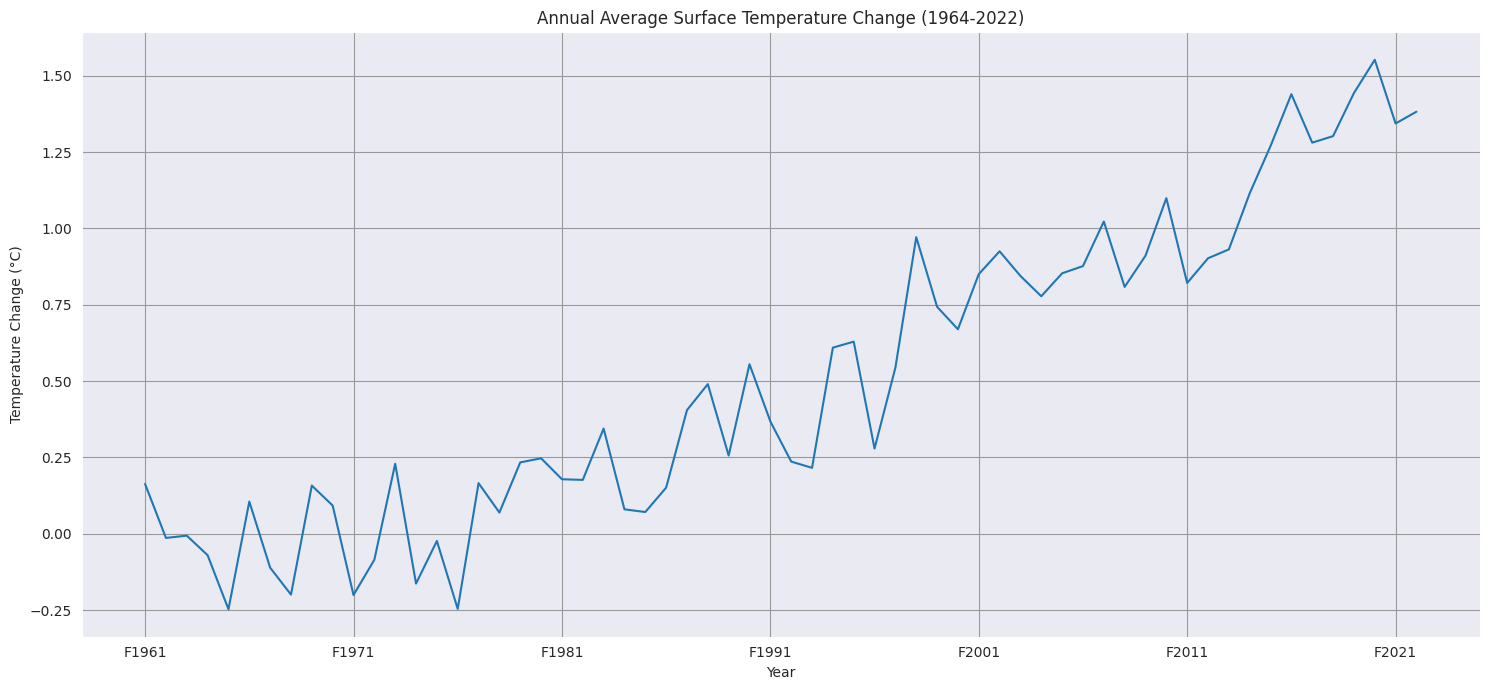

In [ ]:
import matplotlib.pyplot as plt

# Visualize the annual average temperature change across the years

## Extract the temperature columns
temp_columns = df_FAO.columns[10:]

# Calculate annual average temperature change
annual_avg_temp_change = df_FAO[temp_columns].mean()

# Plot the annual average temperature change
plt.figure(figsize=(15, 7))
annual_avg_temp_change.plot()
plt.title('Annual Average Surface Temperature Change (1964-2022)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

## unpivot the df
id_vars = df_FAO.columns.tolist()[:10] # all columns up to 'CTS_Full_Descriptor' are considered id variables
df_melted = pd.melt(df_FAO, id_vars=id_vars, var_name='Year', value_name='Temperature Change')

# Sort values
df_FAO_unpivot = df_melted.sort_values(['Country', 'Year'])


# Clean "Year" column
df_FAO_unpivot['Year'] = df_FAO_unpivot['Year'].apply(lambda x: x[1:]).astype(int)


df_FAO_unpivot

# Assume df_sorted is your DataFrame of temperature changes
df_FAO_unpivot['Year'] = df_FAO_unpivot['Year'].astype(str)

# Get min and max temperature for color range
min_temp = df_FAO_unpivot['Temperature Change'].min()
max_temp = df_FAO_unpivot['Temperature Change'].max()

fig = px.choropleth(df_FAO_unpivot,              # Data
                    locations="ISO3",       # Column containing country ISO codes
                    color="Temperature Change",    # Column giving color intensity
                    hover_name="Country",   # Hover info will display country name
                    animation_frame="Year", # Column representing different frames (i.e., years)
                    title="Temperature change over time",  # Title of chart
                    height=600,             # Height of chart
                    color_continuous_scale=px.colors.sequential.Plasma,  # Color scheme
                    range_color=(min_temp, max_temp),  # Fixed color range
                    projection="natural earth"  # Map projection
)

fig.show()


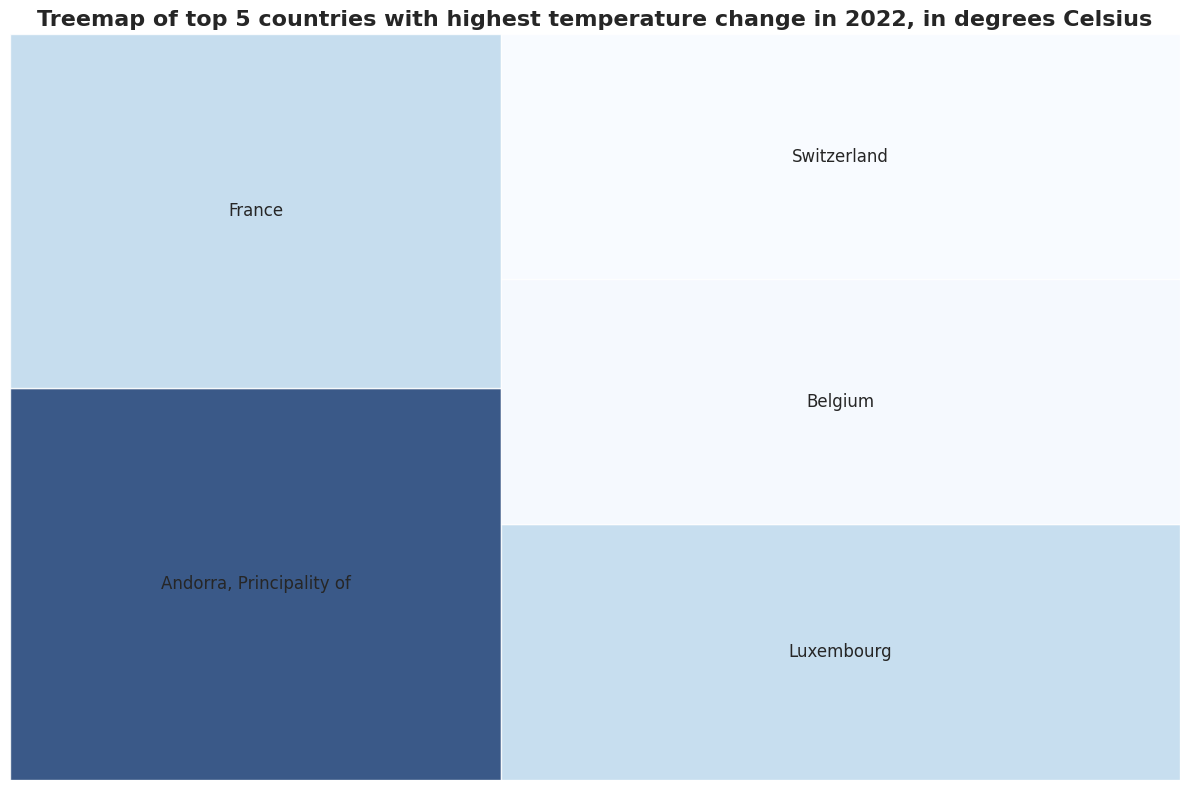

In [ ]:
# Identify top 5 countries with the highest temperature changes for 2022
top_countries_2022 = df_FAO[["Country", "F2022"]].sort_values(by="F2022", ascending=False)

## Get top 5 and bottom 5 countries
top_5_countries = top_countries_2022.head(5)

## Calculate the treemap sizes
sizes = top_5_countries['F2022']
norm = plt.Normalize(vmin=min(sizes), vmax=max(sizes))
colors = plt.cm.Blues(norm(sizes))

## Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes,
    label=top_5_countries['Country'],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 12}
)
plt.axis('off')
plt.title('Treemap of top 5 countries with highest temperature change in 2022, in degrees Celsius', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


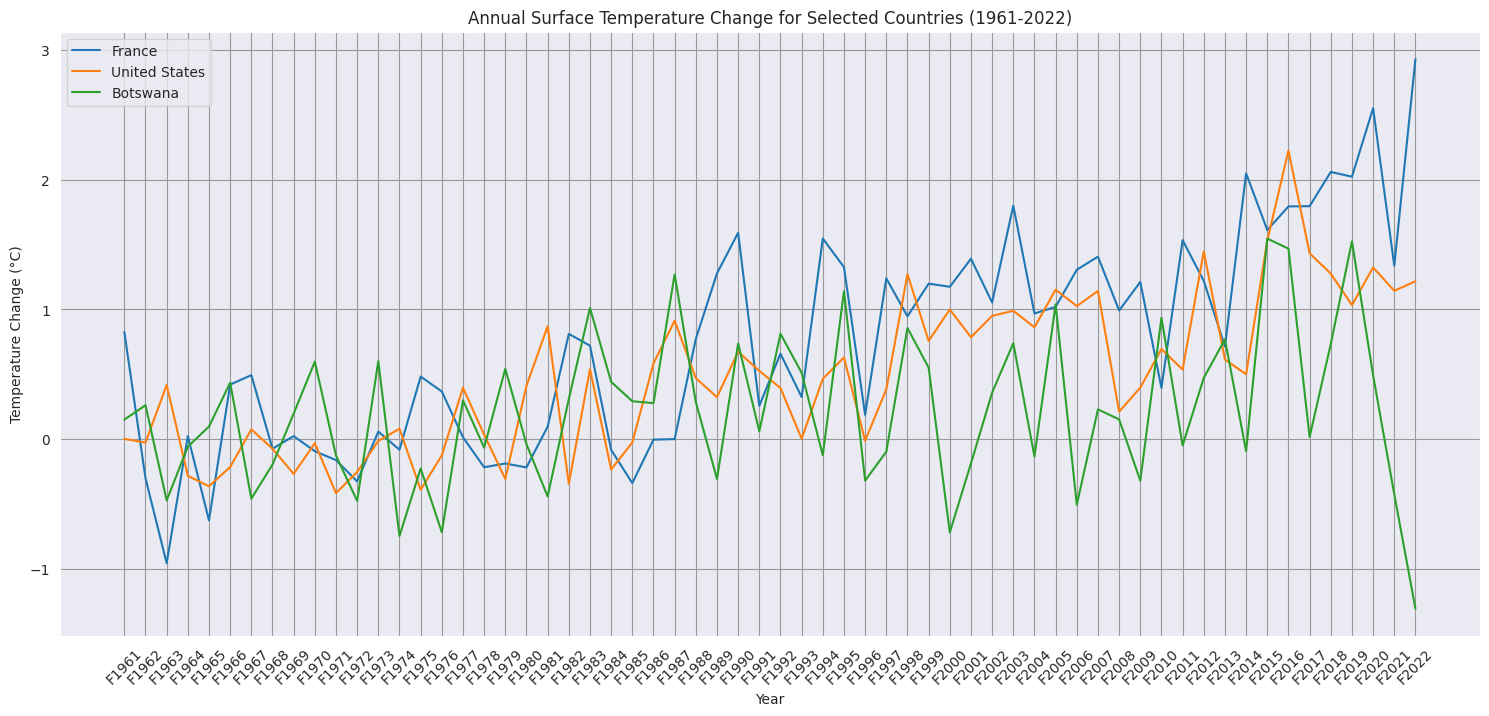

In [ ]:
# Temperature change across time for France, United States, Botswana

# List of selected countries for the  visualization
selected_countries = ["France", "United States", "Botswana"]

# Filter dataset for the selected countries
selected_data = df_FAO[df_FAO["Country"].isin(selected_countries)]

# Plot temperature changes for the selected countries
plt.figure(figsize=(15, 7))

for country in selected_countries:
    country_data = selected_data[selected_data["Country"] == country].iloc[0][temp_columns]
    plt.plot(country_data.index, country_data.values, label=country)

plt.title('Annual Surface Temperature Change for Selected Countries (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## 2.3 The Our World in Data CO2 and Greenhouse Gas Emissions dataset

In [ ]:
# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID.head()

country  year iso_code  population  gdp  ...  \
0  Afghanistan  1850      AFG   3752993.0  NaN  ...   
1  Afghanistan  1851      AFG   3767956.0  NaN  ...   
2  Afghanistan  1852      AFG   3783940.0  NaN  ...   
3  Afghanistan  1853      AFG   3800954.0  NaN  ...   
4  Afghanistan  1854      AFG   3818038.0  NaN  ...   

   temperature_change_from_n2o  total_ghg  total_ghg_excluding_lucf  \
0                          NaN        NaN                       NaN   
1                          0.0        NaN                       NaN   
2                          0.0        NaN                       NaN   
3                          0.0        NaN                       NaN   
4                          0.0        NaN                       NaN   

   trade_co2  trade_co2_share  
0        NaN              NaN  
1        NaN              NaN  
2        NaN              NaN  
3        NaN              NaN  
4        NaN              NaN  

[5 rows x 79 columns]

In [ ]:
df_OWID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             29010 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [ ]:
df_OWID.describe()

year    population           gdp    cement_co2  \
count  50598.000000  4.000800e+04  1.456400e+04  24974.000000   
mean    1925.365173  5.926810e+07  2.677586e+11      8.392491   
std       59.882945  3.222866e+08  2.103151e+12     63.009433   
min     1750.000000  2.100000e+01  4.998000e+07      0.000000   
25%     1882.000000  3.198618e+05  7.516679e+09      0.000000   
50%     1929.000000  2.323117e+06  2.597999e+10      0.010000   
75%     1975.000000  9.802751e+06  1.132942e+11      0.692000   
max     2021.000000  7.909295e+09  1.136302e+14   1672.592000   

       cement_co2_per_capita  ...  temperature_change_from_n2o     total_ghg  \
count           22714.000000  ...                 37620.000000   6149.000000   
mean                0.063958  ...                     0.000497    771.485168   
std                 0.123023  ...                     0.002943   3553.425123   
min                 0.000000  ...                     0.000000   -186.550000   
25%                 0.000000  ...                     0.000000      8.440000   
50%                 0.005000  ...                     0.000000     38.050000   
75%                 0.087000  ...                     0.000000    151.150000   
max                 2.574000  ...                     0.083000  49758.230000   

       total_ghg_excluding_lucf    trade_co2  trade_co2_share  
count               6149.000000  4259.000000      4258.000000  
mean                 748.578502    -7.518768        20.623119  
std                 3488.004825   269.513468        53.596027  
min                    0.010000 -2399.517000       -98.279000  
25%                    7.030000    -3.138000        -6.402750  
50%                   30.600000     1.484000         8.867500  
75%                  131.320000     9.029500        32.949250  
max                48116.559000  2206.337000       607.521000  

[8 rows x 77 columns]

In [ ]:
# MISSING VALUES ANALYSIS

# Create a function that calculates the percentage of missing values in each column of your dataset.

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=True).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


# Use the function created to get a table of missing values for your dataset.
# pd.set_option('display.max_rows', None)

print(missing_values_table(df_OWID))


Your selected dataframe has 79 columns.
There are 77 columns that have missing values.
                                      Missing Values  % of Total Values
iso_code                                        8456               16.7
share_of_temperature_change_from_ghg            8874               17.5
temperature_change_from_ghg                     8874               17.5
temperature_change_from_co2                     8874               17.5
population                                     10590               20.9
...                                              ...                ...
other_industry_co2                             48212               95.3
share_global_other_co2                         48212               95.3
other_co2_per_capita                           48212               95.3
cumulative_other_co2                           48212               95.3
share_global_cumulative_other_co2              48212               95.3

[77 rows x 2 columns]


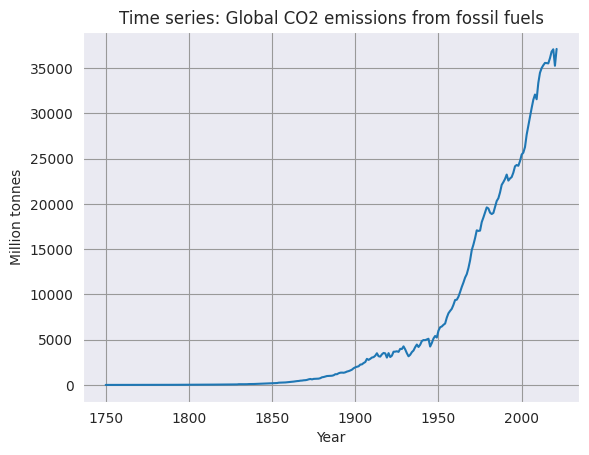

In [ ]:
# GLOBAL CO2 EMISSIONS

# Extracting World data from the data set
df_OWID_world = df_OWID[df_OWID.country == 'World']

# Plot relationship
plt.plot(df_OWID_world['year'], df_OWID_world['co2'])
plt.title('Time series: Global CO2 emissions from fossil fuels')
plt.ylabel('Million tonnes');
plt.xlabel('Year')
plt.show()

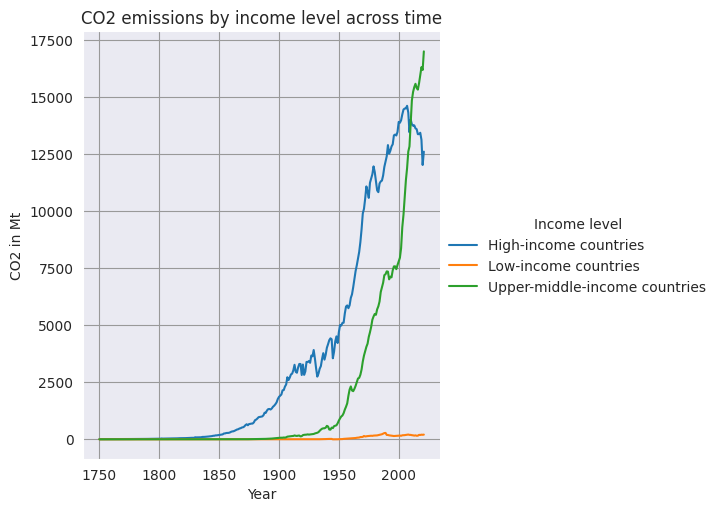

In [ ]:
# CO2 EMISSIONS BY INCOME LEVEL

# Extract income-level data
Values_to_extract =  ['High-income countries', 'Low-income countries', 'Upper-middle-income countries']
df_income = df_OWID[df_OWID['country'].isin(Values_to_extract)]
df_income = df_income.rename(columns = {'country': 'Income level'})

# Plot co2 by income level across time
sns.relplot(x= 'year', y = 'co2', hue = 'Income level', kind = 'line', data = df_income)
plt.title('CO2 emissions by income level across time')
plt.ylabel('CO2 in Mt')
plt.xlabel('Year');


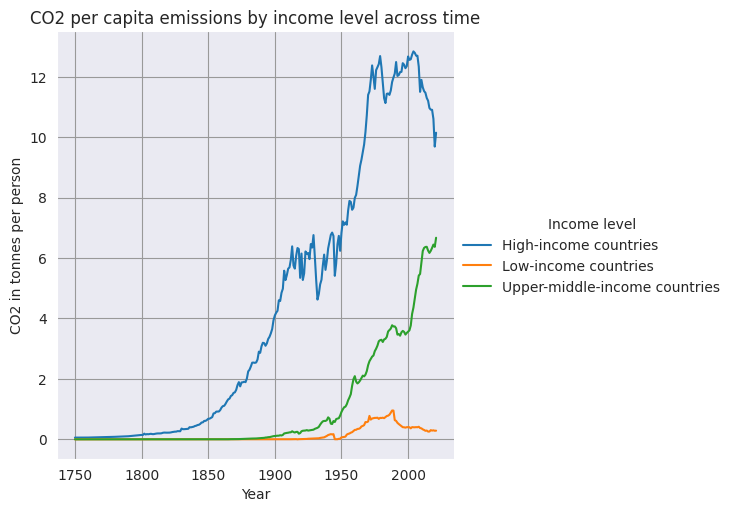

In [ ]:
# CO2 per capita emissions by income level across time

sns.relplot(x= 'year', y = 'co2_per_capita', hue = 'Income level', kind = 'line', data = df_income)

plt.title('CO2 per capita emissions by income level across time')
plt.ylabel('CO2 in tonnes per person')
plt.xlabel('Year');


In [ ]:
# GOBAL CO2 EMISSIONS BY EMISSION SOURCE

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

# Create an interactive figure
source = ColumnDataSource(df_OWID_world)

# Specify a figure
q = figure(width = 1200,
           height = 800,
           y_axis_label = 'Million tonnes',
           title = 'Global CO2 Emissions in time across countries by emission source')

# Create a mapping for colors and legends
mapping = {'land_use_change_co2': ('land use change', 'blue'),
           'cement_co2': ('cement', 'red'),
           'coal_co2': ('coal', '#8e8c7f'),
           'gas_co2': ('gas', 'green'),
           'flaring_co2': ('flaring', '#647f5f'),
           'oil_co2': ('oil', '#e0e000'),
           'other_industry_co2': ('other industries', '#ff00a0')}

# Loop over the mapping to create line, tooltip and hover tool for each column
for col, (label, color) in mapping.items():
    r = q.line(x='year', y=col, legend_label=label, color=color, source=source)
    tooltips = [('Year', '@year'), (label, f'@{col}')]
    h = HoverTool(renderers=[r], tooltips=tooltips)
    q.add_tools(h)

# Set the legend location
q.legend.location = "top_left"

show(q)

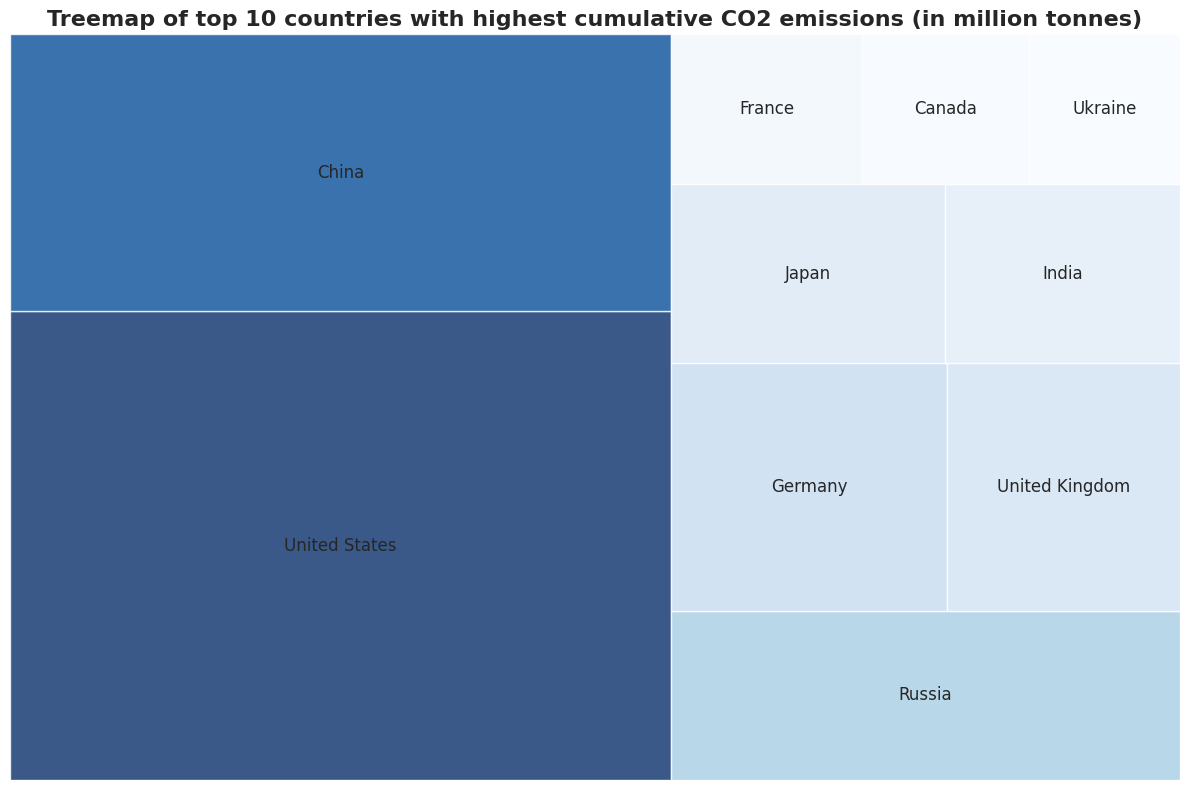

In [ ]:
# TREEMAP OF 10 COUNTRIES WITH THE HIGHES CUMULATIVE CO2 EMISSIONS

# Remove non-country rows
Values_to_remove =  ['Africa', 'Africa (GCP)','Asia', 'Asia (GCP)','Asia (excl. China and India)','Central America (GCP)',
                     'Europe', 'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)','High-income countries','International transport',
                     'Low-income countries', 'OECD (GCP)','Oceania', 'Oceania (GCP)','Panama Canal Zone (GCP)', 'South America', 'South America (GCP)',
                     'Upper-middle-income countries', 'Kuwaiti Oil Fires (GCP)', 'North America (excl. USA)', 'European Union (28)', 'North America', 'Lower-middle-income countries',
                     'European Union (27)', 'Middle East (GCP)', 'Non-OECD (GCP)', 'North America (GCP)', 'European Union (27) (GCP)', 'World']

df_countries = df_OWID[~df_OWID['country'].isin(Values_to_remove)]

# keep the most recent
df_countries_latest = df_countries[df_countries.year == 2021]

# Sort for largest values
df_countries_latest = df_countries_latest.sort_values(by = 'cumulative_co2', ascending = False)

# keep the 10 countries with the highest values
df_countries_latest_high = df_countries_latest.head(10)


# Calculate the treemap sizes
sizes = df_countries_latest_high['cumulative_co2']
norm = plt.Normalize(vmin=min(sizes), vmax=max(sizes)*0.66)
colors = plt.cm.Blues(norm(sizes))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sizes,
    label=df_countries_latest_high['country'],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 12}
)
plt.axis('off')
plt.title('Treemap of top 10 countries with highest cumulative CO2 emissions (in million tonnes)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

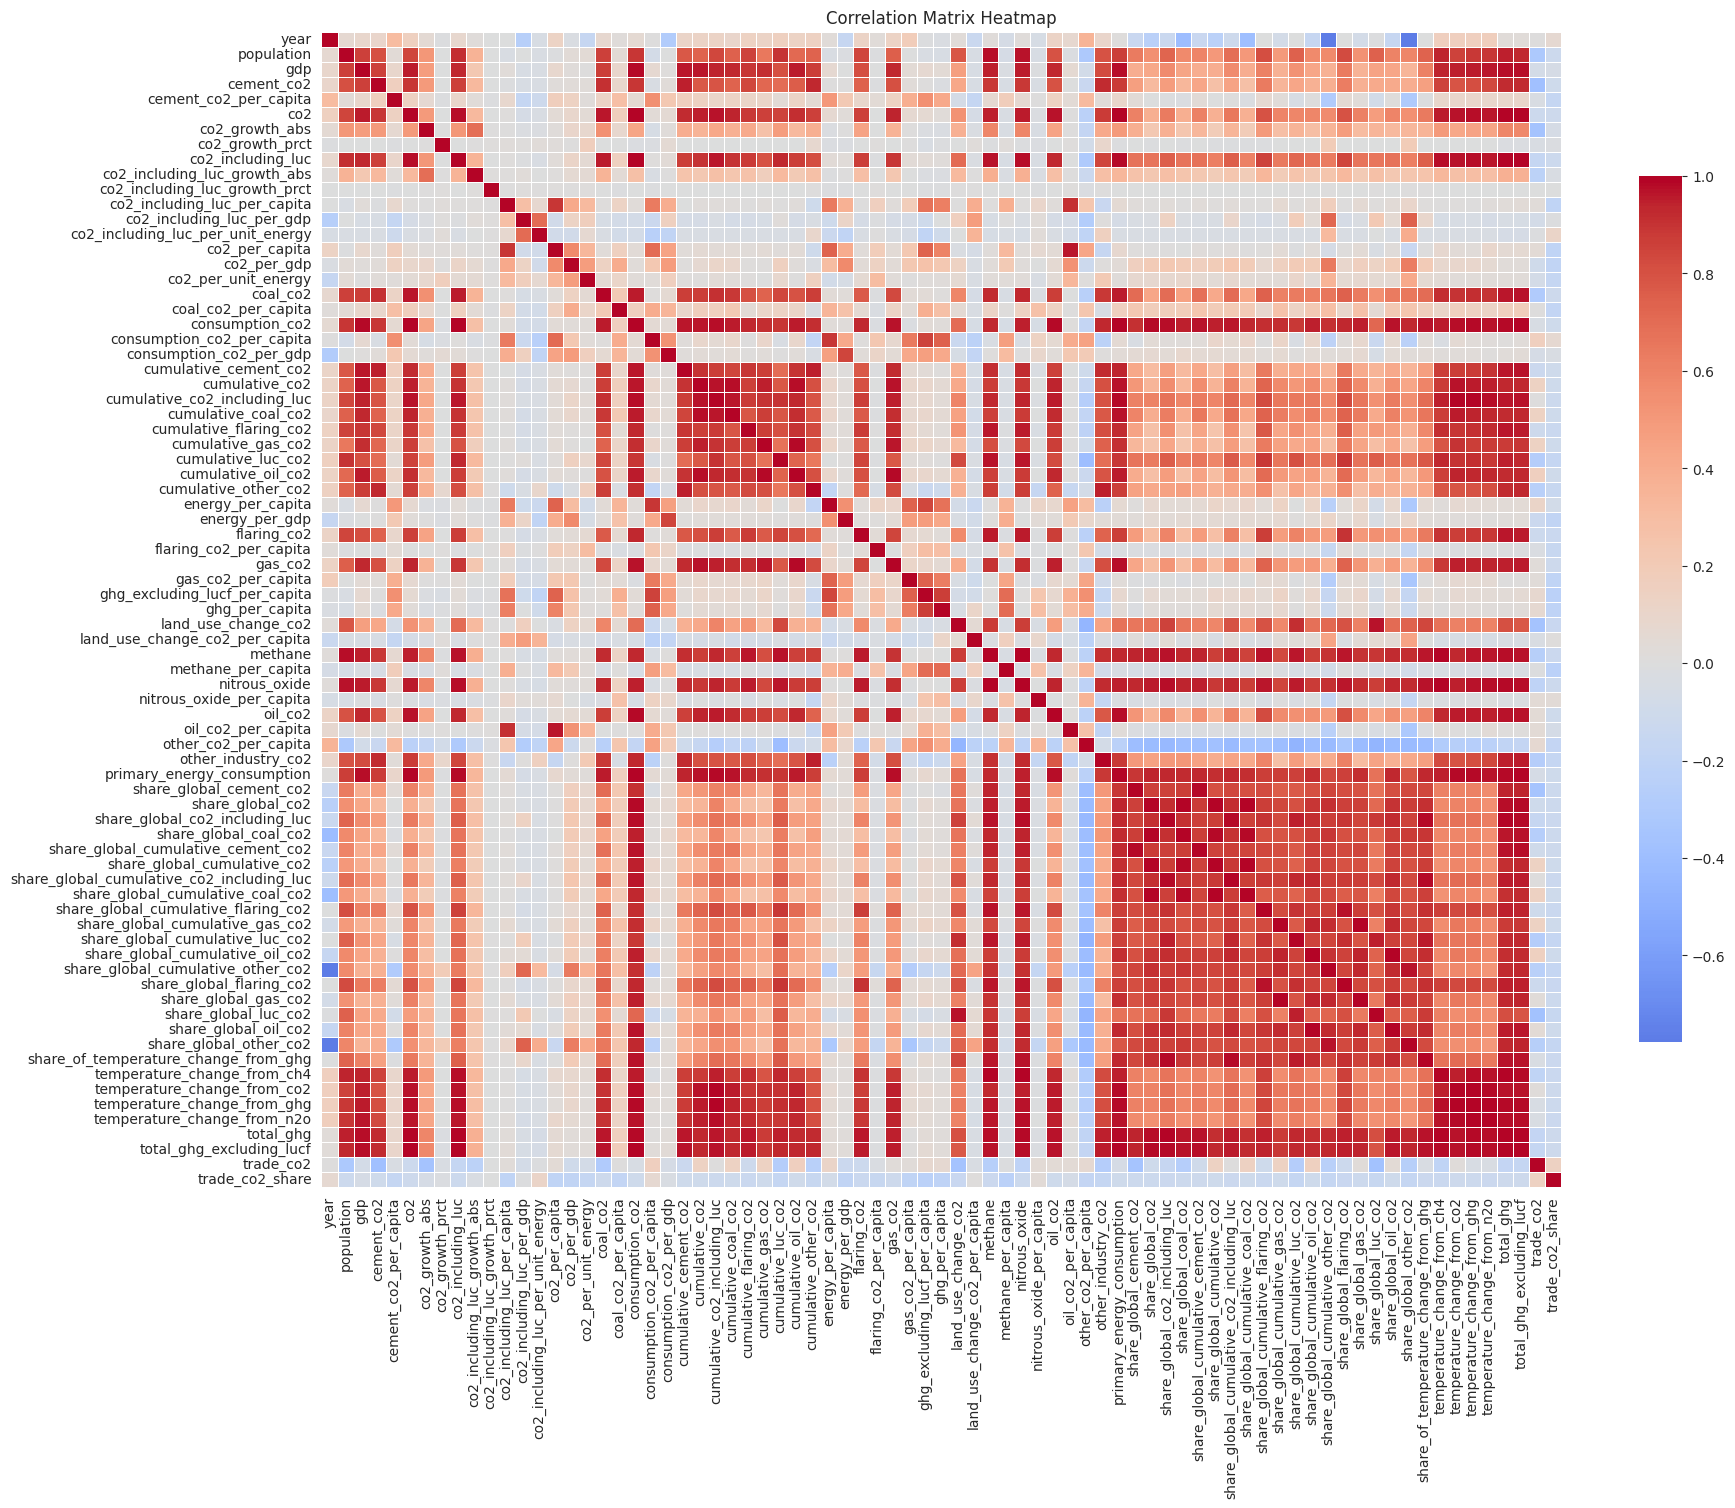

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_OWID.corr(numeric_only = True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, linewidths=.5, cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix Heatmap")
plt.show()


## 2.4 Exploring the relationship between temperature change and CO2 emissions

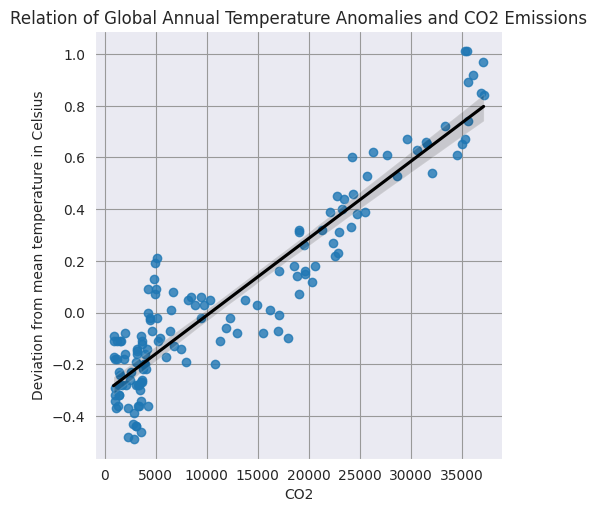

In [ ]:
# PLOTTING GLOBAL TEMPERATURE CHANGE AND CO2 EMISSIONS

# merge NASA temp change data with OWID CO2 data
df_OWID_NASA_merged = df_OWID_world.merge(df_NASA[['Year', 'Glob']], how='left', left_on='year', right_on='Year')

# rename temp change colum
df_OWID_NASA_merged = df_OWID_NASA_merged.rename(columns = {'Glob': 'temp_change'})

# Plot data and regression model fits across a FacetGrid.
sns.lmplot(x = 'co2', y = 'temp_change', line_kws = {'color': 'black'}, data = df_OWID_NASA_merged)

# Add chart title
plt.title('Relation of Global Annual Temperature Anomalies and CO2 Emissions')

# Adjust labels
plt.ylabel('Deviation from mean temperature in Celsius')
plt.xlabel('CO2')

plt.show()

In [ ]:
# CALCULATE PEARSON CORRELATION

# Drop NA
df_OWID_NASA_merged_nonan = df_OWID_NASA_merged.dropna(subset = ['temp_change', 'co2'])

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_OWID_NASA_merged_nonan['temp_change'], df_OWID_NASA_merged_nonan['co2'])

# Print the results
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9289109122092312
p-value: 2.8687952885396166e-62


# II Predictive modeling

## 2.1 Modeling preparation

In [ ]:
# FEATURE SELECTION

# Load the original OWID dataset
original_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')
print(original_data.shape)
# Extract 'World' data
world_data_original = original_data[original_data['country'] == 'World']

# Drop columns with more than 50% missing values
def drop_columns_high_missing(data, threshold=0.5):
    """
    Drop columns from the DataFrame that have a missing value percentage greater than the threshold.

    Parameters:
    - data: DataFrame to process.
    - threshold: Missing value percentage threshold.

    Returns:
    - Processed DataFrame with columns dropped.
    """
    # Calculate the missing value percentage for each column
    missing_percentage = data.isnull().sum() / len(data)

    # Identify columns that exceed the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

    # Drop identified columns
    data_cleaned = data.drop(columns=columns_to_drop)

    return data_cleaned

world_data_cleaned = drop_columns_high_missing(world_data_original)

print('Remaining number of columns:', len(world_data_cleaned.columns))

# remove share var
share_columns = [col for col in world_data_cleaned.columns if "share" not in col]
world_data_cleaned = world_data_cleaned[share_columns]
print('Remaining number of columns:', len(world_data_cleaned.columns))

# remove gowth var
growth_columns = [col for col in world_data_cleaned.columns if "growth" not in col]
world_data_cleaned = world_data_cleaned[growth_columns]
print('Remaining number of columns:', len(world_data_cleaned.columns))


# remove per capita var
capita_columns = [col for col in world_data_cleaned.columns if "capita" not in col]
world_data_cleaned = world_data_cleaned[capita_columns]
print('Remaining number of columns:', len(world_data_cleaned.columns))


# final columns

columns = ['country', 'year', 'population',
        'cumulative_cement_co2',
       'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2',
       ]

world_data_cleaned = world_data_cleaned[columns]
print('Remaining number of columns:', len(world_data_cleaned.columns))
print(world_data_cleaned.columns)

(46523, 74)
Remaining number of columns: 42
Remaining number of columns: 28
Remaining number of columns: 24
Remaining number of columns: 17
Remaining number of columns: 10
Index(['country', 'year', 'population', 'cumulative_cement_co2',
       'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2'],
      dtype='object')


## 2.2 Ordinary Least Squares Regression

<ipython-input-13-340f0b684a6c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)


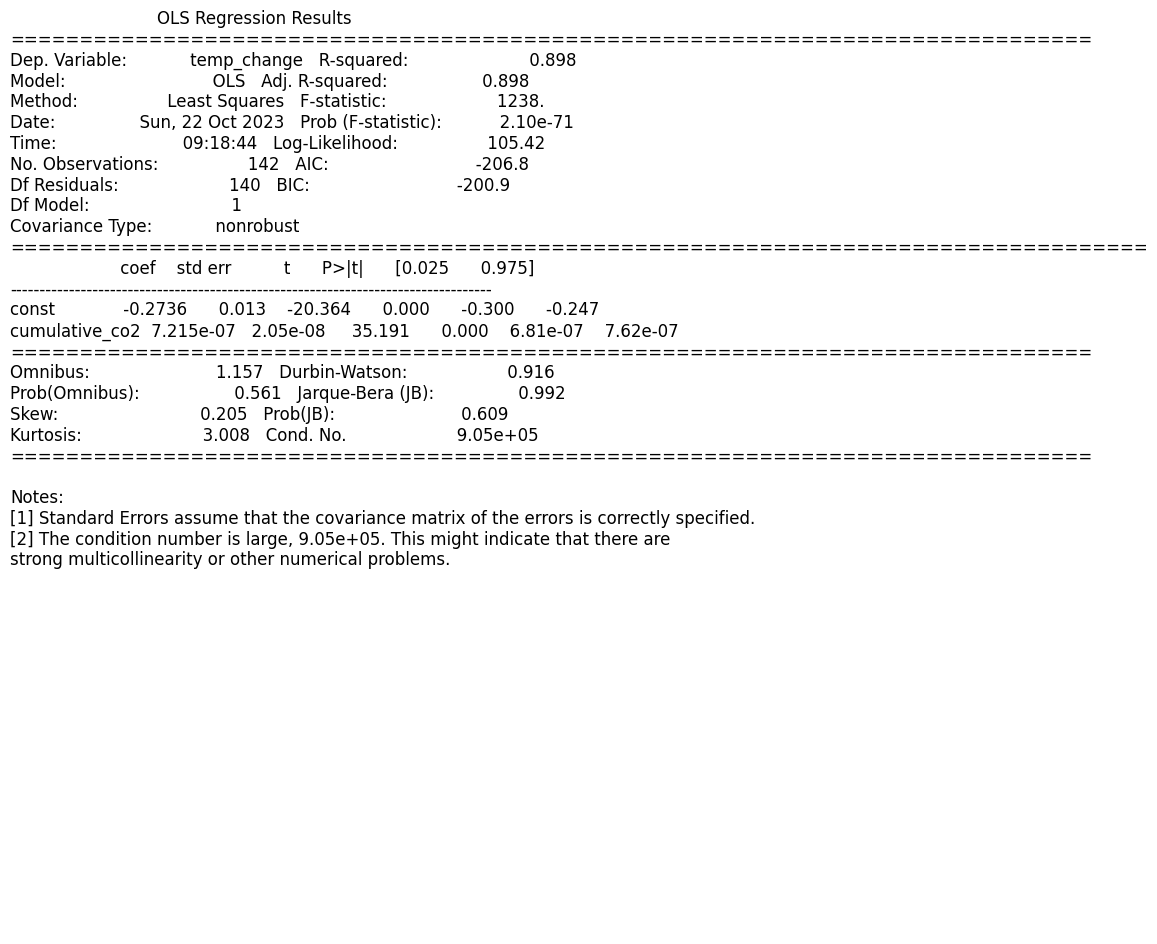

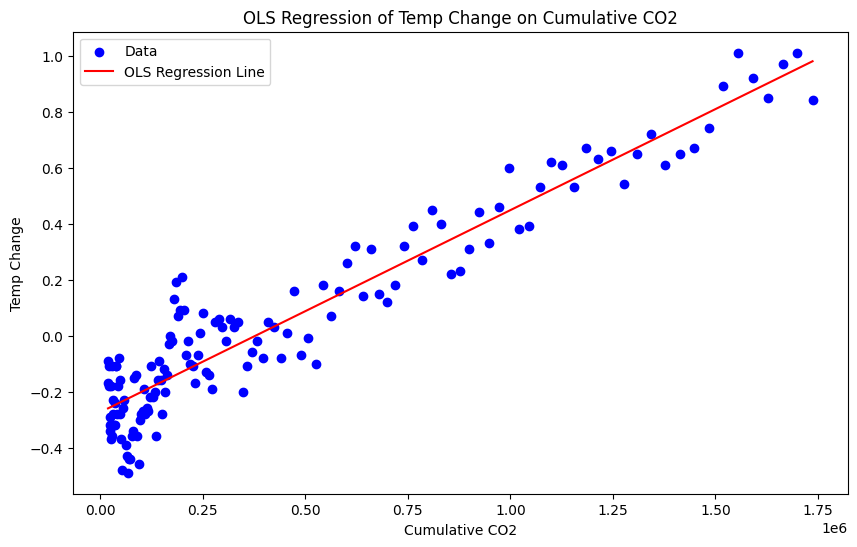

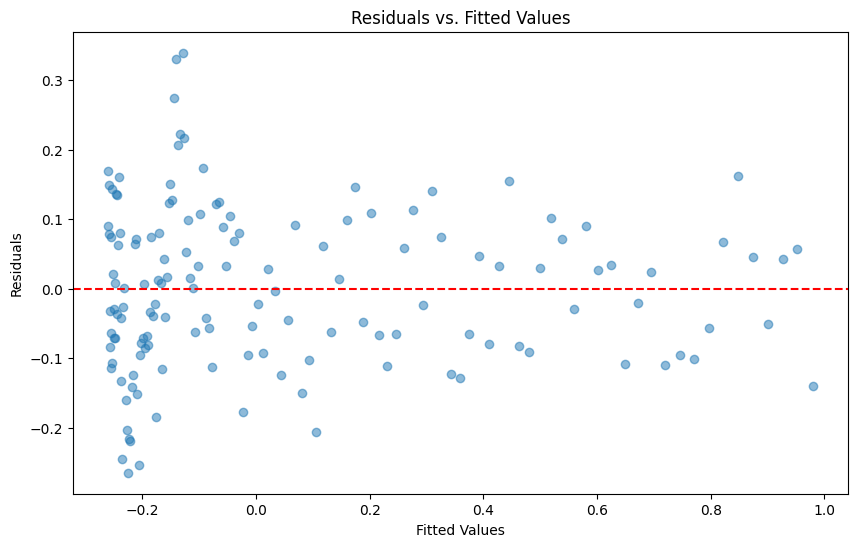

<Figure size 1000x600 with 0 Axes>

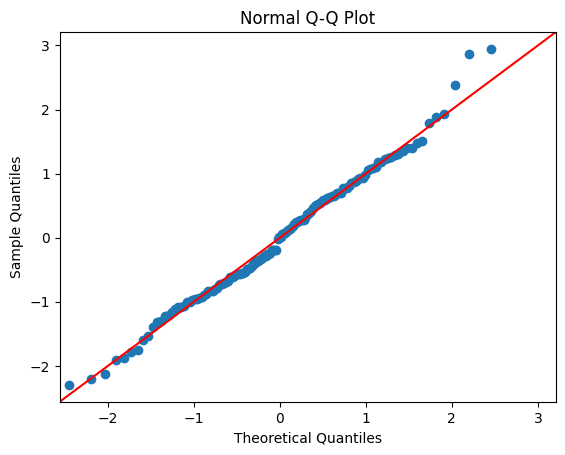

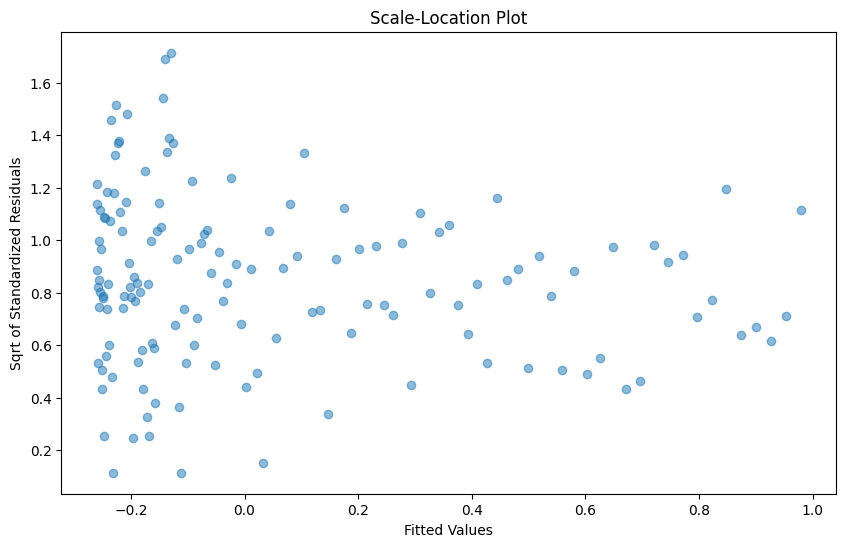

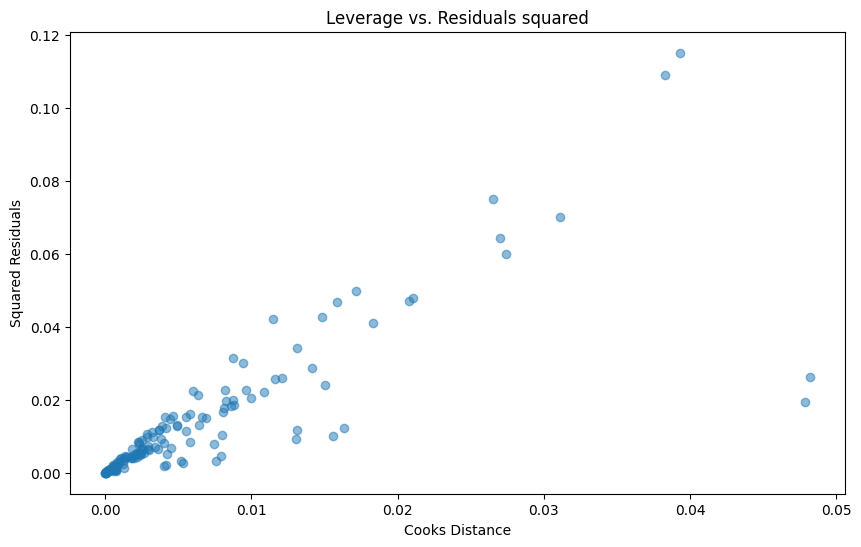

In [ ]:
# CO2 only

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
           'cumulative_co2',
           'temp_change',
           ]
# Extract the time and CO2 level columns from the dataset
cumulative_co2 = df_merged['cumulative_co2']
temp_change = df_merged['temp_change']

# Add a constant term to the independent variable (cumulative_co2)
cumulative_co2_const = sm.add_constant(cumulative_co2)

# Perform linear regression with cumulative_co2 as the independent variable
model = sm.OLS(temp_change, cumulative_co2_const)
results = model.fit()

# # Extract regression coefficients and other statistics
# coefficients = results.params
# pvalues = results.pvalues
# tvalues = results.tvalues
# conf_int = results.conf_int()

# # Create a DataFrame to store the results
# results_df = pd.DataFrame({
#     'Coefficient': coefficients,
#     'P-Value': pvalues,
#     'T-Value': tvalues,
#     'Conf Int Low': conf_int[0],
#     'Conf Int High': conf_int[1]
# })

# # Save the results DataFrame to a CSV file
# results_df.to_csv('OLS_CO2_regression_results.csv')

# Create a new figure with enough space
fig, ax = plt.subplots(figsize=(10, 12))

# Disable axis
ax.axis('off')

# Place the summary inside the figure
ax.text(0, 1, str(results.summary()), fontsize=12, va='top')

# Save the figure as an image
plt.savefig('OLS_Glob_CO2_regression_summary.png', bbox_inches='tight', pad_inches=0.5)

# Plotting regreesion line
plt.figure(figsize=(10,6))

# Plot the actual data points
plt.scatter(cumulative_co2, temp_change, label='Data', color='blue')

# Plot the regression line
plt.plot(cumulative_co2, results.predict(cumulative_co2_const), color='red', label='OLS Regression Line')

plt.title('OLS Regression of Temp Change on Cumulative CO2')
plt.xlabel('Cumulative CO2')
plt.ylabel('Temp Change')
plt.legend()

# Save the plot as an image
plt.savefig('OLS_CO2_regression_plot.png', format='png')

# Optional: display the plot
plt.show()


# Extract residuals and fitted values
residuals = results.resid
fitted = results.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='red', linestyle='--')
plt.savefig('OLS_CO2_residuals_vs_fitted_plot.png', format='png')
plt.show()



# Plot Normal Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, fit=True, line="45")
plt.title("Normal Q-Q Plot")
plt.savefig('OLS_CO2_normal_q-q_plot.png', format='png')
plt.show()


# Plot Scale-Location (Residuals vs. Square Root of Standardized Residuals)
plt.figure(figsize=(10, 6))
standardized_residuals = results.get_influence().resid_studentized_internal
sqrt_std_residuals = np.sqrt(np.abs(standardized_residuals))
plt.scatter(fitted, sqrt_std_residuals, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt of Standardized Residuals")
plt.title("Scale-Location Plot")
plt.savefig('OLS_CO2_scale_location_plot.png', format='png')
plt.show()

# Plot Leverage vs. Residuals squared
plt.figure(figsize=(10, 6))
influence = results.get_influence()
cooks_d = influence.cooks_distance[0]
plt.scatter(cooks_d, residuals**2, alpha=0.5)
plt.xlabel("Cooks Distance")
plt.ylabel("Squared Residuals")
plt.title("Leverage vs. Residuals squared")
plt.savefig('OLS_CO2_leverage_vs_residuals_squared_plot.png', format='png')
plt.show()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temp_change   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1238.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           2.10e-71
Time:                        09:18:56   Log-Likelihood:                 105.42
No. Observations:                 142   AIC:                            -206.8
Df Residuals:                     140   BIC:                            -200.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2736      0.013    -20.364      0.000      -0.300      -0.247
cumulative_co2  7.215e-07   2.05e-08     35.191      0.000    6.81e-07    7.62e-07
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.992
Skew:                           0.205   Prob(JB):                        0.609
Kurtosis:                       3.008   Cond. No.                     9.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

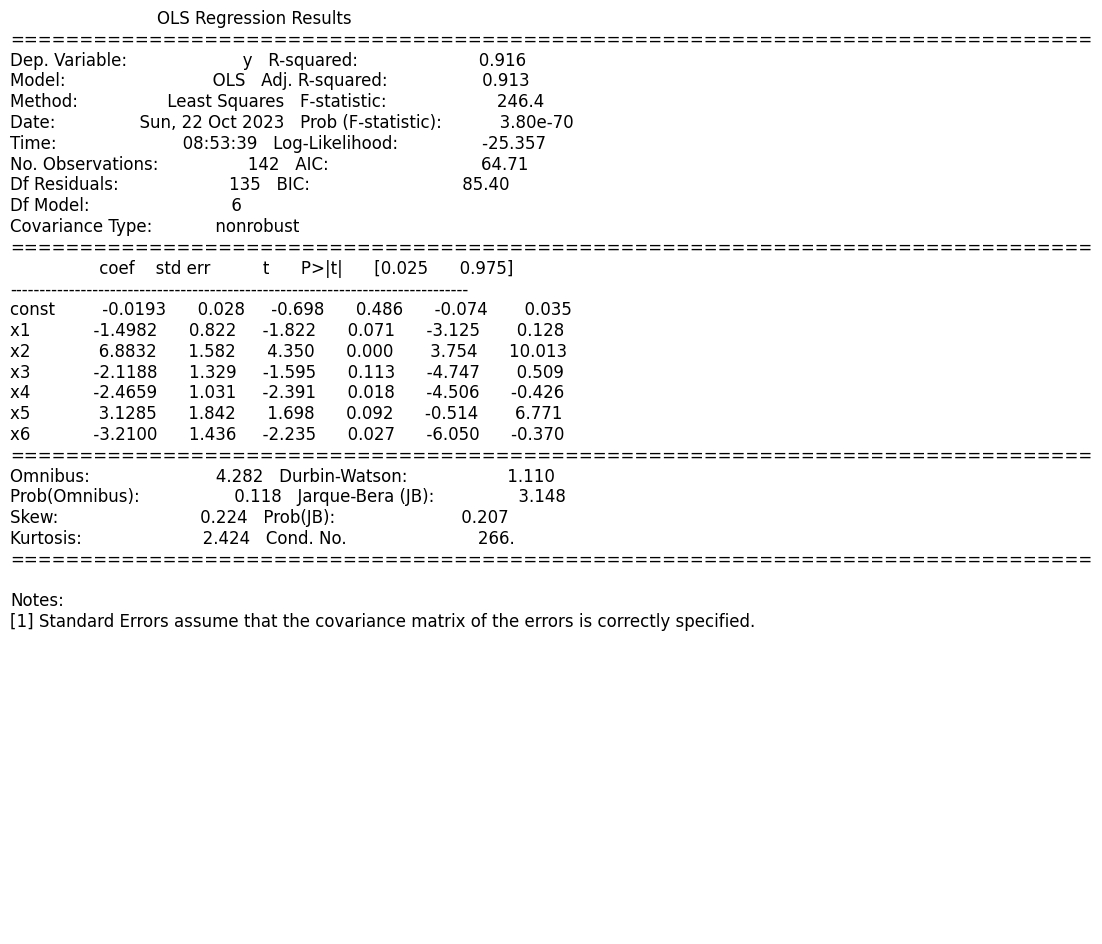

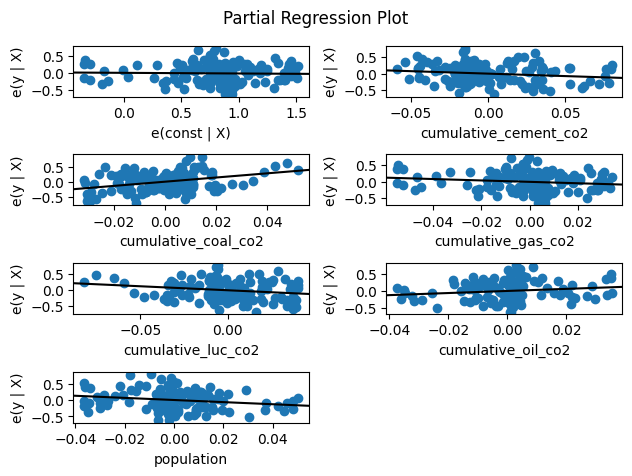

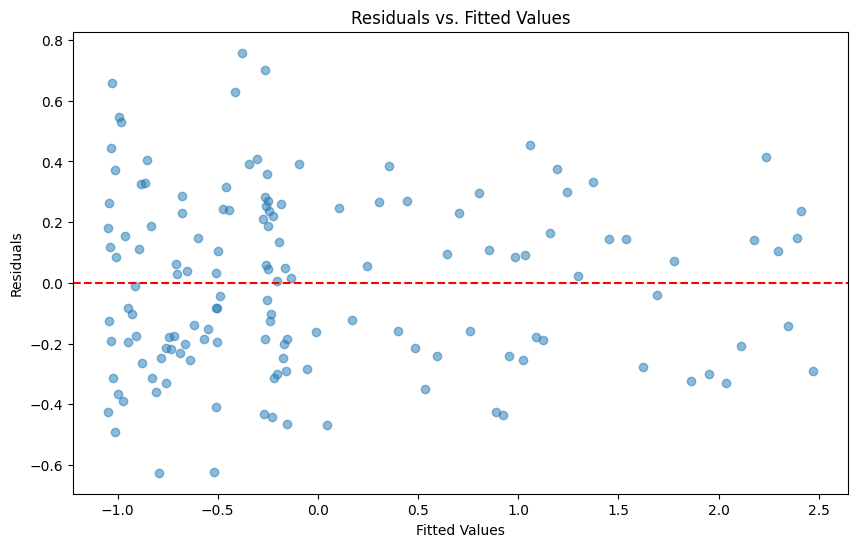

<Figure size 1000x600 with 0 Axes>

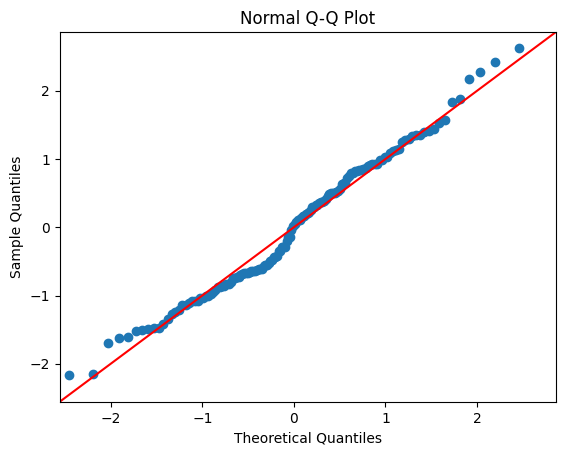

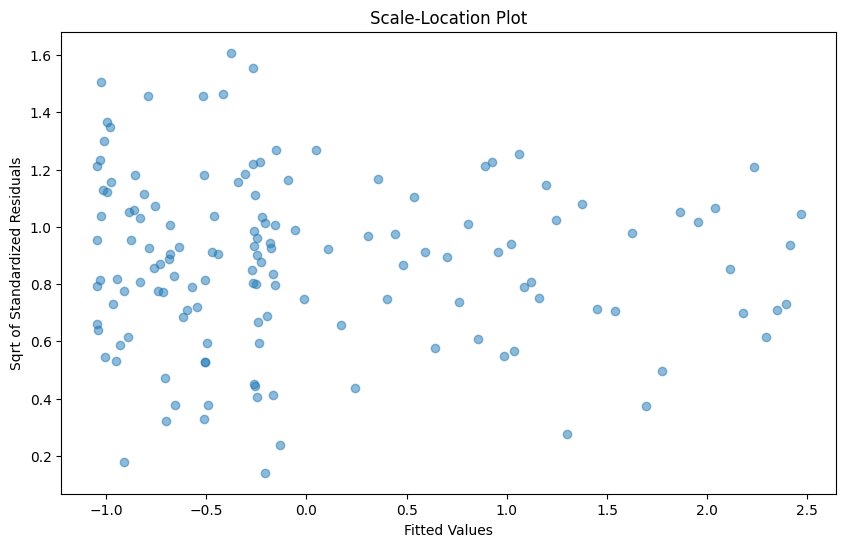

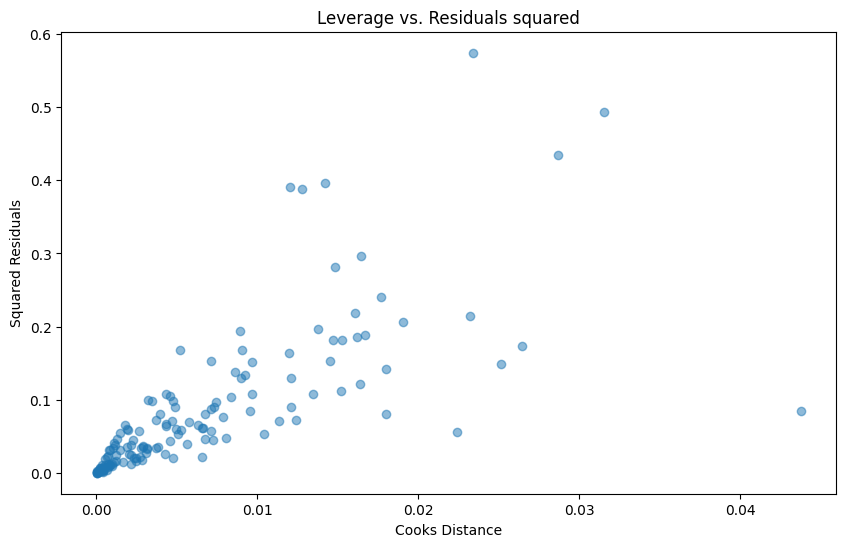

In [ ]:
# OLS ALL FEATURES


import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg


# Extract the dependent variable and predictors
temp_change = df_merged['temp_change']
features = ['cumulative_cement_co2', 'cumulative_coal_co2',
            'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2',
            'population']
X = df_merged[features]

# Scale both the dependent variable and predictors
scaler = StandardScaler()
temp_change_scaled = scaler.fit_transform(temp_change.values.reshape(-1, 1))
X_scaled = scaler.fit_transform(X)

# Imputet
imputer = IterativeImputer(random_state = 42)
X_imputed = imputer.fit_transform(X_scaled)

# Add a constant term to the scaled predictors
X_const = sm.add_constant(X_imputed)

# Perform linear regression
model = sm.OLS(temp_change_scaled, X_const)
results = model.fit()

# Print the summary of the regression results
results.summary()

# Create a new figure with enough space
fig, ax = plt.subplots(figsize=(10, 12))

# Disable axis
ax.axis('off')

# Place the summary inside the figure
ax.text(0, 1, str(results.summary()), fontsize=12, va='top')

# Save the figure as an image
plt.savefig('OLS_all_regression_summary.png', bbox_inches='tight', pad_inches=0.5)

# Plot the partial regression plots
fig = smg.plot_partregress_grid(results)

# Adjust the x-axis labels for each subplot
for i, ax in enumerate(fig.axes):
    if i == 0:  # Skip the dependent variable plot
        continue
    ax.set_xlabel(features[i-1])  # Set x-axis label to corresponding feature name

fig.tight_layout(pad=1.0)
fig.show()
fig.savefig("OLS_all_partial_regression_plots.png")

# Extract residuals and fitted values
residuals = results.resid
fitted = results.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='red', linestyle='--')
plt.savefig('OLS_all_residuals_vs_fitted_plot.png', format='png')
plt.show()



# Plot Normal Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, fit=True, line="45")
plt.title("Normal Q-Q Plot")
plt.savefig('OLS_all_normal_q-q_plot.png', format='png')
plt.show()


# Plot Scale-Location (Residuals vs. Square Root of Standardized Residuals)
plt.figure(figsize=(10, 6))
standardized_residuals = results.get_influence().resid_studentized_internal
sqrt_std_residuals = np.sqrt(np.abs(standardized_residuals))
plt.scatter(fitted, sqrt_std_residuals, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt of Standardized Residuals")
plt.title("Scale-Location Plot")
plt.savefig('OLS_all_scale_location_plot.png', format='png')
plt.show()

# Plot Leverage vs. Residuals squared
plt.figure(figsize=(10, 6))
influence = results.get_influence()
cooks_d = influence.cooks_distance[0]
plt.scatter(cooks_d, residuals**2, alpha=0.5)
plt.xlabel("Cooks Distance")
plt.ylabel("Squared Residuals")
plt.title("Leverage vs. Residuals squared")
plt.savefig('OLS_all_leverage_vs_residuals_squared_plot.png', format='png')
plt.show()


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     246.4
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           3.80e-70
Time:                        09:18:34   Log-Likelihood:                -25.357
No. Observations:                 142   AIC:                             64.71
Df Residuals:                     135   BIC:                             85.40
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0193      0.028     -0.698      0.486      -0.074       0.035
x1            -1.4982      0.822     -1.822      0.071      -3.125       0.128
x2             6.8832      1.582      4.350      0.000       3.754      10.013
x3            -2.1188      1.329     -1.595      0.113      -4.747       0.509
x4            -2.4659      1.031     -2.391      0.018      -4.506      -0.426
x5             3.1285      1.842      1.698      0.092      -0.514       6.771
x6            -3.2100      1.436     -2.235      0.027      -6.050      -0.370
==============================================================================
Omnibus:                        4.282   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.148
Skew:                           0.224   Prob(JB):                        0.207
Kurtosis:                       2.424   Cond. No.                         266.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.2 SARIMA

<ipython-input-15-c8cfd8b17cec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)


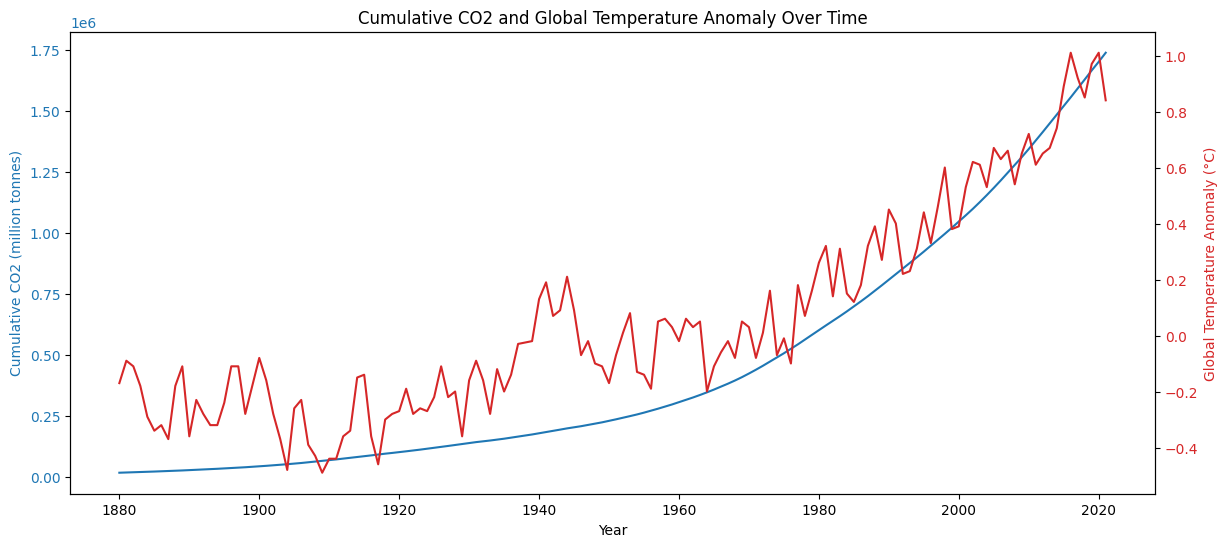

In [ ]:
# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
# df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
           'cumulative_co2',
           'Glob',
           ]

# replace all 0 with missing values
merged_data = df_merged.replace(0, np.nan)

# Select relevant columns
merged_data = merged_data[columns]

# Drop all NaN
merged_data = merged_data.dropna()

merged_data.isna().sum()

# Visualize the data
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot cumulative_co2
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative CO2 (million tonnes)', color=color)
ax1.plot(merged_data['year'], merged_data['cumulative_co2'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Glob variable
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Global Temperature Anomaly (°C)', color=color)
ax2.plot(merged_data['year'], merged_data['Glob'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Cumulative CO2 and Global Temperature Anomaly Over Time')
plt.savefig('SARIMA_CumCo2andTempChange.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


In [ ]:
# Check for stationarity with Augmented Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
adf_result = adfuller(merged_data['Glob'])

# Extract p-value
p_value = adf_result[1]

p_value


0.9876566946251261

In [ ]:
# Apply differencing to the Glob series
merged_data['Glob_diff'] = merged_data['Glob'].diff().dropna()

# Augmented Dickey-Fuller Test on the differenced series
adf_result_diff = adfuller(merged_data['Glob_diff'].dropna())

# Extract p-value for the differenced series
p_value_diff = adf_result_diff[1]

p_value_diff


6.0215071927538045e-18

In [ ]:
# PREPARE MODELING
# Split data based on year
train = merged_data[merged_data['year'] <= 2000]
test = merged_data[merged_data['year'] > 2000]

train.shape, test.shape

((120, 4), (21, 4))

In [ ]:
# PERFORM GRID SEARCH FOR BEST PARAMETERS

import numpy as np
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Reset the index of the training data
train_reset_index = train.reset_index(drop=True)

# Define the p, d, q parameters to take values between 0 and 1 to limit the search space
p = d = q = range(0, 2)

# Generate all different combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, and q with a seasonal order of 12
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_params = None
best_seasonal_params = None

# Grid search for SARIMA parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_reset_index['Glob'],
                          exog=train_reset_index['cumulative_co2'],
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit(disp=False, maxiter=50)  # Limiting the maximum number of iterations with maxiter

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

best_params, best_seasonal_params, best_aic


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

((1, 1, 1), (0, 0, 0, 12), -190.16798290190485)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


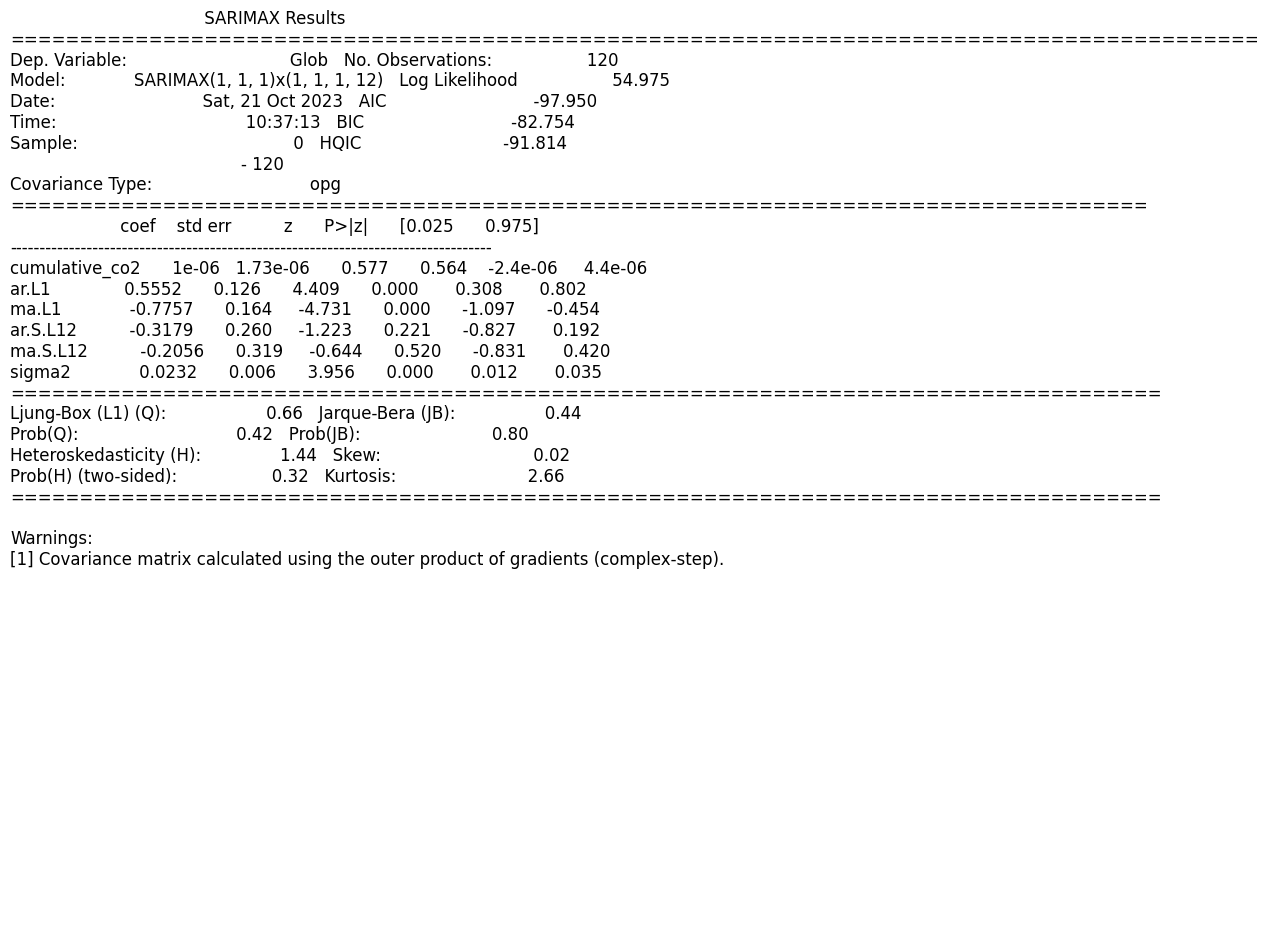

In [ ]:
# Model to entire training set

from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)


# Reset the index of the train set
train_reset = train.reset_index(drop=True)

# Fit a simpler SARIMA model using the best parameters obtained earlier
simple_sarima_model = SARIMAX(train_reset['Glob'],
                              exog=train_reset['cumulative_co2'],
                              order=(1, 1, 1),
                              seasonal_order=(0, 0, 0, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

simple_sarima_results = simple_sarima_model.fit(disp=False)

# Display the model summary
simple_sarima_results.summary()

# Create a new figure with enough space
fig, ax = plt.subplots(figsize=(10, 12))

# Disable axis
ax.axis('off')

# Place the summary inside the figure
ax.text(0, 1, str(results.summary()), fontsize=12, va='top')

# Save the figure as an image
plt.savefig('SARIMA_results_summary.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


In [ ]:
# PERFORMANCE METRICS


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. In-sample predictions for the training data
train_predictions = simple_sarima_results.get_prediction(start=0, end=len(train)-1, dynamic=False, full_results=True)
train_predicted_mean = train_predictions.predicted_mean

# 2. Forecasts for the test set
test_forecast = simple_sarima_results.get_forecast(steps=len(test), exog=test['cumulative_co2'])
test_predicted_mean = test_forecast.predicted_mean

# 3. Compute evaluation metrics
metrics = {
    'Model': 'SARIMA',
    'Scope': 'Global',
    'Features': 'CO2',
    'R2 train': r2_score(train['Glob'], train_predicted_mean),
    'R2 test': r2_score(test['Glob'], test_predicted_mean),

    'MAE train': mean_absolute_error(train['Glob'], train_predicted_mean),
    'MAE test': mean_absolute_error(test['Glob'], test_predicted_mean),

    'MSE train': mean_squared_error(train['Glob'], train_predicted_mean),
    'MSE test': mean_squared_error(test['Glob'], test_predicted_mean),

    'RMSE train': mean_squared_error(train['Glob'], train_predicted_mean, squared=False),
    'RMSE test': mean_squared_error(test['Glob'], test_predicted_mean, squared=False)
}

metrics

results_sarima_glob_cum_co2 = pd.DataFrame(metrics, index = [0])
results_sarima_glob_cum_co2

results_sarima_glob_cum_co2.to_csv('results_sarima_glob_cum_co2.csv')

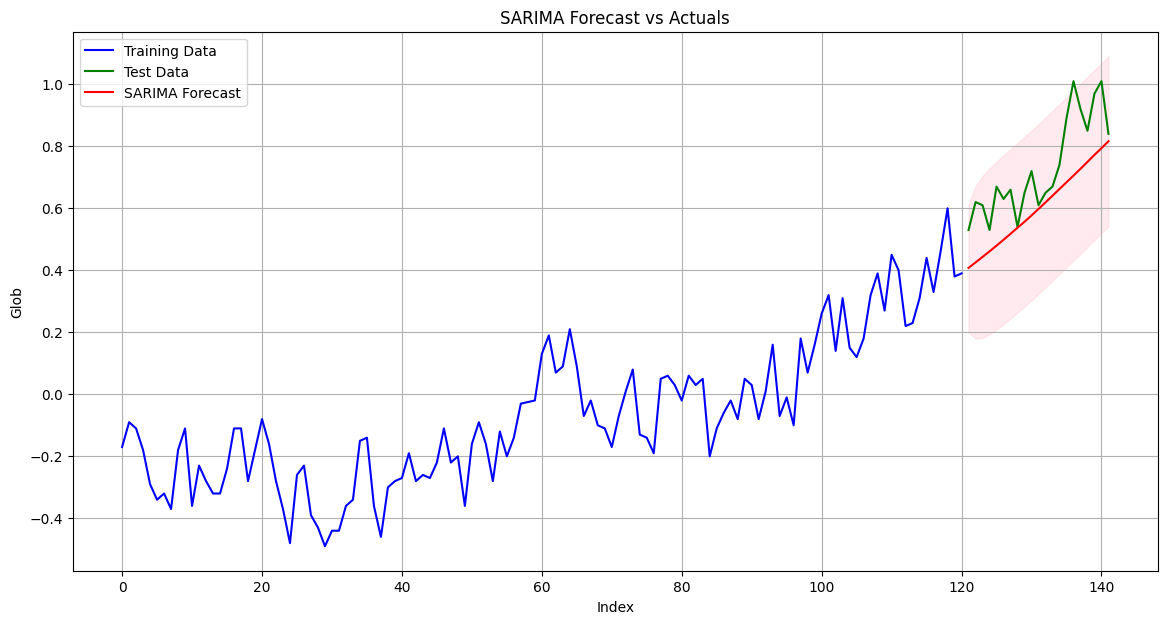

In [ ]:
# COMPUTE FORECAST

# Given the SARIMA(1, 1, 1)x(0, 0, 0, 12) model is already fit,
# we'll use it to forecast the next 21 periods
forecast = simple_sarima_results.get_forecast(steps=21, exog=test['cumulative_co2'])

# Extract the predicted values
predicted_mean = forecast.predicted_mean

# Extract the confidence intervals for the forecasts
conf_int = forecast.conf_int()

predicted_mean, conf_int

# Plot the training data, test data, forecasts, and confidence intervals
plt.figure(figsize=(14, 7))

# Training data
plt.plot(train.index, train['Glob'], label='Training Data', color='blue')

# Test data
plt.plot(test.index, test['Glob'], label='Test Data', color='green')

# Forecasts
plt.plot(test.index, predicted_mean, label='SARIMA Forecast', color='red')

# Confidence intervals
plt.fill_between(test.index,
                 conf_int['lower Glob'],
                 conf_int['upper Glob'],
                 color='pink', alpha=0.3)

plt.title('SARIMA Forecast vs Actuals')
plt.xlabel('Index')
plt.ylabel('Glob')
plt.legend()
plt.grid(True)
plt.savefig('SARIMA_ActualvsForeceast.png', format='png')

plt.show()


## 2.3 Supervised machine learning and ensemble models

### 2.3.1 Global CO2

In [ ]:
# MODELING PIPELINE INCLUDING PREPROCESSING, GRID SEARCH FOR CROSS-VALIDATION AND HYPERPARAMETER OPTIMIZATION AND
# PERFORMANCE METRICS COMPUTATION FOR BEST PERFORMING MODELS

import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from joblib import dump


# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
           'cumulative_co2',
           'temp_change',
           ]

# replace all 0 with missing values
df_filtered = df_merged.replace(0, np.nan)

# Select relevant columns
df_filtered = df_filtered[columns]

# drop all NaN for target
df_filtered = df_filtered.dropna(subset=['temp_change'])

# Split data based on year
train_data = df_filtered[df_filtered['year'] <= 2000]
test_data = df_filtered[df_filtered['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Define random seed
RANDOM_SEED = 42

# Initialize TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=2)

# Define preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', IterativeImputer(random_state=RANDOM_SEED)),
    ('scaler', StandardScaler())
])

# Add Linear Regression to the list of models
models = [
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('svm', SVR()),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression())
]

# Define the parameters for each model for grid search
param_grids = [
    # Parameters for random forest model
    {
        'random_forest__n_estimators': [10, 50, 100],
        'random_forest__max_depth': [None, 5, 10],
        'random_forest__min_samples_split': [2, 5, 10],
        'random_forest__random_state': [42]
    },
    # Parameters for gradient boosting model
    [{
        'gradient_boosting__n_estimators': [100, 200],
        'gradient_boosting__max_depth': [3, 5],
        'gradient_boosting__learning_rate': [0.01, 0.1],
        'gradient_boosting__random_state': [42]
    }],
    # Parameters for SVM model
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.1, 1, 'scale', 'auto'],
        'svm__shrinking': [True, False]
    },
    # Parameters for ElasticNet model
    {
        'elastic_net__alpha': [0.1, 1, 10],
        'elastic_net__l1_ratio': [0.3, 0.5, 0.7],
        'elastic_net__random_state': [42]
    },
    # Parameters for Linear Regression model
    {}
]

# Define a function to evaluate the performance
def evaluate_model(grid_search, name, X_train, y_train, X_test, y_test):
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    return {
        'Model': name,
        'Scope': 'Global',
        'Features': 'CO2',
        'R2 train': r2_score(y_train, y_pred_train),
        'R2 test': r2_score(y_test, y_pred_test),
        'MAE train': mean_absolute_error(y_train, y_pred_train),
        'MAE test': mean_absolute_error(y_test, y_pred_test),
        'MSE train': mean_squared_error(y_train, y_pred_train),
        'MSE test': mean_squared_error(y_test, y_pred_test),
        'RMSE train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Best Parameters': grid_search.best_params_
    }

results_data = []

# Define the base path where models will be saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_CO2/'


# Loop through each model, apply grid search, and evaluate
for (name, model), params in zip(models, param_grids):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])
    grid_search = GridSearchCV(pipeline, params, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    results_data.append(evaluate_model(grid_search, name, X_train, y_train, X_test, y_test))

    # Save the best model using joblib to the specified path
    model_filename = f"{BASE_PATH}CML_Glob_CO2_best_{name}_model.joblib"
    dump(grid_search.best_estimator_, model_filename)

results_cml_nasa_glob_cum_co2 = pd.DataFrame(results_data)
# Save the results dataframe to the specified path
results_filename = f"{BASE_PATH}CML_Glob_CO2_results.csv"
results_cml_nasa_glob_cum_co2.to_csv(results_filename, index=False)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


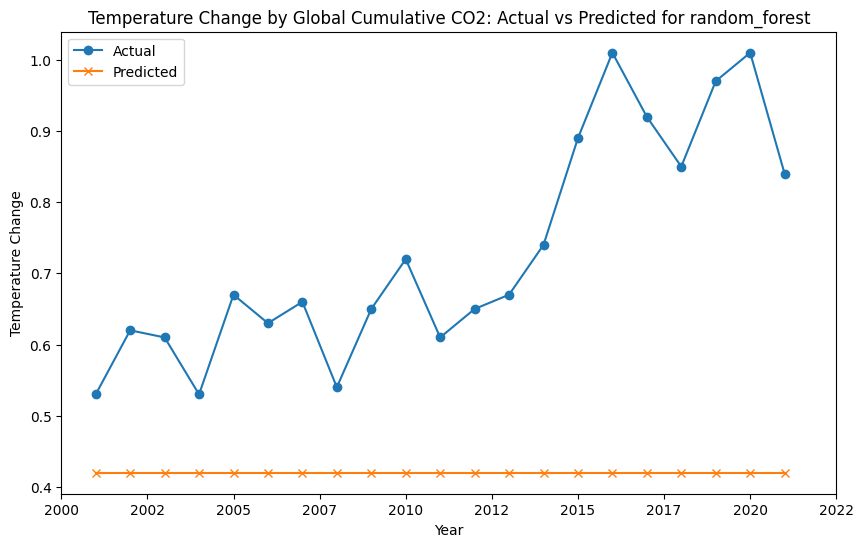

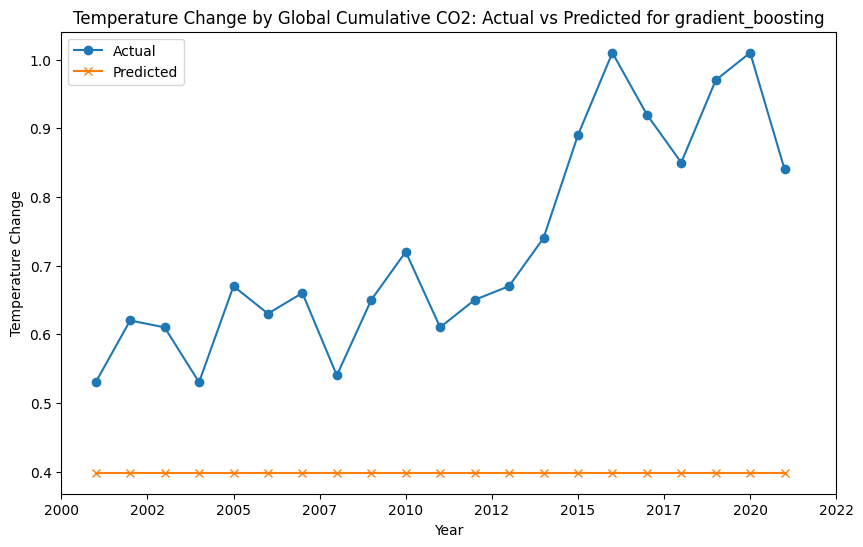

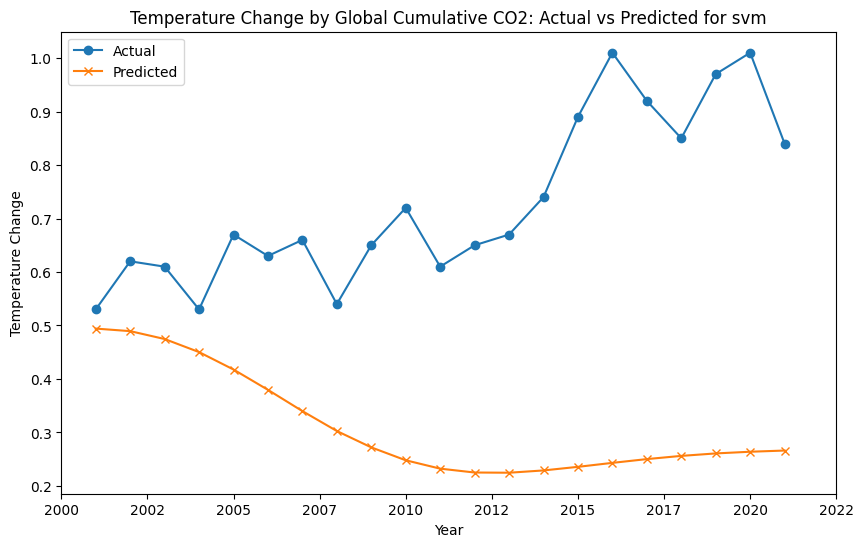

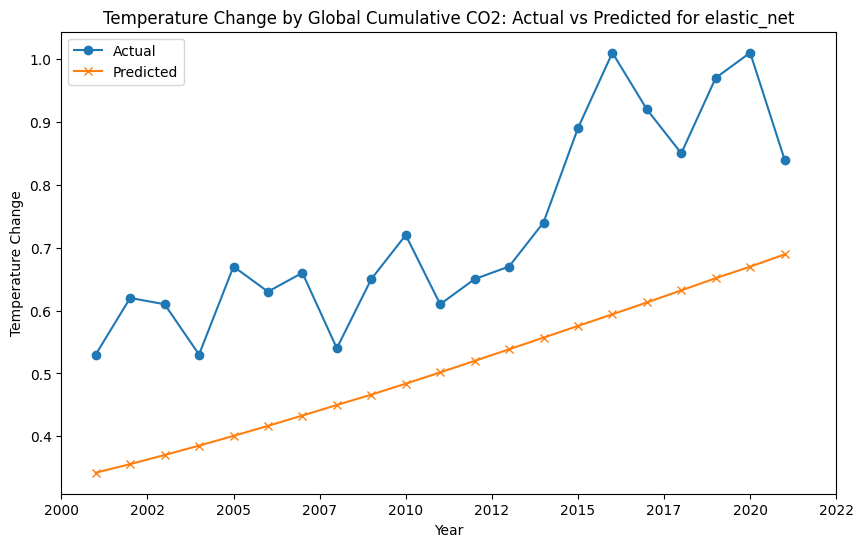

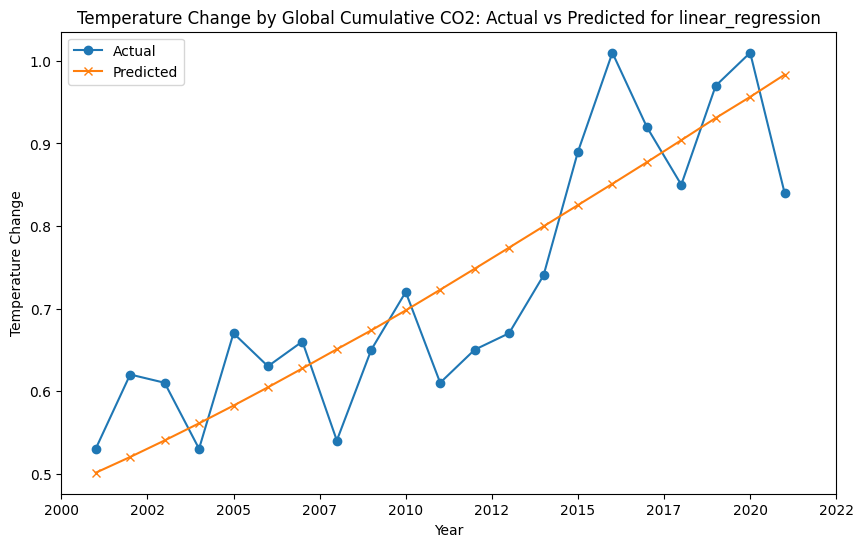

In [ ]:
# PLOT PREDICTIONS

import matplotlib.pyplot as plt
from joblib import load

# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
           'cumulative_co2',
           'temp_change',
           ]

# replace all 0 with missing values
df_filtered = df_merged.replace(0, np.nan)

# Select relevant columns
df_filtered = df_filtered[columns]

# drop all NaN for target
df_filtered = df_filtered.dropna(subset=['temp_change'])

# Split data based on year
train_data = df_filtered[df_filtered['year'] <= 2000]
test_data = df_filtered[df_filtered['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Define the base path where models are saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_CO2/'

model_names = ['random_forest', 'gradient_boosting', 'svm', 'elastic_net', 'linear_regression']

for name in model_names:
    # Load the best model using joblib from the specified path
    model_filename = f"{BASE_PATH}CML_Glob_CO2_best_{name}_model.joblib"
    model = load(model_filename)

    # Make predictions using the loaded model
    y_pred = model.predict(X_test)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['year'], y_test, label="Actual", marker='o')
    plt.plot(test_data['year'], y_pred, label="Predicted", marker='x')
    plt.title(f"Temperature Change by Global Cumulative CO2: Actual vs Predicted for {name}")
    plt.xlabel('Year')
    plt.ylabel('Temperature Change')
    plt.legend()

    # Ensure x-ticks are integers
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels([int(tick) for tick in ax.get_xticks()])

    # Save the plot to the specified directory
    plot_filename = f"{BASE_PATH}CML_Glob_CO2_{name}_plot.png"
    plt.savefig(plot_filename)
    plt.show()


### 2.3.2 Global all features

In [ ]:
# MODELING PIPELINE INCLUDING PREPROCESSING, GRID SEARCH FOR CROSS-VALIDATION AND HYPERPARAMETER OPTIMIZATION AND
# PERFORMANCE METRICS COMPUTATION FOR BEST PERFORMING MODELS

import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from joblib import dump


# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
          'cumulative_cement_co2',
          'cumulative_coal_co2',
          'cumulative_gas_co2',
          'cumulative_luc_co2',
          'cumulative_oil_co2',
            'temp_change',
            'population',
            ]

# replace all 0 with missing values
df_filtered = df_merged.replace(0, np.nan)

# Select relevant columns
df_filtered = df_filtered[columns]

# drop all NaN for target
df_filtered = df_filtered.dropna(subset=['temp_change'])

# Split data based on year
train_data = df_filtered[df_filtered['year'] <= 2000]
test_data = df_filtered[df_filtered['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Define random seed
RANDOM_SEED = 42

# Initialize TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=2)

# Define preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', IterativeImputer(random_state=RANDOM_SEED)),
    ('scaler', StandardScaler())
])

# Add Linear Regression to the list of models
models = [
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('svm', SVR()),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression())
]

# Define the parameters for each model for grid search
param_grids = [
    # Parameters for random forest model
    {
        'random_forest__n_estimators': [10, 50, 100],
        'random_forest__max_depth': [None, 5, 10],
        'random_forest__min_samples_split': [2, 5, 10],
        'random_forest__random_state': [42]
    },
    # Parameters for gradient boosting model
    [{
        'gradient_boosting__n_estimators': [100, 200],
        'gradient_boosting__max_depth': [3, 5],
        'gradient_boosting__learning_rate': [0.01, 0.1],
        'gradient_boosting__random_state': [42]
    }],
    # Parameters for SVM model
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.1, 1, 'scale', 'auto'],
        'svm__shrinking': [True, False]
    },
    # Parameters for ElasticNet model
    {
        'elastic_net__alpha': [0.1, 1, 10],
        'elastic_net__l1_ratio': [0.3, 0.5, 0.7],
        'elastic_net__random_state': [42]
    },
    # Parameters for Linear Regression model
    {}
]

# Define a function to evaluate the performance
def evaluate_model(grid_search, name, X_train, y_train, X_test, y_test):
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    return {
        'Model': name,
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_score(y_train, y_pred_train),
        'R2 test': r2_score(y_test, y_pred_test),
        'MAE train': mean_absolute_error(y_train, y_pred_train),
        'MAE test': mean_absolute_error(y_test, y_pred_test),
        'MSE train': mean_squared_error(y_train, y_pred_train),
        'MSE test': mean_squared_error(y_test, y_pred_test),
        'RMSE train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Best Parameters': grid_search.best_params_
    }

results_data = []

BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_all/'

# Loop through each model, apply grid search, and evaluate
for (name, model), params in zip(models, param_grids):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])
    grid_search = GridSearchCV(pipeline, params, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    results_data.append(evaluate_model(grid_search, name, X_train, y_train, X_test, y_test))

    # Save the best model using joblib to the specified path
    model_filename = f"{BASE_PATH}CML_Glob_all_best_{name}_model.joblib"
    dump(grid_search.best_estimator_, model_filename)

results_df = pd.DataFrame(results_data)
# Save the results dataframe to the specified path
results_filename = f"{BASE_PATH}CML_Glob_all_results.csv"
results_df.to_csv(results_filename, index=False)


<ipython-input-6-13a1c2c9a81d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


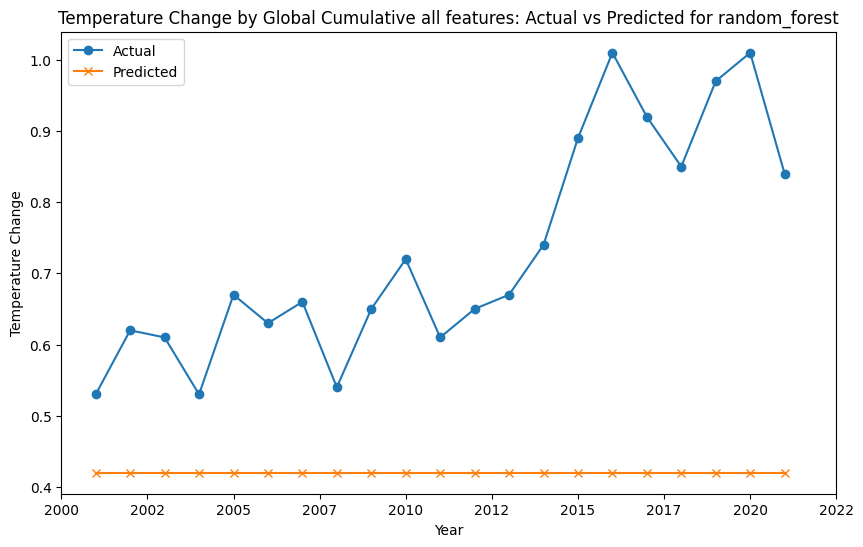

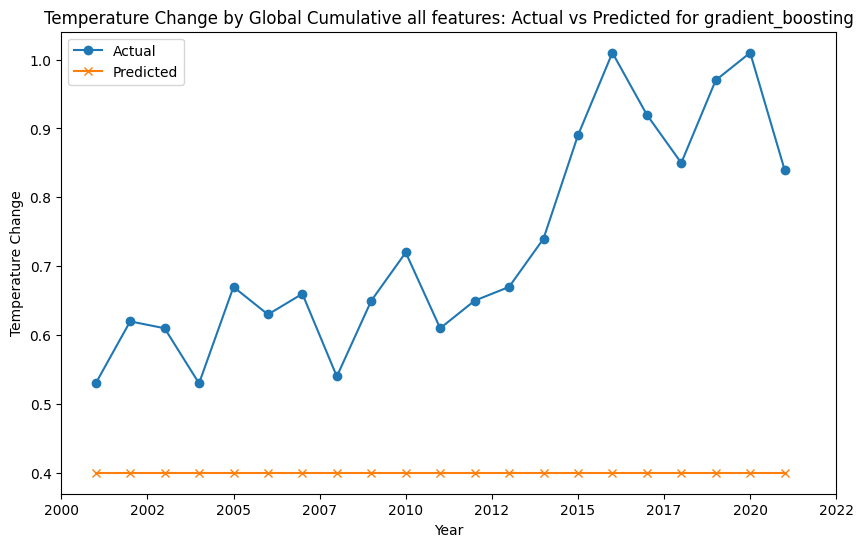

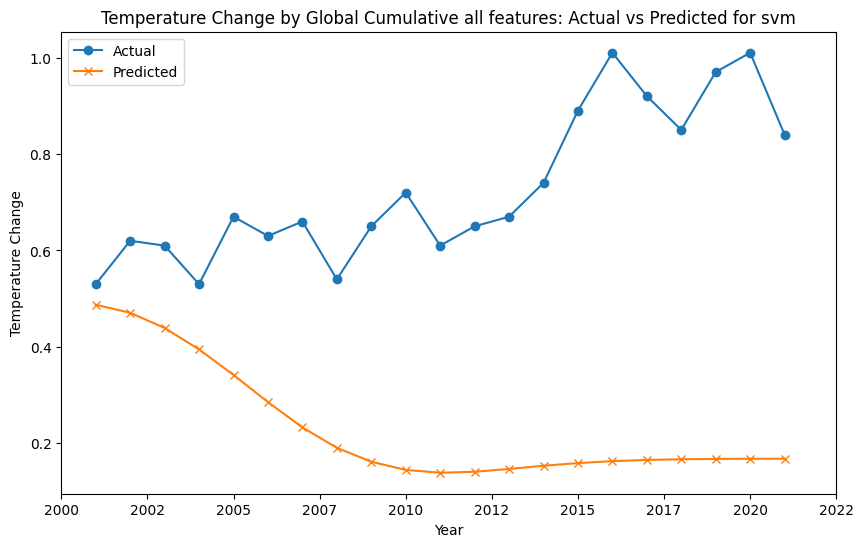

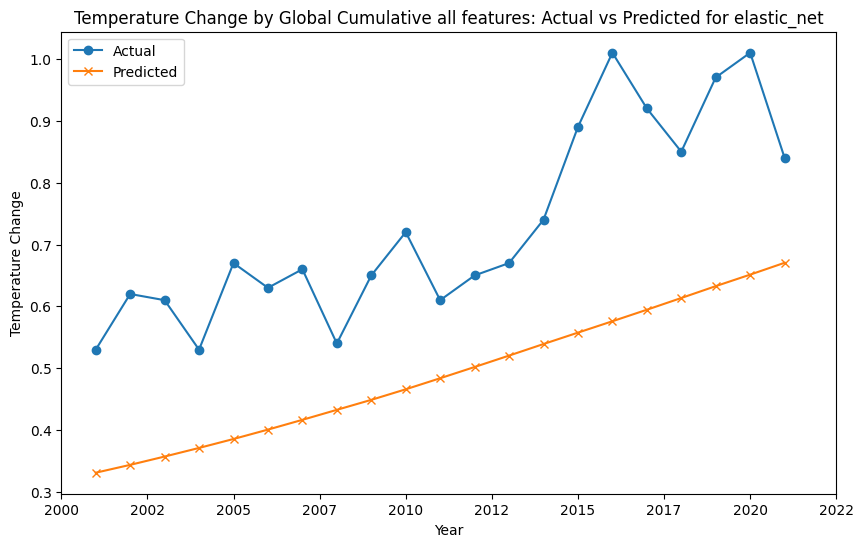

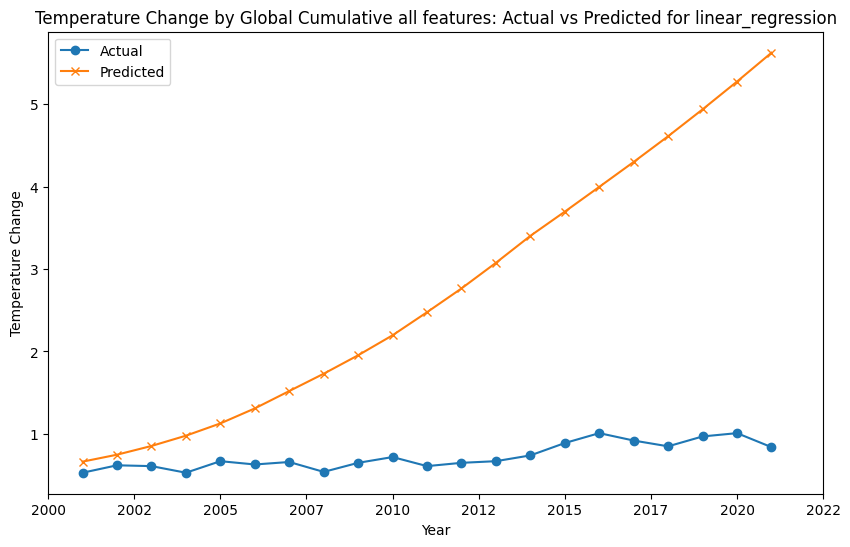

In [ ]:
# PLOT PREDICTIONS

import matplotlib.pyplot as plt
from joblib import load

# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
          'cumulative_cement_co2',
          'cumulative_coal_co2',
          'cumulative_gas_co2',
          'cumulative_luc_co2',
          'cumulative_oil_co2',
            'temp_change',
            'population',
            ]

# replace all 0 with missing values
df_filtered = df_merged.replace(0, np.nan)

# Select relevant columns
df_filtered = df_filtered[columns]

# drop all NaN for target
df_filtered = df_filtered.dropna(subset=['temp_change'])

# Split data based on year
train_data = df_filtered[df_filtered['year'] <= 2000]
test_data = df_filtered[df_filtered['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Define the base path where models are saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_all/'

model_names = ['random_forest', 'gradient_boosting', 'svm', 'elastic_net', 'linear_regression']

for name in model_names:
    # Load the best model using joblib from the specified path
    model_filename = f"{BASE_PATH}CML_Glob_all_best_{name}_model.joblib"
    model = load(model_filename)

    # Make predictions using the loaded model
    y_pred = model.predict(X_test)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['year'], y_test, label="Actual", marker='o')
    plt.plot(test_data['year'], y_pred, label="Predicted", marker='x')
    plt.title(f"Temperature Change by Global Cumulative all features: Actual vs Predicted for {name}")
    plt.xlabel('Year')
    plt.ylabel('Temperature Change')
    plt.legend()

    # Ensure x-ticks are integers
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels([int(tick) for tick in ax.get_xticks()])

    # Save the plot to the specified directory
    plot_filename = f"{BASE_PATH}CML_Glob_all_{name}_plot.png"
    plt.savefig(plot_filename)
    plt.show()


<ipython-input-10-495891b8bfda>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)


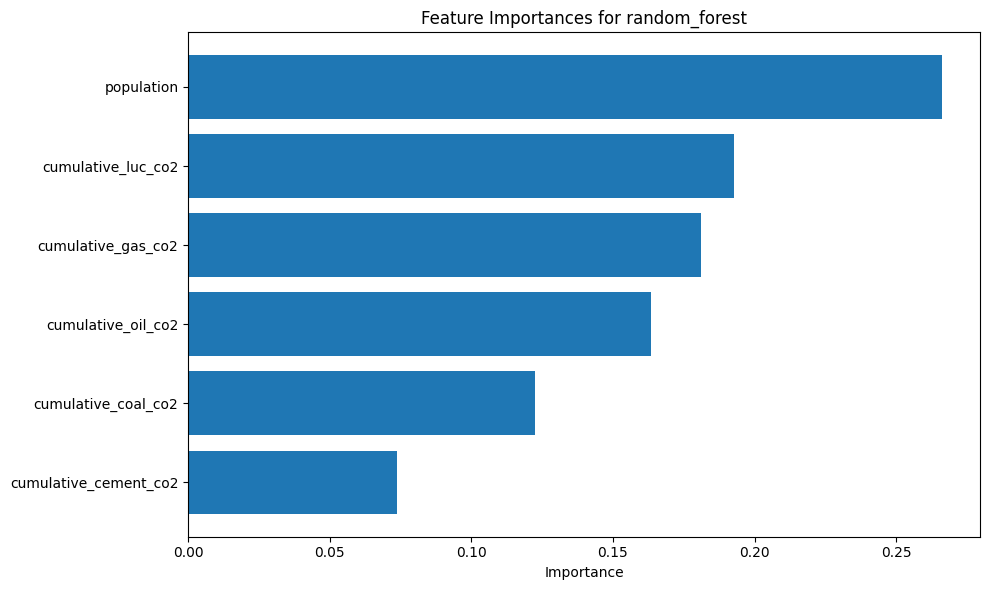

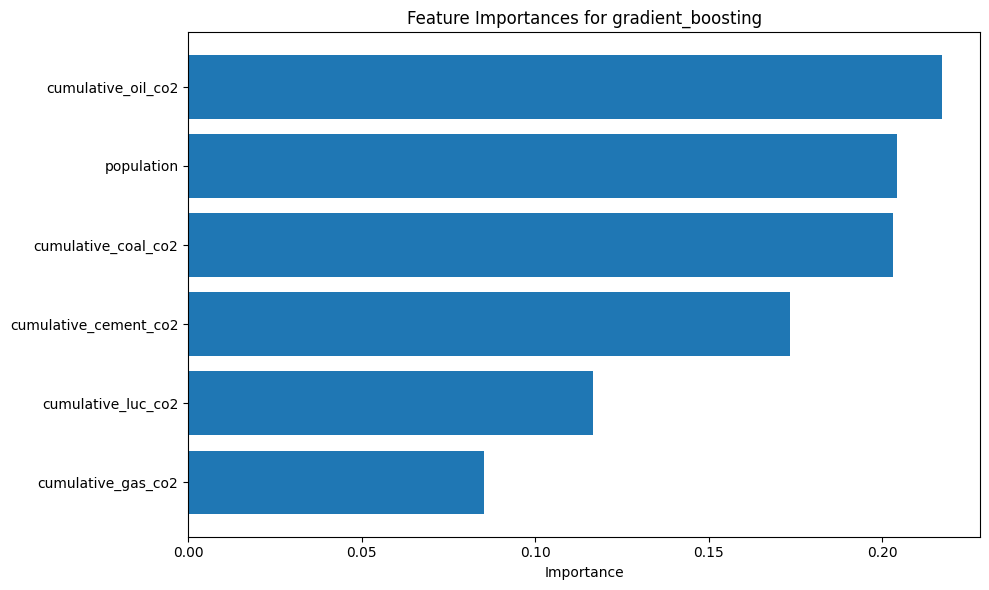

In [ ]:
import pandas as pd
from joblib import load

# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
          'cumulative_cement_co2',
          'cumulative_coal_co2',
          'cumulative_gas_co2',
          'cumulative_luc_co2',
          'cumulative_oil_co2',
            'temp_change',
            'population',
            ]

# replace all 0 with missing values
df_filtered = df_merged.replace(0, np.nan)

# Select relevant columns
df_filtered = df_filtered[columns]

# drop all NaN for target
df_filtered = df_filtered.dropna(subset=['temp_change'])

# Split data based on year
train_data = df_filtered[df_filtered['year'] <= 2000]
test_data = df_filtered[df_filtered['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Define the base path where models are saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_all/'

model_names = ['random_forest', 'gradient_boosting']

feature_importance_data = []

# 3. Load each model and 4. extract and plot feature importances
for name in model_names:
    model_filename = f"{BASE_PATH}CML_Glob_all_best_{name}_model.joblib"
    model = load(model_filename)

    importances = model.named_steps[name].feature_importances_
    sorted_idx = importances.argsort()

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(X_train.columns[sorted_idx], importances[sorted_idx], align='center')
    plt.xlabel('Importance')
    plt.title(f'Feature Importances for {name}')

    # Save the feature importance plot to the specified directory
    plot_filename = f"{BASE_PATH}CML_Glob_all_{name}_feature_importance_plot.png"
    plt.tight_layout()
    plt.savefig(plot_filename)
    plt.show()

    # Save the feature importance data
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    importance_filename = f"{BASE_PATH}CML_Glob_all_{name}_feature_importance.csv"
    importance_df.to_csv(importance_filename, index=False)


In [ ]:
# Coefficients for linear model

import pandas as pd
import matplotlib.pyplot as plt
from joblib import load

# Load NASA dataset and rename 'Year' column
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv')
df_NASA.rename(columns={'Year': 'year'}, inplace=True)

# Load OWID dataset, extract 'World' data, and rename 'Year' column
df_OWID = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID[df_OWID.country == 'World']
df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets and rename 'Glob' column
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year')
df_merged.rename(columns={'Glob': 'temp_change'}, inplace=True)
columns = ['year',
          'cumulative_cement_co2',
          'cumulative_coal_co2',
          'cumulative_gas_co2',
          'cumulative_luc_co2',
          'cumulative_oil_co2',
            'temp_change',
            'population',
            ]

# replace all 0 with missing values
df_filtered = df_merged.replace(0, np.nan)

# Select relevant columns
df_filtered = df_filtered[columns]

# drop all NaN for target
df_filtered = df_filtered.dropna(subset=['temp_change'])

# Split data based on year
train_data = df_filtered[df_filtered['year'] <= 2000]
test_data = df_filtered[df_filtered['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']


# Define the base path where models are saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_all/'

# Models for which we want to extract coefficients
model_names_with_coeffs = ['elastic_net', 'linear_regression']

coefficients_data = {}

# 3. Load each model and extract coefficients
for name in model_names_with_coeffs:
    model_filename = f"{BASE_PATH}CML_Glob_all_best_{name}_model.joblib"
    model = load(model_filename)
    coefficients = model.named_steps[name].coef_

    coefficients_data[name] = coefficients

# Convert the coefficients data into a dataframe
coefficients_df = pd.DataFrame(coefficients_data, index=X_train.columns)

# Save to CSV
coefficients_filename = f"{BASE_PATH}model_coefficients.csv"
coefficients_df.to_csv(coefficients_filename)

print("Coefficients saved!")


Coefficients saved!


<ipython-input-11-72c23c7dca5b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OWID_world.rename(columns={'Year': 'year'}, inplace=True)


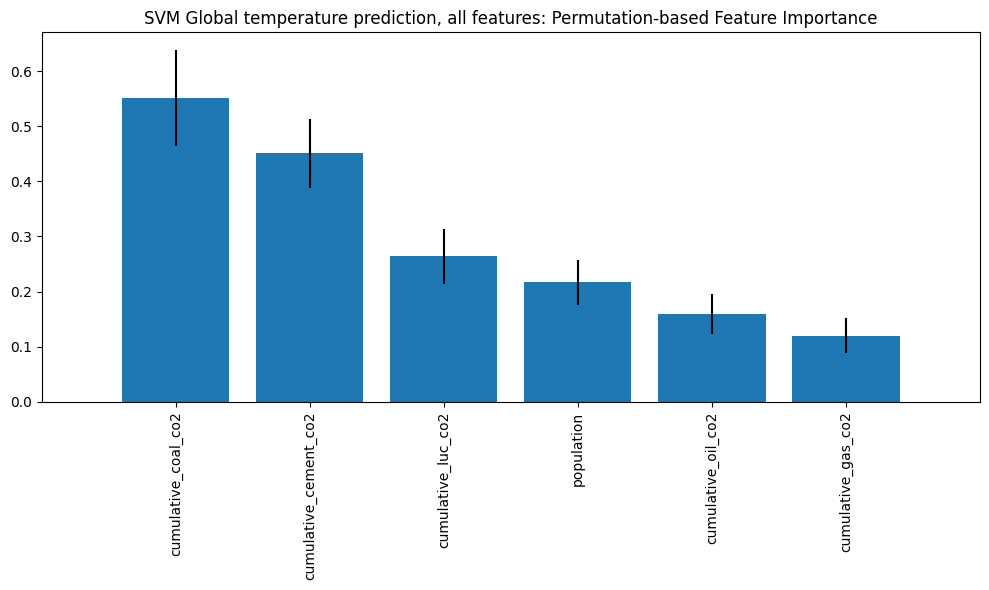

In [ ]:
# SVM Permutation importance

from sklearn.inspection import permutation_importance

model = load('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_all/CML_Glob_all_best_svm_model.joblib')

# Assuming `model` is your trained SVM model and `X_train`, `y_train` are your training data and labels respectively
result = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=42)

# Get importances and their standard deviations
importances = result.importances_mean
std = result.importances_std

# Sorting the indices
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("SVM Global temperature prediction, all features: Permutation-based Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


X does not have valid feature names, but IterativeImputer was fitted with feature names


  0%|          | 0/100 [00:00<?, ?it/s]

X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature names, but IterativeImputer was fitted with feature names
X does not have valid feature na

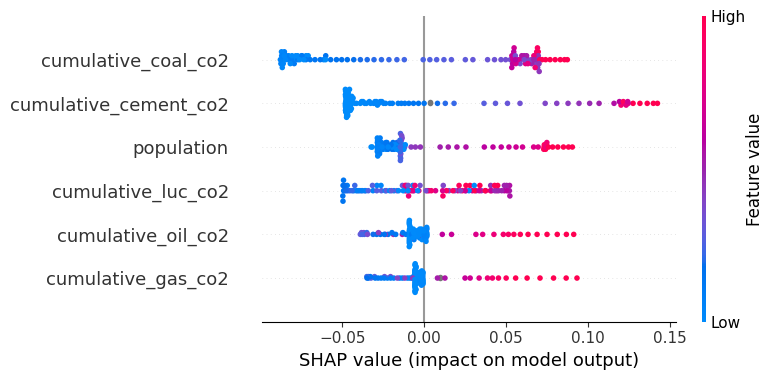

<Figure size 640x480 with 0 Axes>

In [ ]:
# SVM SHAP

# !pip install shap

import shap

# Assuming model is your trained SVM model

model = load('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_all/CML_Glob_all_best_svm_model.joblib')

# Create a custom prediction function
def predict_func(data):
    return model.predict(data)

# Initialize the explainer
explainer = shap.KernelExplainer(predict_func, X_train.sample(n=100, random_state=42))  # Using a subset for initialization.

# Compute SHAP values
shap_values = explainer.shap_values(X_train.sample(n=100, random_state=42))  # Using a subset for demonstration.

# Plot
shap.summary_plot(shap_values, X_train.sample(n=100, random_state=42), plot_type="dot")


# Save the beeswarm plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Glob_all/CML_Glob_all_svm_shap_beeswarm_plot.png')


### 2.3.3 Country CO2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from joblib import dump

# Read datasets
owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
path = '/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv'
annual_temp_change_data = pd.read_csv(path)

# Data preprocessing
temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'], value_vars=[f'F{i}' for i in range(1961, 2023)], var_name='year', value_name='temp_change')
temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

merged_data = pd.merge(owid_data, temp_change_melted, left_on=['iso_code', 'year'], right_on=['ISO3', 'year'], how='inner')
columns = ['year', 'cumulative_co2', 'iso_code', 'temp_change']
merged_data = merged_data[columns]
merged_data = merged_data.dropna(subset=['temp_change'])

# Train-test split
train_data = merged_data[merged_data['year'] <= 2000]
test_data = merged_data[merged_data['year'] > 2000]

X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Preprocessing steps
numeric_features = ['cumulative_co2']
categorical_features = ['iso_code']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', IterativeImputer(random_state=42)), ('scaler', StandardScaler())]), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Models and their parameters
models = [
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('svm', SVR()),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression())
]

param_grids = [
    {
        'random_forest__n_estimators': [10, 50, 100],
        'random_forest__max_depth': [None, 5, 10],
        'random_forest__min_samples_split': [2, 5, 10],
        'random_forest__random_state': [42]
    },
    {
        'gradient_boosting__n_estimators': [100, 200],
        'gradient_boosting__max_depth': [3, 5],
        'gradient_boosting__learning_rate': [0.01, 0.1],
        'gradient_boosting__random_state': [42]
    },
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.1, 1, 'scale', 'auto'],
        'svm__shrinking': [True, False]
    },
    {
        'elastic_net__alpha': [0.1, 1, 10],
        'elastic_net__l1_ratio': [0.3, 0.5, 0.7],
        'elastic_net__random_state': [42]
    },
    {}
]

# Model evaluation function
def evaluate_model(grid_search, name, X_train, y_train, X_test, y_test):
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    return {
        'Model': name,
        'Scope': 'Local',
        'Features': 'CO2',
        'R2 train': r2_score(y_train, y_pred_train),
        'R2 test': r2_score(y_test, y_pred_test),
        'MAE train': mean_absolute_error(y_train, y_pred_train),
        'MAE test': mean_absolute_error(y_test, y_pred_test),
        'MSE train': mean_squared_error(y_train, y_pred_train),
        'MSE test': mean_squared_error(y_test, y_pred_test),
        'RMSE train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Best Parameters': grid_search.best_params_
    }

# Model training, evaluation, and saving
results_data = []
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Country_CO2_new/'

tscv = TimeSeriesSplit(n_splits=2)
for (name, model), params in zip(models, param_grids):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])
    grid_search = GridSearchCV(pipeline, params, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    results_data.append(evaluate_model(grid_search, name, X_train, y_train, X_test, y_test))
    model_filename = f"{BASE_PATH}CML_Country_CO2_best_{name}_model.joblib"
    dump(grid_search.best_estimator_, model_filename)

results = pd.DataFrame(results_data)
results_filename = f"{BASE_PATH}CML_Country_CO2_results.csv"
results.to_csv(results_filename, index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


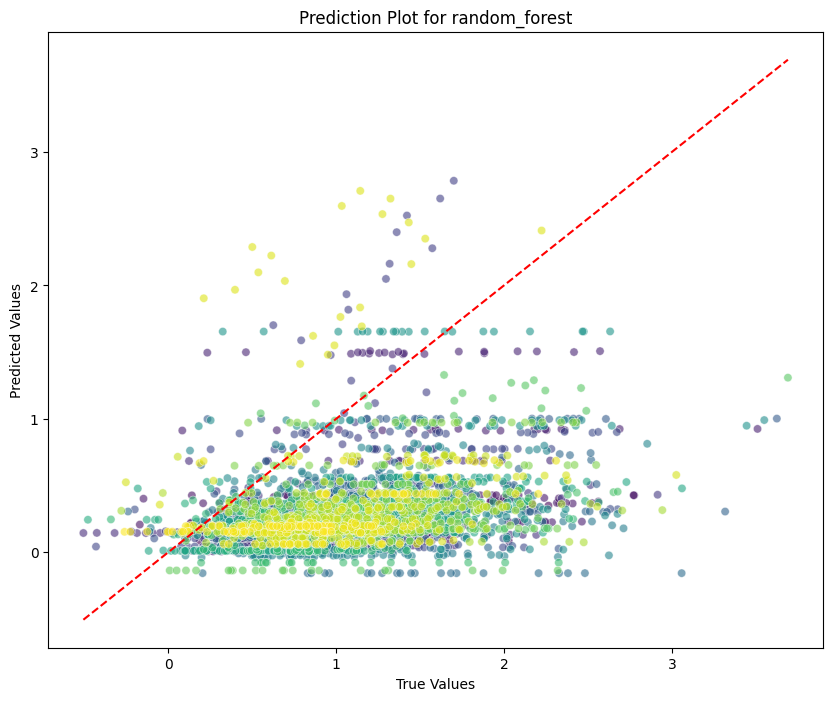

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


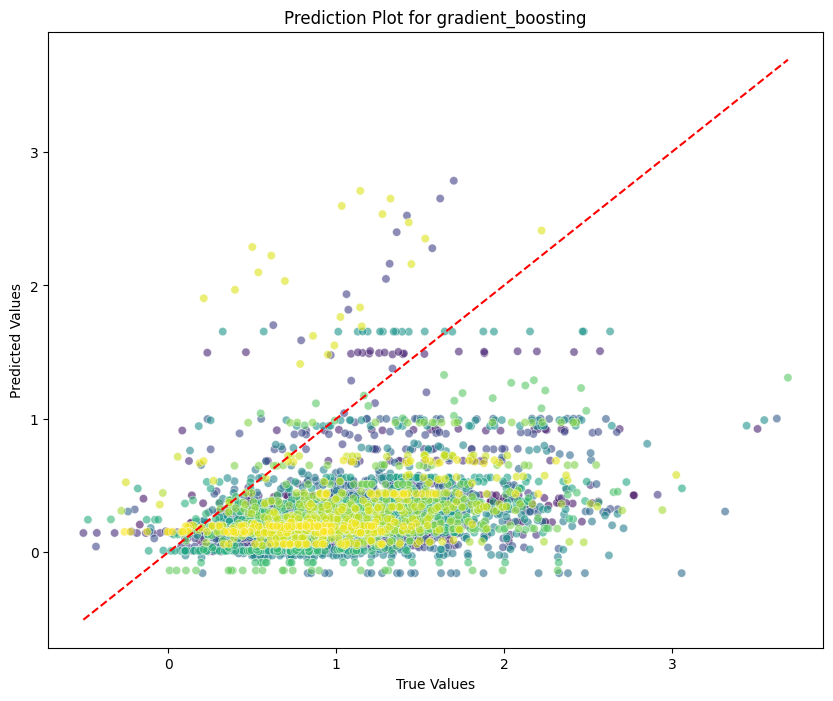

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


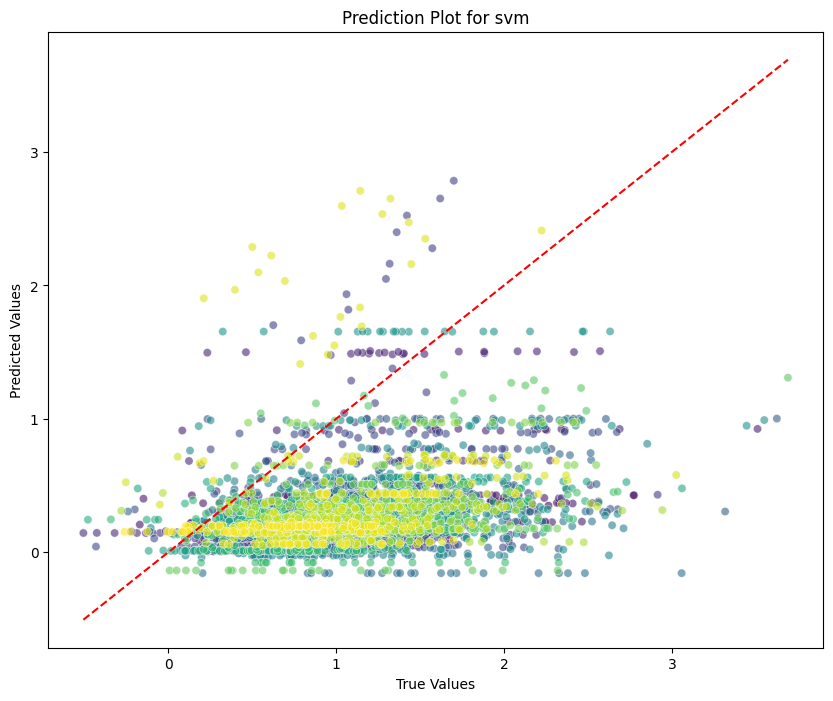

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


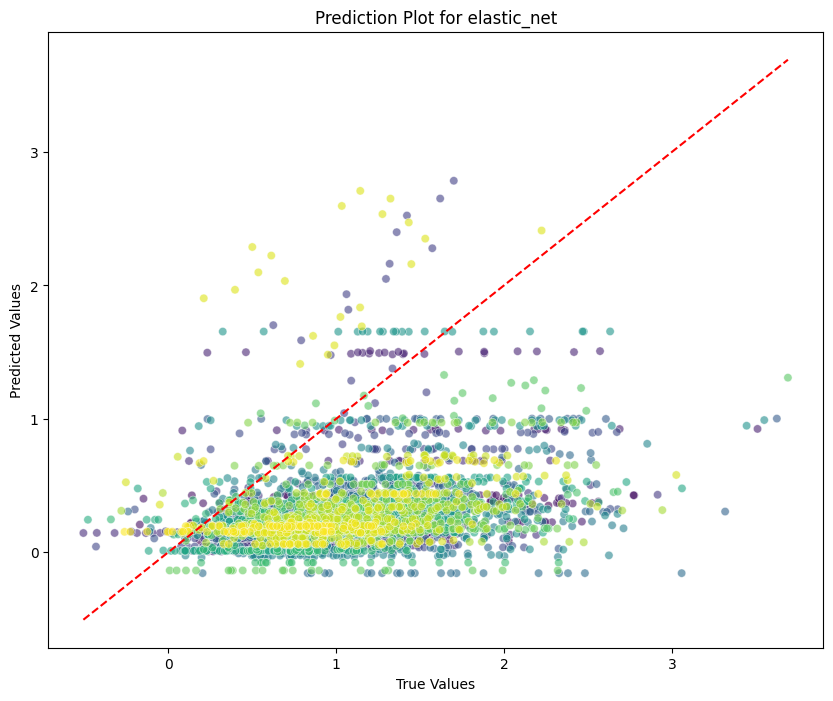

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


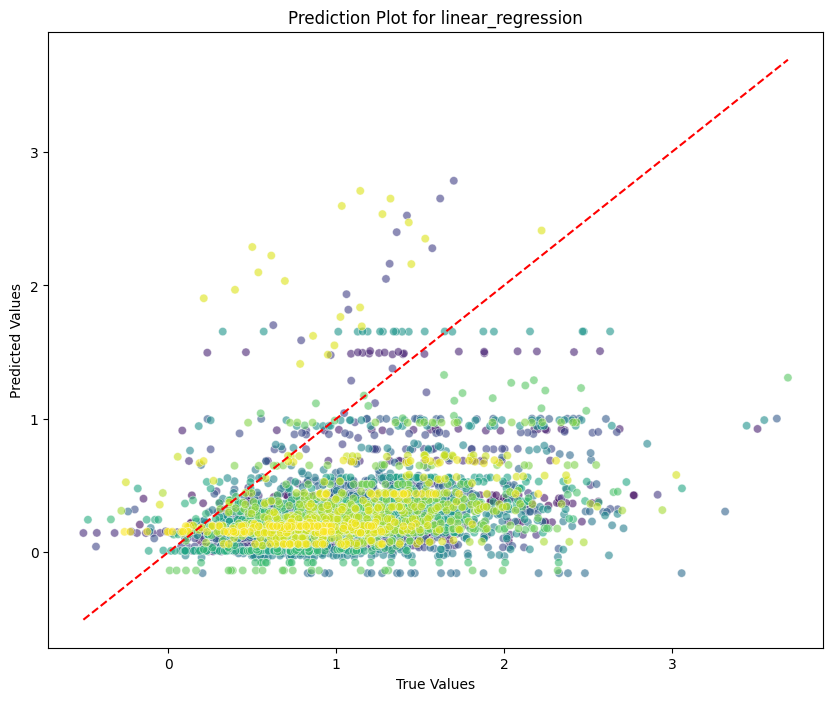

In [ ]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Country_CO2_new/'

def plot_predictions(y_true, y_pred, countries, model_name):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_true, y=y_pred, hue=countries, alpha=0.6, palette="viridis", legend=False)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', ls="--")
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Prediction Plot for {model_name}')
    plt.show()

# Assuming `models` is a list of (model_name, model_instance) tuples
for model_name, _ in models:  # We use _ for the model_instance since we're not using it

    # Load the best performing model from the BASE_PATH
    model_path = f"/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Country_CO2_new/CML_Country_CO2_best_{name}_model.joblib"
    model = joblib.load(model_path)

    # Predict using the loaded model
    y_pred = model.predict(X_test)

    # Plot the prediction plot, passing the 'Country' column from test_data for hue coloring
    plot_predictions(y_test, y_pred, test_data['iso_code'], model_name)









In [ ]:
test_data.size

17340

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
<ipython-input-16-d10e8234f97a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_true, y=residuals, alpha=0.6, palette="viridis", legend=False)


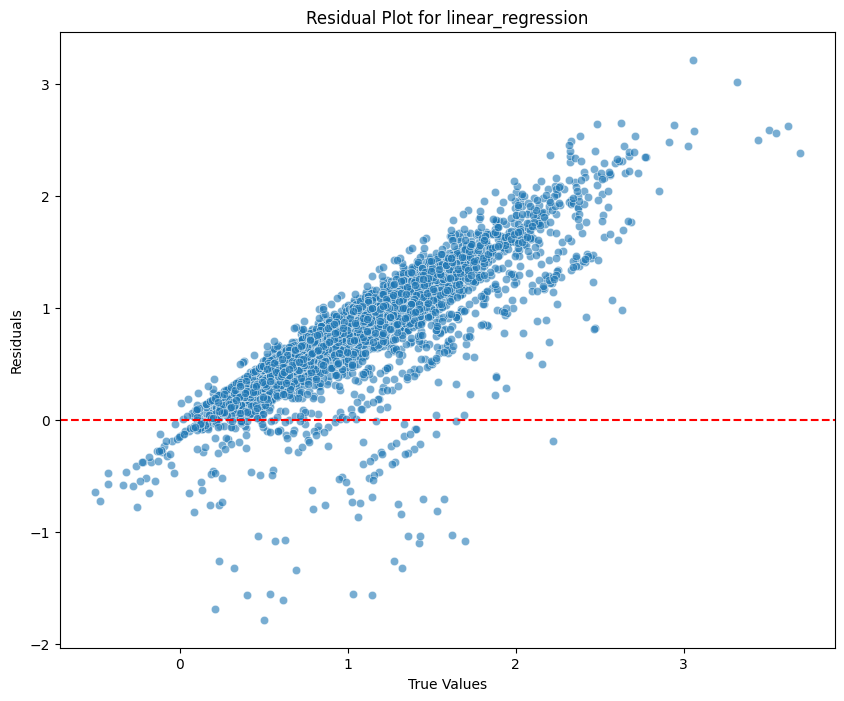

In [ ]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_true, y=residuals, alpha=0.6, palette="viridis", legend=False)

    plt.axhline(y=0, color='red', linestyle='--')

    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.show()

# Example usage:
y_pred = model.predict(X_test)
plot_residuals(y_test, y_pred, model_name)


In [ ]:
# DEPR

# MODELING PIPELINE INCLUDING PREPROCESSING, GRID SEARCH FOR CROSS-VALIDATION AND HYPERPARAMETER OPTIMIZATION AND
# PERFORMANCE METRICS COMPUTATION FOR BEST PERFORMING MODELS

from joblib import dump


# OWID dataset

owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')

# FAO
path = '/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv'
annual_temp_change_data = pd.read_csv(path)


# Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                  value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                  var_name='year', value_name='temp_change')

# Convert the 'year' column to integer for merging
temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

# Merge the datasets on country and year
merged_data = pd.merge(owid_data, temp_change_melted,
                       left_on=['iso_code', 'year'],
                       right_on=['ISO3', 'year'],
                       how='inner')


columns = ['year',
            'cumulative_co2',
            'temp_change',

            ]

# replace all 0 with missing values
# merged_data = df_merged.replace(0, np.nan)

# Select relevant columns
merged_data = merged_data[columns]

# drop all NaN for target
merged_data = merged_data.dropna(subset=['temp_change'])

# Split data based on year
train_data = merged_data[merged_data['year'] <= 2000]
test_data = merged_data[merged_data['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Define random seed
RANDOM_SEED = 42

# Initialize TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=2)

# Define preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', IterativeImputer(random_state=RANDOM_SEED)),
    ('scaler', StandardScaler())
])

# Add Linear Regression to the list of models
models = [
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('svm', SVR()),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression())
]

# Define the parameters for each model for grid search
param_grids = [
    # Parameters for random forest model
    {
        'random_forest__n_estimators': [10, 50, 100],
        'random_forest__max_depth': [None, 5, 10],
        'random_forest__min_samples_split': [2, 5, 10],
        'random_forest__random_state': [42]
    },
    # Parameters for gradient boosting model
    [{
        'gradient_boosting__n_estimators': [100, 200],
        'gradient_boosting__max_depth': [3, 5],
        'gradient_boosting__learning_rate': [0.01, 0.1],
        'gradient_boosting__random_state': [42]
    }],
    # Parameters for SVM model
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.1, 1, 'scale', 'auto'],
        'svm__shrinking': [True, False]
    },
    # Parameters for ElasticNet model
    {
        'elastic_net__alpha': [0.1, 1, 10],
        'elastic_net__l1_ratio': [0.3, 0.5, 0.7],
        'elastic_net__random_state': [42]
    },
    # Parameters for Linear Regression model
    {}
]

# Define a function to evaluate the performance
def evaluate_model(grid_search, name, X_train, y_train, X_test, y_test):
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    return {
        'Model': name,
        'Scope': 'Local',
        'Features': 'CO2',
        'R2 train': r2_score(y_train, y_pred_train),
        'R2 test': r2_score(y_test, y_pred_test),
        'MAE train': mean_absolute_error(y_train, y_pred_train),
        'MAE test': mean_absolute_error(y_test, y_pred_test),
        'MSE train': mean_squared_error(y_train, y_pred_train),
        'MSE test': mean_squared_error(y_test, y_pred_test),
        'RMSE train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Best Parameters': grid_search.best_params_
    }

results_data = []

# Define the base path where models will be saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Country_CO2/'

# Loop through each model, apply grid search, and evaluate
for (name, model), params in zip(models, param_grids):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])
    grid_search = GridSearchCV(pipeline, params, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    results_data.append(evaluate_model(grid_search, name, X_train, y_train, X_test, y_test))

    # Save the best model using joblib to the specified path
    model_filename = f"{BASE_PATH}CML_Country_CO2_best_{name}_model.joblib"
    dump(grid_search.best_estimator_, model_filename)

results = pd.DataFrame(results_data)
# Save the results dataframe to the specified path
results_filename = f"{BASE_PATH}CML_Country_CO2_results.csv"
results.to_csv(results_filename, index=False)

In [ ]:
# OWID dataset

owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')

# FAO
path = '/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv'
annual_temp_change_data = pd.read_csv(path)


# Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                  value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                  var_name='year', value_name='temp_change')

# Convert the 'year' column to integer for merging
temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

# Merge the datasets on country and year
merged_data = pd.merge(owid_data, temp_change_melted,
                       left_on=['iso_code', 'year'],
                       right_on=['ISO3', 'year'],
                       how='inner')

columns = ['year',
            'cumulative_co2',
            'temp_change',

            ]

# # replace all 0 with missing values
# merged_data = df_merged.replace(0, np.nan)

# Select relevant columns
merged_data = merged_data[columns]

merged_data

year  cumulative_co2  temp_change
0      1961           2.744       -0.113
1      1962           3.432       -0.164
2      1963           4.139        0.847
3      1964           4.978       -0.764
4      1965           5.985       -0.244
...     ...             ...          ...
13171  2017         753.403        0.088
13172  2018         765.199        0.453
13173  2019         776.313        0.925
13174  2020         786.921        0.389
13175  2021         798.217       -0.125

[13176 rows x 3 columns]

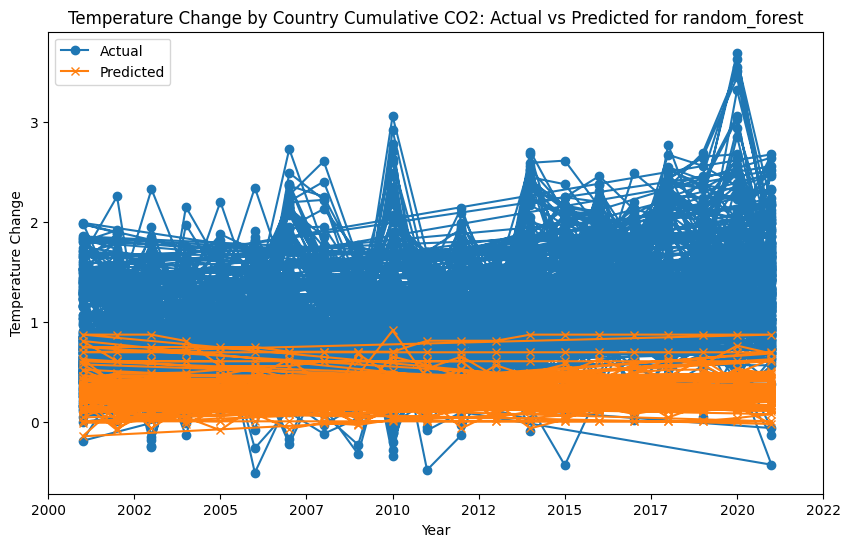

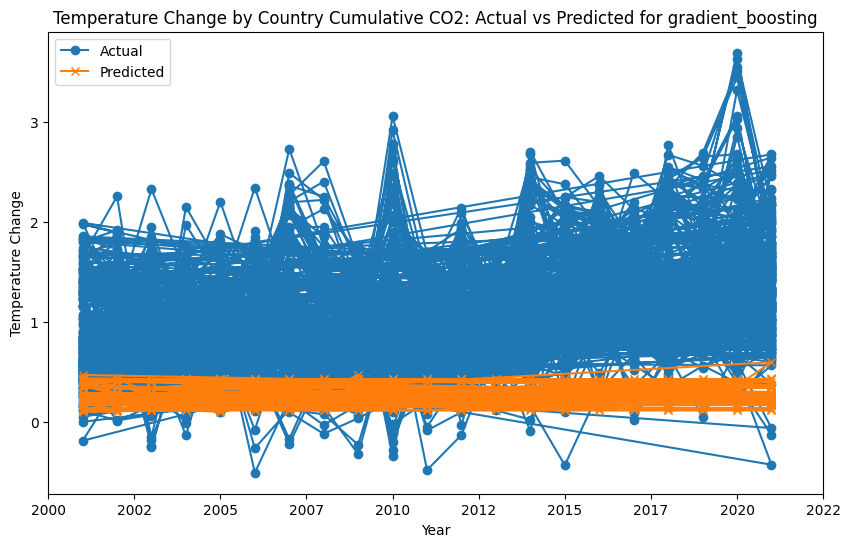

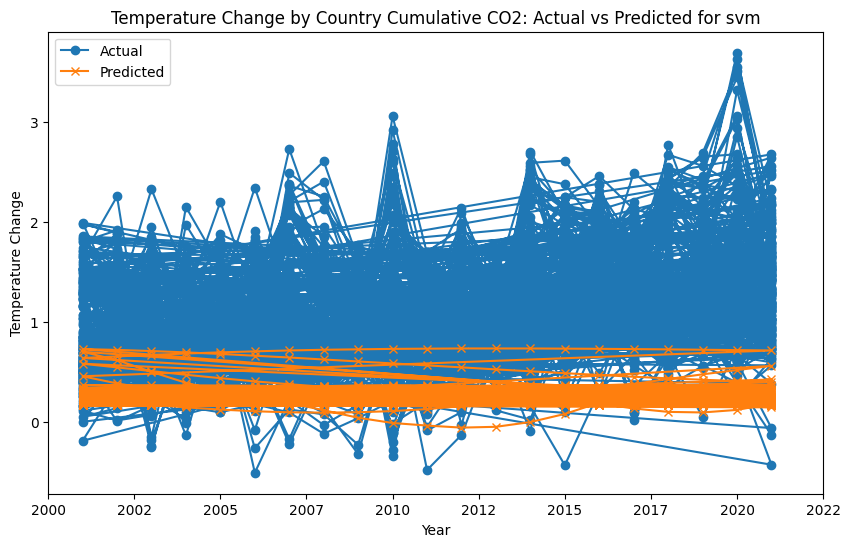

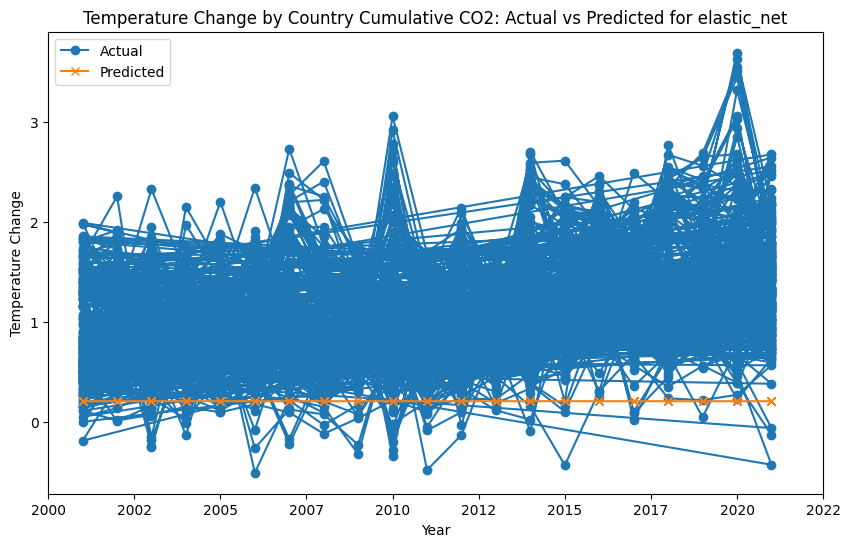

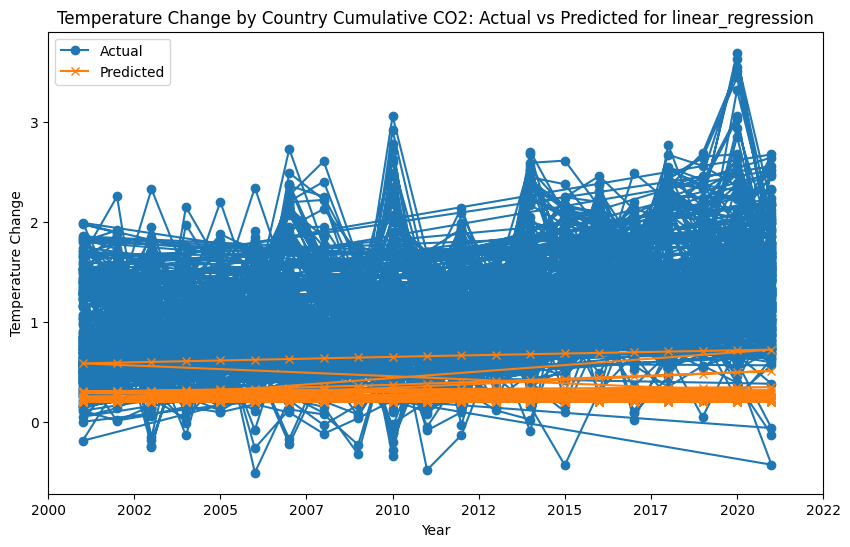

In [ ]:
# PLOT PREDICTIONS

import matplotlib.pyplot as plt
from joblib import load

# # OWID dataset

# owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')

# # FAO
# path = '/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv'
# annual_temp_change_data = pd.read_csv(path)


# # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
# temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
#                                                   value_vars=[f'F{i}' for i in range(1961, 2023)],
#                                                   var_name='year', value_name='temp_change')

# # Convert the 'year' column to integer for merging
# temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

# # Merge the datasets on country and year
# merged_data = pd.merge(owid_data, temp_change_melted,
#                        left_on=['iso_code', 'year'],
#                        right_on=['ISO3', 'year'],
#                        how='inner')


# columns = ['year',
#             'cumulative_co2',
#             'temp_change',

#             ]

# # replace all 0 with missing values
# merged_data = df_merged.replace(0, np.nan)

# # Select relevant columns
# merged_data = merged_data[columns]

# # drop all NaN for target
# merged_data = merged_data.dropna(subset=['temp_change'])

# # Split data based on year
# train_data = merged_data[merged_data['year'] <= 2000]
# test_data = merged_data[merged_data['year'] > 2000]

# # Separate features and target
# X_train = train_data.drop(columns=['temp_change', 'year'])
# y_train = train_data['temp_change']
# X_test = test_data.drop(columns=['temp_change', 'year'])
# y_test = test_data['temp_change']


# Define the base path where models are saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Country_CO2/'

model_names = ['random_forest', 'gradient_boosting', 'svm', 'elastic_net', 'linear_regression']

for name in model_names:
    # Load the best model using joblib from the specified path
    model_filename = f"{BASE_PATH}CML_Country_CO2_best_{name}_model.joblib"
    model = load(model_filename)

    # Make predictions using the loaded model
    y_pred = model.predict(X_test)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['year'], y_test, label="Actual", marker='o')
    plt.plot(test_data['year'], y_pred, label="Predicted", marker='x')
    plt.title(f"Temperature Change by Country Cumulative CO2: Actual vs Predicted for {name}")
    plt.xlabel('Year')
    plt.ylabel('Temperature Change')
    plt.legend()

    # Ensure x-ticks are integers
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels([int(tick) for tick in ax.get_xticks()])

    # Save the plot to the specified directory
    plot_filename = f"{BASE_PATH}CML_Country_CO2_{name}_plot.png"
    plt.savefig(plot_filename)
    plt.show()


### 2.3.4 Country all features

In [ ]:
# MODELING PIPELINE INCLUDING PREPROCESSING, GRID SEARCH FOR CROSS-VALIDATION AND HYPERPARAMETER OPTIMIZATION AND
# PERFORMANCE METRICS COMPUTATION FOR BEST PERFORMING MODELS

from joblib import dump

# OWID dataset

owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')

# FAO
path = '/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv'
annual_temp_change_data = pd.read_csv(path)


# Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                  value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                  var_name='year', value_name='temp_change')

# Convert the 'year' column to integer for merging
temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

# Merge the datasets on country and year
merged_data = pd.merge(owid_data, temp_change_melted,
                       left_on=['iso_code', 'year'],
                       right_on=['ISO3', 'year'],
                       how='inner')

columns = ['year',
          'cumulative_cement_co2',
          'cumulative_coal_co2',
          'cumulative_gas_co2',
          'cumulative_luc_co2',
          'cumulative_oil_co2',
            'temp_change',
            'population',
            ]


# replace all 0 with missing values
merged_data = df_merged.replace(0, np.nan)

# Select relevant columns
merged_data = merged_data[columns]

# drop all NaN for target
merged_data = merged_data.dropna(subset=['temp_change'])

# Split data based on year
train_data = merged_data[merged_data['year'] <= 2000]
test_data = merged_data[merged_data['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Define random seed
RANDOM_SEED = 42

# Initialize TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=2)

# Define preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', IterativeImputer(random_state=RANDOM_SEED)),
    ('scaler', StandardScaler())
])

# Add Linear Regression to the list of models
models = [
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('svm', SVR()),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression())
]

# Define the parameters for each model for grid search
param_grids = [
    # Parameters for random forest model
    {
        'random_forest__n_estimators': [10, 50, 100],
        'random_forest__max_depth': [None, 5, 10],
        'random_forest__min_samples_split': [2, 5, 10],
        'random_forest__random_state': [42]
    },
    # Parameters for gradient boosting model
    [{
        'gradient_boosting__n_estimators': [100, 200],
        'gradient_boosting__max_depth': [3, 5],
        'gradient_boosting__learning_rate': [0.01, 0.1],
        'gradient_boosting__random_state': [42]
    }],
    # Parameters for SVM model
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.1, 1, 'scale', 'auto'],
        'svm__shrinking': [True, False]
    },
    # Parameters for ElasticNet model
    {
        'elastic_net__alpha': [0.1, 1, 10],
        'elastic_net__l1_ratio': [0.3, 0.5, 0.7],
        'elastic_net__random_state': [42]
    },
    # Parameters for Linear Regression model
    {}
]

# Define a function to evaluate the performance
def evaluate_model(grid_search, name, X_train, y_train, X_test, y_test):
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    return {
        'Model': name,
        'Scope': 'Local',
        'Features': 'all',
        'R2 train': r2_score(y_train, y_pred_train),
        'R2 test': r2_score(y_test, y_pred_test),
        'MAE train': mean_absolute_error(y_train, y_pred_train),
        'MAE test': mean_absolute_error(y_test, y_pred_test),
        'MSE train': mean_squared_error(y_train, y_pred_train),
        'MSE test': mean_squared_error(y_test, y_pred_test),
        'RMSE train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Best Parameters': grid_search.best_params_
    }

results_data = []

# Define the base path where models will be saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Country_all/'

# Loop through each model, apply grid search, and evaluate
for (name, model), params in zip(models, param_grids):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])
    grid_search = GridSearchCV(pipeline, params, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    results_data.append(evaluate_model(grid_search, name, X_train, y_train, X_test, y_test))

    # Save the best model using joblib to the specified path
    model_filename = f"{BASE_PATH}CML_Country_all_best_{name}_model.joblib"
    dump(grid_search.best_estimator_, model_filename)

results = pd.DataFrame(results_data)
# Save the results dataframe to the specified path
results_filename = f"{BASE_PATH}CML_Country_all_results.csv"
results.to_csv(results_filename, index=False)

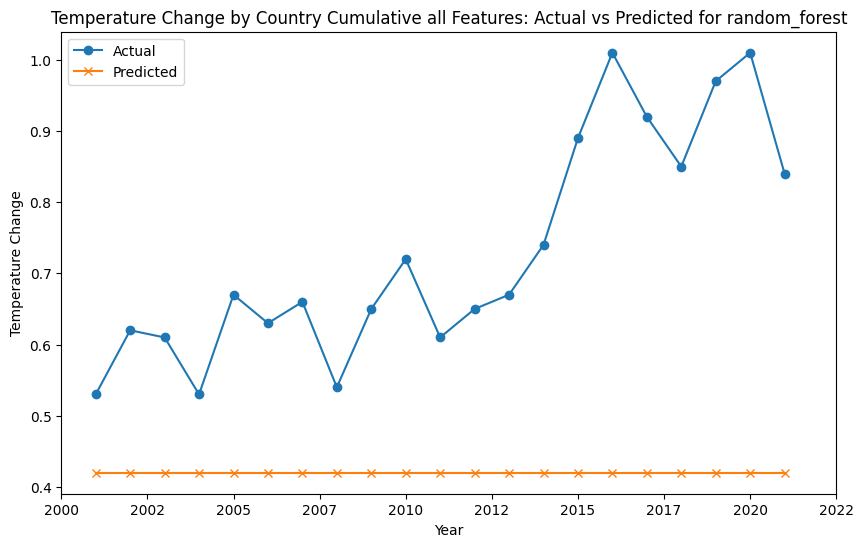

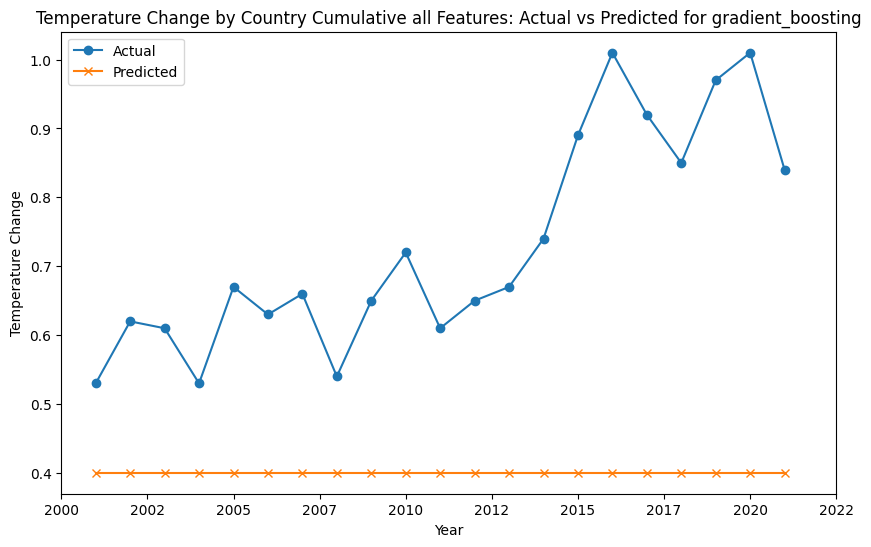

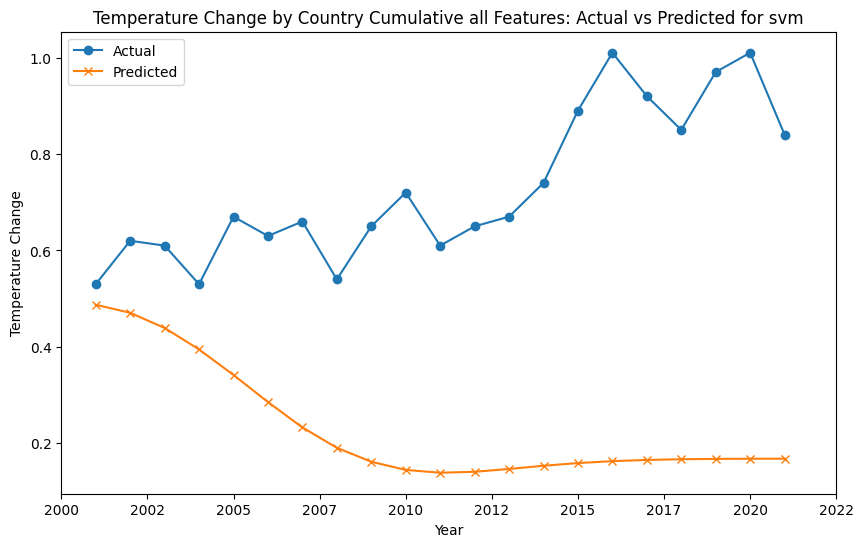

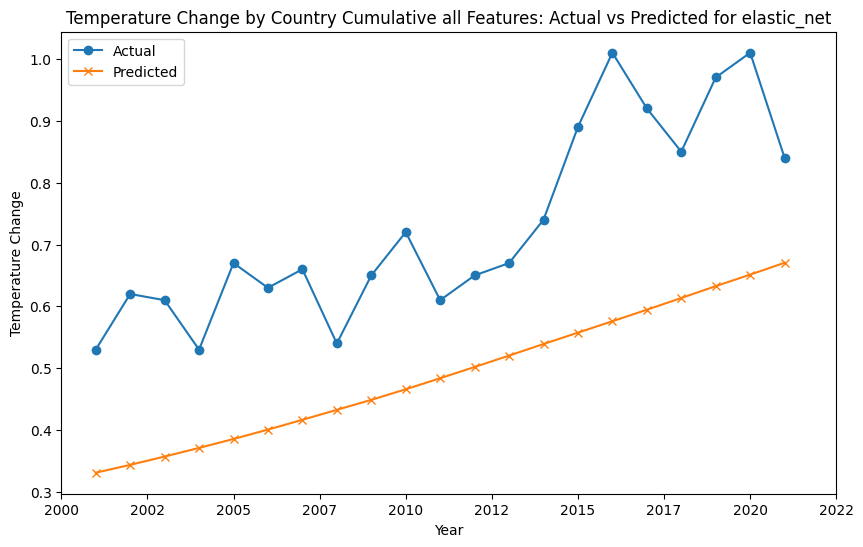

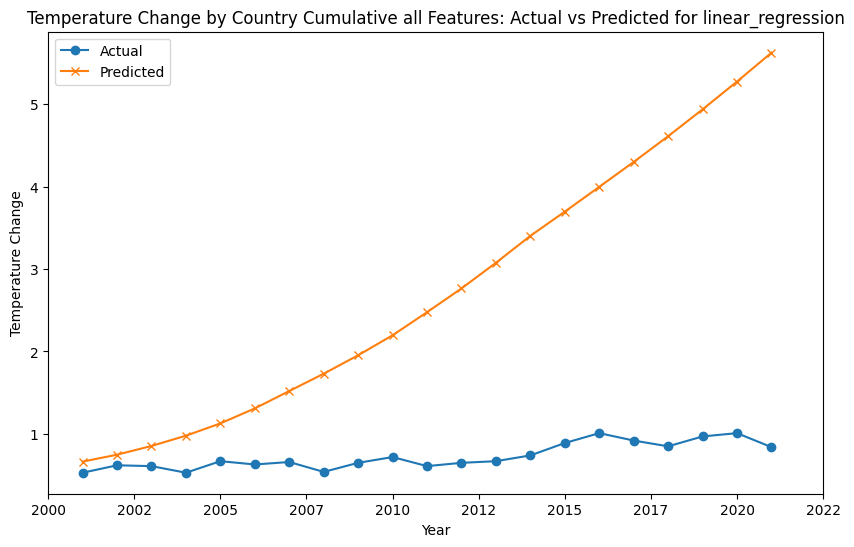

In [ ]:
# PLOT PREDICTIONS

import matplotlib.pyplot as plt
from joblib import load

# OWID dataset

owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')

# FAO
path = '/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv'
annual_temp_change_data = pd.read_csv(path)


# Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                  value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                  var_name='year', value_name='temp_change')

# Convert the 'year' column to integer for merging
temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

# Merge the datasets on country and year
merged_data = pd.merge(owid_data, temp_change_melted,
                       left_on=['iso_code', 'year'],
                       right_on=['ISO3', 'year'],
                       how='inner')

columns = ['year',
          'cumulative_cement_co2',
          'cumulative_coal_co2',
          'cumulative_gas_co2',
          'cumulative_luc_co2',
          'cumulative_oil_co2',
            'temp_change',
            'population',
            ]


# replace all 0 with missing values
merged_data = df_merged.replace(0, np.nan)

# Select relevant columns
merged_data = merged_data[columns]

# drop all NaN for target
merged_data = merged_data.dropna(subset=['temp_change'])

# Split data based on year
train_data = merged_data[merged_data['year'] <= 2000]
test_data = merged_data[merged_data['year'] > 2000]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']


# Define the base path where models are saved
BASE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/CML_Country_all/'

model_names = ['random_forest', 'gradient_boosting', 'svm', 'elastic_net', 'linear_regression']

for name in model_names:
    # Load the best model using joblib from the specified path
    model_filename = f"{BASE_PATH}CML_Country_all_best_{name}_model.joblib"
    model = load(model_filename)

    # Make predictions using the loaded model
    y_pred = model.predict(X_test)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['year'], y_test, label="Actual", marker='o')
    plt.plot(test_data['year'], y_pred, label="Predicted", marker='x')
    plt.title(f"Temperature Change by Country Cumulative all Features: Actual vs Predicted for {name}")
    plt.xlabel('Year')
    plt.ylabel('Temperature Change')
    plt.legend()

    # Ensure x-ticks are integers
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels([int(tick) for tick in ax.get_xticks()])

    # Save the plot to the specified directory
    plot_filename = f"{BASE_PATH}CML_Country_all_{name}_plot.png"
    plt.savefig(plot_filename)
    plt.show()


### 2.3.5 Overall supervised ML and ensemble models performance overview

In [ ]:
# Concat dataframes
results_final_cum = pd.concat([results_cml_nasa_glob_cum_co2,
                              results_cml_nasa_cum_glob_all2,
                              results_cml_fao_cum_co2_2,
                              results_cml_fao_cum_all2
                           ])
results_final_cum

# Sort ascending by MSE test
results_final_cum = results_final_cum.sort_values(by = 'MSE test')
results_final_cum = results_final_cum.reset_index().drop(columns = 'index')

# Round
# List of columns that need to be rounded
columns_to_round = ['R2 train', 'R2 test', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'RMSE train', 'RMSE test']

# Rounding the columns
results_final_cum[columns_to_round] = results_final_cum[columns_to_round].round(3)

results_final_cum


Model   Scope Features  R2 train  R2 test  ...  MSE train  \
0   linear_regression  Global      CO2     0.744    0.717  ...      0.014   
1   linear_regression   Local      CO2     0.744    0.717  ...      0.014   
2         elastic_net  Global      CO2     0.685   -1.481  ...      0.018   
3         elastic_net   Local      CO2     0.685   -1.481  ...      0.018   
4         elastic_net  Global      all     0.697   -1.709  ...      0.017   
5         elastic_net   Local      all     0.697   -1.709  ...      0.017   
6                 svm  Global      CO2     0.747   -1.717  ...      0.014   
7                 svm   Local      CO2     0.747   -1.717  ...      0.014   
8       random_forest   Local      all     0.943   -4.118  ...      0.003   
9       random_forest   Local      CO2     0.943   -4.118  ...      0.003   
10      random_forest  Global      CO2     0.943   -4.118  ...      0.003   
11      random_forest  Global      all     0.943   -4.118  ...      0.003   
12  gradient_boosting   Local      CO2     0.971   -4.756  ...      0.002   
13  gradient_boosting  Global      CO2     0.971   -4.756  ...      0.002   
14  gradient_boosting  Global      all     0.997   -4.962  ...      0.000   
15  gradient_boosting   Local      all     0.997   -4.962  ...      0.000   
16                svm  Global      all     0.813  -12.223  ...      0.011   
17                svm   Local      all     0.813  -12.223  ...      0.011   
18  linear_regression  Global      all     0.796 -257.444  ...      0.011   
19  linear_regression   Local      all     0.796 -257.444  ...      0.011   

    MSE test  RMSE train  RMSE test  \
0      0.007       0.120      0.082   
1      0.007       0.120      0.082   
2      0.059       0.133      0.244   
3      0.059       0.133      0.244   
4      0.065       0.130      0.255   
5      0.065       0.130      0.255   
6      0.065       0.119      0.255   
7      0.065       0.119      0.255   
8      0.122       0.057      0.350   
9      0.122       0.056      0.350   
10     0.122       0.056      0.350   
11     0.122       0.057      0.350   
12     0.138       0.041      0.371   
13     0.138       0.041      0.371   
14     0.143       0.014      0.378   
15     0.143       0.014      0.378   
16     0.316       0.102      0.562   
17     0.316       0.102      0.562   
18     6.182       0.107      2.486   
19     6.182       0.107      2.486   

                                      Best Parameters  
0                                                  {}  
1                                                  {}  
2   {'elastic_net__alpha': 0.1, 'elastic_net__l1_r...  
3   {'elastic_net__alpha': 0.1, 'elastic_net__l1_r...  
4   {'elastic_net__alpha': 0.1, 'elastic_net__l1_r...  
5   {'elastic_net__alpha': 0.1, 'elastic_net__l1_r...  
6   {'svm__C': 10, 'svm__gamma': 0.1, 'svm__shrink...  
7   {'svm__C': 10, 'svm__gamma': 0.1, 'svm__shrink...  
8   {'random_forest__max_depth': None, 'random_for...  
9   {'random_forest__max_depth': None, 'random_for...  
10  {'random_forest__max_depth': None, 'random_for...  
11  {'random_forest__max_depth': None, 'random_for...  
12  {'gradient_boosting__learning_rate': 0.1, 'gra...  
13  {'gradient_boosting__learning_rate': 0.1, 'gra...  
14  {'gradient_boosting__learning_rate': 0.1, 'gra...  
15  {'gradient_boosting__learning_rate': 0.1, 'gra...  
16  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__sh...  
17  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__sh...  
18                                                 {}  
19                                                 {}  

[20 rows x 12 columns]

### 2.3.6 In-depth analysis best performing model (linear regression, global, CO2)

0.7169227532040784


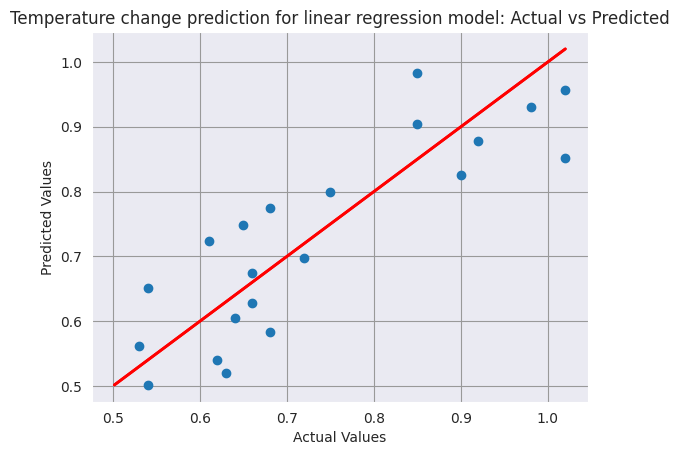

In [ ]:
# CURRENT

from sklearn.linear_model import LinearRegression

# Constants
RANDOM_SEED = 42  # or any other seed value
SPLIT_YEAR = 2000

# Load and preprocess datasets
df_NASA = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv').rename(columns={'Year': 'year'})
df_OWID_world = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df_OWID_world = df_OWID_world[df_OWID_world.country == 'World'].rename(columns={'Year': 'year'})
df_merged = df_OWID_world.merge(df_NASA[['year', 'Glob']], on='year').rename(columns={'Glob': 'temp_change'})
df_filtered = df_merged[['year', 'cumulative_co2', 'temp_change']].replace(0, np.nan).dropna(subset=['temp_change'])

# Split data
train_data = df_filtered[df_filtered['year'] <= SPLIT_YEAR]
test_data = df_filtered[df_filtered['year'] > SPLIT_YEAR]

# Separate features and target
X_train = train_data.drop(columns=['temp_change', 'year'])
y_train = train_data['temp_change']
X_test = test_data.drop(columns=['temp_change', 'year'])
y_test = test_data['temp_change']

# Preprocessing
preprocessor = Pipeline([
    ('imputer', IterativeImputer(random_state=RANDOM_SEED)),
    ('scaler', StandardScaler())
])
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Training
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)
y_pred = lr.predict(X_test_preprocessed)
print(r2_score(y_test, y_pred))

# Draw the regression line:
# The regression line in this specific case of plotting y_test vs. y_pred would be the line
# y=x, because you want your predicted values (y_pred) to be as close as possible to your actual values (y_test).
# This means that for an ideal model, each point would lie on this line.

# Line where y_pred = y_test
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

plt.plot([min_val, max_val], [min_val, max_val], 'r', linewidth=2)

# Print the plot

plt.scatter(y_test,y_pred)

plt.plot([min_val, max_val], [min_val, max_val], 'r', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Temperature change prediction for linear regression model: Actual vs Predicted')
plt.grid(True)
plt.show()

In [ ]:
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

feats2 = list(X_train.columns)
feats2.insert(0, 'Intercept')

coefficients = pd.DataFrame({'Estimated value': coeffs}, index=feats2).round(3)

display(coefficients)

Estimated value
Intercept                -0.064
cumulative_co2            0.204

## 2.4 Long Short-Term Memory Neural Network (LSTM) model

In [ ]:
# df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
# df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

#     # Merging and renaming columns
# df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
# df = df[['year', 'cumulative_co2', 'temp_change']].dropna(subset=['temp_change'])
# train_data = df[df['year'] <= 2000]
# test_data = df[df['year'] > 2000]
# print(train_data.head())
# print(test_data.head())


   year  cumulative_co2  temp_change
0  1880       18613.174        -0.17
1  1881       19495.580        -0.09
2  1882       20427.502        -0.11
3  1883       21418.535        -0.18
4  1884       22420.709        -0.29
     year  cumulative_co2  temp_change
121  2001     1071765.500         0.54
122  2002     1098046.500         0.63
123  2003     1125698.125         0.62
124  2004     1154334.875         0.53
125  2005     1183949.375         0.68


### 2.4.1 Global CO2

In [ ]:
# CURRENT

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = 'LSTM_Glob_CO2_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "LSTM_Glob_CO2_best_model.h5"
    RESULTS_PATH = 'LSTM_Glob_CO2_results.csv'
    MODEL_ARCH_PATH = 'LSTM_Glob_CO2_model_config.json'
    MODEL_WEIGHTS_PATH = 'LSTM_Glob_CO2_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = 'LSTM_Glob_CO2_library_versions.txt'

# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""
    # Load data
    df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
    df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

    # Merging and renaming columns
    df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
    df.replace(0, np.nan, inplace=True)

    # Preprocess data
    df = df[['year', 'cumulative_co2', 'temp_change']].dropna(subset=['temp_change'])
    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(train_data, test_data):
    """Preprocess the data."""
    # Split features and targets
    X_train = train_data.drop(columns=['temp_change', 'year'])
    y_train = train_data['temp_change']
    X_test = test_data.drop(columns=['temp_change', 'year'])
    y_test = test_data['temp_change']

    # Create and apply preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42, max_iter=10, initial_strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_test_preprocessed = pipeline.transform(X_test)

    # Save the preprocessing pipeline
    joblib.dump(pipeline, Config.PIPELINE_PATH)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test

def reshape_for_lstm(data, n_steps):
    """Reshape data for LSTM input."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps, -1])
    return np.array(X), np.array(y)

def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 32, 256, 32)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data = split_data(df)
    X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)

    n_steps = 10
    train_data_combined = np.hstack((X_train, y_train.values.reshape(-1, 1)))
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_combined, n_steps)

    test_data_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_combined, n_steps)

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)

    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    # Results
    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'CO2',
        'R2 test': [r2_test],
        'MAE test': [mae_test],
        'MSE test': [mse_test],
        'RMSE test': [rmse_test],
        'Best Parameters': [str(study.best_params)]
    })

    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


[I 2023-10-10 14:20:12,051] A new study created in memory with name: no-name-3d3ab98d-1094-420f-b52f-79b469a20a84


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-10 14:21:04,241] Trial 0 finished with value: 0.05433849524706602 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 0 with value: 0.05433849524706602.


Training with parameters: units=256, activation=tanh, batch_size=64
Training with parameters: units=256, activation=tanh, batch_size=64


[I 2023-10-10 14:21:43,351] Trial 1 finished with value: 0.061828408390283585 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 64}. Best is trial 0 with value: 0.05433849524706602.


Training with parameters: units=96, activation=sigmoid, batch_size=16
Training with parameters: units=96, activation=sigmoid, batch_size=16


[I 2023-10-10 14:22:01,573] Trial 2 finished with value: 0.03911221958696842 and parameters: {'units': 96, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 2 with value: 0.03911221958696842.


Training with parameters: units=256, activation=tanh, batch_size=32
Training with parameters: units=256, activation=tanh, batch_size=32


[I 2023-10-10 14:22:30,451] Trial 3 finished with value: 0.039313378278166056 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 32}. Best is trial 2 with value: 0.03911221958696842.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-10 14:22:56,411] Trial 4 finished with value: 0.06201938912272453 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 2 with value: 0.03911221958696842.


Training with parameters: units=32, activation=sigmoid, batch_size=16
Training with parameters: units=32, activation=sigmoid, batch_size=16


[I 2023-10-10 14:23:07,801] Trial 5 finished with value: 0.03835702035576105 and parameters: {'units': 32, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.03835702035576105.


Training with parameters: units=192, activation=sigmoid, batch_size=64
Training with parameters: units=192, activation=sigmoid, batch_size=64


[I 2023-10-10 14:23:18,254] Trial 6 finished with value: 0.11950027197599411 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 5 with value: 0.03835702035576105.


Training with parameters: units=128, activation=relu, batch_size=32
Training with parameters: units=128, activation=relu, batch_size=32


[I 2023-10-10 14:23:43,822] Trial 7 finished with value: 1910186.6427349858 and parameters: {'units': 128, 'activation': 'relu', 'batch_size': 32}. Best is trial 5 with value: 0.03835702035576105.


Training with parameters: units=96, activation=sigmoid, batch_size=16
Training with parameters: units=96, activation=sigmoid, batch_size=16


[I 2023-10-10 14:23:56,878] Trial 8 finished with value: 0.12421971186995506 and parameters: {'units': 96, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.03835702035576105.


Training with parameters: units=64, activation=tanh, batch_size=32
Training with parameters: units=64, activation=tanh, batch_size=32


[I 2023-10-10 14:24:14,660] Trial 9 finished with value: 0.029724324122071266 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 32}. Best is trial 9 with value: 0.029724324122071266.


Training with parameters: units=32, activation=relu, batch_size=32
Training with parameters: units=32, activation=relu, batch_size=32


[I 2023-10-10 14:24:24,200] Trial 10 finished with value: 291.1404561093077 and parameters: {'units': 32, 'activation': 'relu', 'batch_size': 32}. Best is trial 9 with value: 0.029724324122071266.


Training with parameters: units=32, activation=sigmoid, batch_size=32
Training with parameters: units=32, activation=sigmoid, batch_size=32


[I 2023-10-10 14:24:37,106] Trial 11 finished with value: 0.07873613387346268 and parameters: {'units': 32, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 9 with value: 0.029724324122071266.


Training with parameters: units=64, activation=sigmoid, batch_size=16
Training with parameters: units=64, activation=sigmoid, batch_size=16


[I 2023-10-10 14:24:47,587] Trial 12 finished with value: 0.08141601085662842 and parameters: {'units': 64, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 9 with value: 0.029724324122071266.


Training with parameters: units=64, activation=tanh, batch_size=32
Training with parameters: units=64, activation=tanh, batch_size=32


[I 2023-10-10 14:24:58,933] Trial 13 finished with value: 0.022990940138697624 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 32}. Best is trial 13 with value: 0.022990940138697624.


Training with parameters: units=160, activation=tanh, batch_size=32
Training with parameters: units=160, activation=tanh, batch_size=32


[I 2023-10-10 14:25:16,105] Trial 14 finished with value: 0.038171205669641495 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 32}. Best is trial 13 with value: 0.022990940138697624.


Training with parameters: units=96, activation=tanh, batch_size=32
Training with parameters: units=96, activation=tanh, batch_size=32


[I 2023-10-10 14:25:29,990] Trial 15 finished with value: 0.03623016178607941 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 32}. Best is trial 13 with value: 0.022990940138697624.


Training with parameters: units=64, activation=tanh, batch_size=32
Training with parameters: units=64, activation=tanh, batch_size=32


[I 2023-10-10 14:25:38,485] Trial 16 finished with value: 0.02595183439552784 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 32}. Best is trial 13 with value: 0.022990940138697624.


Training with parameters: units=128, activation=relu, batch_size=32
Training with parameters: units=128, activation=relu, batch_size=32


[I 2023-10-10 14:25:55,502] Trial 17 finished with value: 4994.396480140276 and parameters: {'units': 128, 'activation': 'relu', 'batch_size': 32}. Best is trial 13 with value: 0.022990940138697624.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:26:08,676] Trial 18 finished with value: 0.025904609821736813 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 13 with value: 0.022990940138697624.


Training with parameters: units=160, activation=tanh, batch_size=64
Training with parameters: units=160, activation=tanh, batch_size=64


[I 2023-10-10 14:26:28,097] Trial 19 finished with value: 0.0651251319795847 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 64}. Best is trial 13 with value: 0.022990940138697624.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:26:42,584] Trial 20 finished with value: 0.02239506971091032 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 20 with value: 0.02239506971091032.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:26:52,565] Trial 21 finished with value: 0.04803379997611046 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 20 with value: 0.02239506971091032.


Training with parameters: units=96, activation=tanh, batch_size=64
Training with parameters: units=96, activation=tanh, batch_size=64


[I 2023-10-10 14:27:09,178] Trial 22 finished with value: 0.05929308384656906 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 64}. Best is trial 20 with value: 0.02239506971091032.


Training with parameters: units=32, activation=tanh, batch_size=64
Training with parameters: units=32, activation=tanh, batch_size=64


[I 2023-10-10 14:27:21,750] Trial 23 finished with value: 0.01970059610903263 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=tanh, batch_size=64
Training with parameters: units=32, activation=tanh, batch_size=64


[I 2023-10-10 14:27:34,429] Trial 24 finished with value: 0.024297399446368217 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=relu, batch_size=64
Training with parameters: units=32, activation=relu, batch_size=64


[I 2023-10-10 14:27:42,873] Trial 25 finished with value: 0.188225869089365 and parameters: {'units': 32, 'activation': 'relu', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=128, activation=tanh, batch_size=64
Training with parameters: units=128, activation=tanh, batch_size=64


[I 2023-10-10 14:28:05,618] Trial 26 finished with value: 0.07034428790211678 and parameters: {'units': 128, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:28:18,242] Trial 27 finished with value: 0.030112828128039837 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=96, activation=tanh, batch_size=64
Training with parameters: units=96, activation=tanh, batch_size=64


[I 2023-10-10 14:28:32,746] Trial 28 finished with value: 0.021948025561869144 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=96, activation=tanh, batch_size=64
Training with parameters: units=96, activation=tanh, batch_size=64


[I 2023-10-10 14:28:49,692] Trial 29 finished with value: 0.03199935145676136 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=128, activation=relu, batch_size=64
Training with parameters: units=128, activation=relu, batch_size=64


[I 2023-10-10 14:29:06,668] Trial 30 finished with value: 0.2168032042682171 and parameters: {'units': 128, 'activation': 'relu', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:29:18,194] Trial 31 finished with value: 0.03914970811456442 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=tanh, batch_size=64
Training with parameters: units=32, activation=tanh, batch_size=64


[I 2023-10-10 14:29:31,381] Trial 32 finished with value: 0.02332946192473173 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=96, activation=tanh, batch_size=64
Training with parameters: units=96, activation=tanh, batch_size=64


[I 2023-10-10 14:29:48,305] Trial 33 finished with value: 0.04797461815178394 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:29:57,572] Trial 34 finished with value: 0.022187767550349236 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=96, activation=tanh, batch_size=64
Training with parameters: units=96, activation=tanh, batch_size=64


[I 2023-10-10 14:30:10,027] Trial 35 finished with value: 0.03211331646889448 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=tanh, batch_size=64
Training with parameters: units=32, activation=tanh, batch_size=64


[I 2023-10-10 14:30:20,221] Trial 36 finished with value: 0.022819729521870613 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:30:30,688] Trial 37 finished with value: 0.027062726207077503 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=224, activation=tanh, batch_size=64
Training with parameters: units=224, activation=tanh, batch_size=64


[I 2023-10-10 14:30:49,170] Trial 38 finished with value: 0.04850216023623943 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=96, activation=tanh, batch_size=16
Training with parameters: units=96, activation=tanh, batch_size=16


[I 2023-10-10 14:31:04,449] Trial 39 finished with value: 0.02623513527214527 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 16}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=192, activation=sigmoid, batch_size=64
Training with parameters: units=192, activation=sigmoid, batch_size=64


[I 2023-10-10 14:31:14,550] Trial 40 finished with value: 0.06993836164474487 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=tanh, batch_size=64
Training with parameters: units=32, activation=tanh, batch_size=64


[I 2023-10-10 14:31:30,797] Trial 41 finished with value: 0.02073389384895563 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=tanh, batch_size=64
Training with parameters: units=32, activation=tanh, batch_size=64


[I 2023-10-10 14:31:42,354] Trial 42 finished with value: 0.02642815839499235 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=tanh, batch_size=64
Training with parameters: units=32, activation=tanh, batch_size=64


[I 2023-10-10 14:31:57,251] Trial 43 finished with value: 0.025642755441367626 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=64, activation=tanh, batch_size=64
Training with parameters: units=64, activation=tanh, batch_size=64


[I 2023-10-10 14:32:07,233] Trial 44 finished with value: 0.03126691747456789 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=tanh, batch_size=16
Training with parameters: units=32, activation=tanh, batch_size=16


[I 2023-10-10 14:32:19,740] Trial 45 finished with value: 0.023076532408595085 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 16}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=64, activation=sigmoid, batch_size=64
Training with parameters: units=64, activation=sigmoid, batch_size=64


[I 2023-10-10 14:32:28,222] Trial 46 finished with value: 0.08824990876019001 and parameters: {'units': 64, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=32, activation=relu, batch_size=64
Training with parameters: units=32, activation=relu, batch_size=64


[I 2023-10-10 14:32:36,035] Trial 47 finished with value: 1.7599399462342262 and parameters: {'units': 32, 'activation': 'relu', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=64, activation=tanh, batch_size=16
Training with parameters: units=64, activation=tanh, batch_size=16


[I 2023-10-10 14:32:47,952] Trial 48 finished with value: 0.02677643485367298 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 16}. Best is trial 23 with value: 0.01970059610903263.


Training with parameters: units=256, activation=tanh, batch_size=64
Training with parameters: units=256, activation=tanh, batch_size=64


[I 2023-10-10 14:33:24,970] Trial 49 finished with value: 0.09551453497260809 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 64}. Best is trial 23 with value: 0.01970059610903263.


1/1 [==============================] - 1s 848ms/step
  Model   Scope Features   R2 test  MAE test  MSE test  RMSE test  \
0  LSTM  Global      CO2 -9.296072   0.43039  0.203386   0.450983   

                                     Best Parameters  
0  {'units': 32, 'activation': 'tanh', 'batch_siz...  


In [ ]:
LSTM_Glob_CO2_best_model = load_model("LSTM_Glob_CO2_best_model.h5")

r2_train, mae_train, mse_train, rmse_train = compute_metrics(LSTM_Glob_CO2_best_model, X_train_lstm, y_train_lstm)
r2_test, mae_test, mse_test, rmse_test = compute_metrics(LSTM_Glob_CO2_best_model, X_test_lstm, y_test_lstm)

LSTM_Glob_CO2_2_results = pd.DataFrame({
    'Model': 'LSTM',
    'Scope': 'Global',
    'Features': 'CO2',
    'R2 train': r2_train,
    'R2 test': r2_test,
    'MAE train': mae_train,
    'MAE test': mae_test,
    'MSE train': mse_train,
    'MSE test': mse_test,
    'RMSE train': rmse_train,
    'RMSE test': rmse_test,
    # 'Best Parameters': [str(best_params)]
}, index=[0])

print(LSTM_Glob_CO2_2_results)

# Save results dataframe
LSTM_Glob_CO2_2_results.to_csv('LSTM_Glob_CO2_resuls_2.csv', index=False)

1/1 [==============================] - 0s 195ms/step
  Model   Scope Features  R2 train   R2 test  MAE train  MAE test  MSE train  \
0  LSTM  Global      CO2  0.730319 -9.296072   0.099628   0.43039   0.015552   

   MSE test  RMSE train  RMSE test  
0  0.203386    0.124709   0.450983  


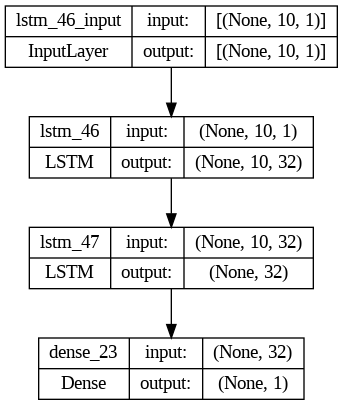

In [ ]:
# IN-DEPTH ANALYSIS BEST PERFORMING MODEL

# Model Visualization:

from keras.utils import plot_model

LSTM_Glob_CO2_best_model = load_model('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_CO2_best_model.h5')

plot_model(LSTM_Glob_CO2_best_model, to_file='LSTM_Glob_CO2_best_model_architecture.png', show_shapes=True, show_layer_names=True)



1/1 [==============================] - 1s 919ms/step
[[0.39695814]
 [0.39905968]
 [0.40123877]
 [0.40350226]
 [0.4058542 ]
 [0.40829447]
 [0.4108174 ]
 [0.4134143 ]
 [0.4160834 ]
 [0.41883576]
 [0.42165637]]


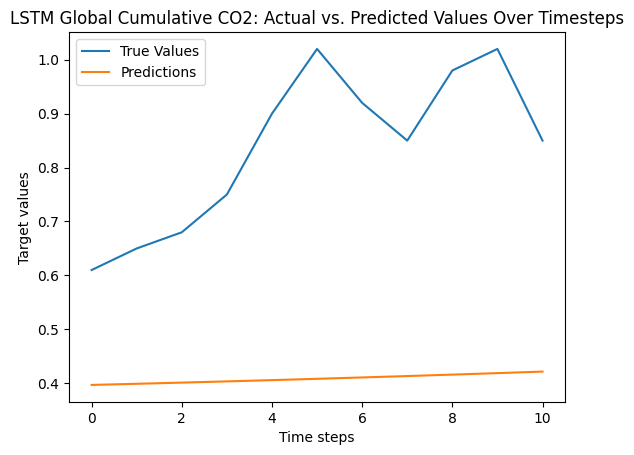

In [ ]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

class Config:
    SPLIT_YEAR = 2000
    BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_CO2_best_model.h5'
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_CO2_preprocessing_pipeline.pkl'
    PLOT_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Global_CO2_Predictions.png'

def load_and_preprocess_data():
    """Load and preprocess the data."""
    df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
    df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')
    df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
    df = df[['year', 'cumulative_co2', 'temp_change']].dropna(subset=['temp_change'])
    return df

def split_data(df):
    """Split data into training and testing sets."""
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return test_data

def preprocess_data_for_lstm(data, pipeline, n_steps):
    """Preprocess and reshape data for LSTM input."""
    X = data.drop(columns=['temp_change', 'year'])
    y = data['temp_change']

    # Apply pipeline on the features only
    X_preprocessed = pipeline.transform(X)

    # Reshape both X and y for LSTM
    X_lstm, y_lstm = [], []
    for i in range(len(X_preprocessed) - n_steps):
        X_lstm.append(X_preprocessed[i:i + n_steps])
        y_lstm.append(y.iloc[i + n_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Load data
df = load_and_preprocess_data()
test_data = split_data(df)

# Load preprocessing pipeline
pipeline = joblib.load(Config.PIPELINE_PATH)

# Preprocess and reshape data for LSTM
n_steps = 10  # Assuming the same number of steps you used for training
X_test_lstm, y_test_lstm = preprocess_data_for_lstm(test_data, pipeline, n_steps)

# Load the saved model
LSTM_Glob_CO2_best_model = load_model(Config.BEST_MODEL_PATH)

# Run predictions
predictions = LSTM_Glob_CO2_best_model.predict(X_test_lstm)

# If you want to see the results
print(predictions)

plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Global Cumulative CO2: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')

# Save the plot
plt.savefig(Config.PLOT_PATH)

plt.show()

##### Test with Batch size 1

In [5]:
# CURRENT

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = 'LSTM_Glob_CO2_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "LSTM_Glob_CO2_best_model.h5"
    RESULTS_PATH = 'LSTM_Glob_CO2_results.csv'
    MODEL_ARCH_PATH = 'LSTM_Glob_CO2_model_config.json'
    MODEL_WEIGHTS_PATH = 'LSTM_Glob_CO2_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = 'LSTM_Glob_CO2_library_versions.txt'

# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""
    # Load data
    df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
    df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

    # Merging and renaming columns
    df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
    df.replace(0, np.nan, inplace=True)

    # Preprocess data
    df = df[['year', 'cumulative_co2', 'temp_change']].dropna(subset=['temp_change'])
    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(train_data, test_data):
    """Preprocess the data."""
    # Split features and targets
    X_train = train_data.drop(columns=['temp_change', 'year'])
    y_train = train_data['temp_change']
    X_test = test_data.drop(columns=['temp_change', 'year'])
    y_test = test_data['temp_change']

    # Create and apply preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42, max_iter=10, initial_strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_test_preprocessed = pipeline.transform(X_test)

    # Save the preprocessing pipeline
    joblib.dump(pipeline, Config.PIPELINE_PATH)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test

def reshape_for_lstm(data, n_steps):
    """Reshape data for LSTM input."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps, -1])
    return np.array(X), np.array(y)

def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 1, 256, 16)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [1, 16, 32, 64])

    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data = split_data(df)
    X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)

    n_steps = 10
    train_data_combined = np.hstack((X_train, y_train.values.reshape(-1, 1)))
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_combined, n_steps)

    test_data_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_combined, n_steps)

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)

    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    # Results
    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'CO2',
        'R2 test': [r2_test],
        'MAE test': [mae_test],
        'MSE test': [mse_test],
        'RMSE test': [rmse_test],
        'Best Parameters': [str(study.best_params)]
    })

    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


[I 2023-10-24 06:31:35,421] A new study created in memory with name: no-name-ba99e64f-6fc5-4605-82b5-e3a392a6bc17
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [1, 256] and step=16, but the range is not divisible by `step`. It will be replaced by [1, 241].
  warnings.warn(


Training with parameters: units=225, activation=relu, batch_size=32
Training with parameters: units=225, activation=relu, batch_size=32


[I 2023-10-24 06:32:08,720] Trial 0 finished with value: 548.08048029989 and parameters: {'units': 225, 'activation': 'relu', 'batch_size': 32}. Best is trial 0 with value: 548.08048029989.


Training with parameters: units=225, activation=relu, batch_size=1
Training with parameters: units=225, activation=relu, batch_size=1


[I 2023-10-24 06:34:15,066] Trial 1 finished with value: 0.07115296460688114 and parameters: {'units': 225, 'activation': 'relu', 'batch_size': 1}. Best is trial 1 with value: 0.07115296460688114.


Training with parameters: units=97, activation=sigmoid, batch_size=1
Training with parameters: units=97, activation=sigmoid, batch_size=1


[I 2023-10-24 06:35:10,218] Trial 2 finished with value: 0.04837082698941231 and parameters: {'units': 97, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=17, activation=relu, batch_size=16
Training with parameters: units=17, activation=relu, batch_size=16


[I 2023-10-24 06:35:22,710] Trial 3 finished with value: 14181.495476743206 and parameters: {'units': 17, 'activation': 'relu', 'batch_size': 16}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=113, activation=tanh, batch_size=16
Training with parameters: units=113, activation=tanh, batch_size=16


[I 2023-10-24 06:35:35,815] Trial 4 finished with value: 0.051009463146328926 and parameters: {'units': 113, 'activation': 'tanh', 'batch_size': 16}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=193, activation=relu, batch_size=1
Training with parameters: units=193, activation=relu, batch_size=1


[I 2023-10-24 06:36:34,171] Trial 5 finished with value: 0.06414802931249142 and parameters: {'units': 193, 'activation': 'relu', 'batch_size': 1}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=193, activation=tanh, batch_size=32
Training with parameters: units=193, activation=tanh, batch_size=32


[I 2023-10-24 06:36:49,655] Trial 6 finished with value: 0.054374752566218376 and parameters: {'units': 193, 'activation': 'tanh', 'batch_size': 32}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=193, activation=relu, batch_size=32
Training with parameters: units=193, activation=relu, batch_size=32


[I 2023-10-24 06:37:06,292] Trial 7 finished with value: 0.11443468183279037 and parameters: {'units': 193, 'activation': 'relu', 'batch_size': 32}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=177, activation=sigmoid, batch_size=32
Training with parameters: units=177, activation=sigmoid, batch_size=32


[I 2023-10-24 06:37:17,110] Trial 8 finished with value: 0.11255523189902306 and parameters: {'units': 177, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=145, activation=relu, batch_size=32
Training with parameters: units=145, activation=relu, batch_size=32


[I 2023-10-24 06:37:30,136] Trial 9 finished with value: 0.5149951130151749 and parameters: {'units': 145, 'activation': 'relu', 'batch_size': 32}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=65, activation=sigmoid, batch_size=64
Training with parameters: units=65, activation=sigmoid, batch_size=64


[I 2023-10-24 06:37:35,002] Trial 10 finished with value: 0.09723406285047531 and parameters: {'units': 65, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 2 with value: 0.04837082698941231.


Training with parameters: units=97, activation=tanh, batch_size=16
Training with parameters: units=97, activation=tanh, batch_size=16


[I 2023-10-24 06:37:45,598] Trial 11 finished with value: 0.03874124679714441 and parameters: {'units': 97, 'activation': 'tanh', 'batch_size': 16}. Best is trial 11 with value: 0.03874124679714441.


Training with parameters: units=81, activation=sigmoid, batch_size=1
Training with parameters: units=81, activation=sigmoid, batch_size=1


[I 2023-10-24 06:38:19,876] Trial 12 finished with value: 0.06742063537240028 and parameters: {'units': 81, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 11 with value: 0.03874124679714441.


Training with parameters: units=49, activation=tanh, batch_size=16
Training with parameters: units=49, activation=tanh, batch_size=16


[I 2023-10-24 06:38:32,426] Trial 13 finished with value: 0.026126104407012463 and parameters: {'units': 49, 'activation': 'tanh', 'batch_size': 16}. Best is trial 13 with value: 0.026126104407012463.


Training with parameters: units=33, activation=tanh, batch_size=16
Training with parameters: units=33, activation=tanh, batch_size=16


[I 2023-10-24 06:38:41,218] Trial 14 finished with value: 0.0219423221424222 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 16}. Best is trial 14 with value: 0.0219423221424222.


Training with parameters: units=1, activation=tanh, batch_size=16
Training with parameters: units=1, activation=tanh, batch_size=16


[I 2023-10-24 06:38:57,184] Trial 15 finished with value: 0.10136280953884125 and parameters: {'units': 1, 'activation': 'tanh', 'batch_size': 16}. Best is trial 14 with value: 0.0219423221424222.


Training with parameters: units=49, activation=tanh, batch_size=16
Training with parameters: units=49, activation=tanh, batch_size=16


[I 2023-10-24 06:39:08,290] Trial 16 finished with value: 0.024681584909558296 and parameters: {'units': 49, 'activation': 'tanh', 'batch_size': 16}. Best is trial 14 with value: 0.0219423221424222.


Training with parameters: units=33, activation=tanh, batch_size=16
Training with parameters: units=33, activation=tanh, batch_size=16


[I 2023-10-24 06:39:20,378] Trial 17 finished with value: 0.020807404071092606 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=33, activation=tanh, batch_size=64
Training with parameters: units=33, activation=tanh, batch_size=64


[I 2023-10-24 06:39:29,820] Trial 18 finished with value: 0.028489519841969013 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 64}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=1, activation=tanh, batch_size=16
Training with parameters: units=1, activation=tanh, batch_size=16


[I 2023-10-24 06:39:42,575] Trial 19 finished with value: 0.07520966418087482 and parameters: {'units': 1, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=129, activation=tanh, batch_size=16
Training with parameters: units=129, activation=tanh, batch_size=16


[I 2023-10-24 06:39:54,931] Trial 20 finished with value: 0.04510699585080147 and parameters: {'units': 129, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=49, activation=tanh, batch_size=16
Training with parameters: units=49, activation=tanh, batch_size=16


[I 2023-10-24 06:40:06,608] Trial 21 finished with value: 0.0251205051317811 and parameters: {'units': 49, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=33, activation=tanh, batch_size=16
Training with parameters: units=33, activation=tanh, batch_size=16


[I 2023-10-24 06:40:19,682] Trial 22 finished with value: 0.02258054818958044 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=17, activation=tanh, batch_size=16
Training with parameters: units=17, activation=tanh, batch_size=16


[I 2023-10-24 06:40:30,850] Trial 23 finished with value: 0.025401899591088295 and parameters: {'units': 17, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=65, activation=tanh, batch_size=64
Training with parameters: units=65, activation=tanh, batch_size=64


[I 2023-10-24 06:40:39,636] Trial 24 finished with value: 0.025282750837504864 and parameters: {'units': 65, 'activation': 'tanh', 'batch_size': 64}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=33, activation=tanh, batch_size=16
Training with parameters: units=33, activation=tanh, batch_size=16


[I 2023-10-24 06:40:50,774] Trial 25 finished with value: 0.02483515441417694 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=17, activation=tanh, batch_size=16
Training with parameters: units=17, activation=tanh, batch_size=16


[I 2023-10-24 06:41:02,098] Trial 26 finished with value: 0.03344506956636906 and parameters: {'units': 17, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=81, activation=tanh, batch_size=16
Training with parameters: units=81, activation=tanh, batch_size=16


[I 2023-10-24 06:41:14,608] Trial 27 finished with value: 0.026198905892670155 and parameters: {'units': 81, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=33, activation=tanh, batch_size=16
Training with parameters: units=33, activation=tanh, batch_size=16


[I 2023-10-24 06:41:24,639] Trial 28 finished with value: 0.022635113447904587 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=1, activation=sigmoid, batch_size=64
Training with parameters: units=1, activation=sigmoid, batch_size=64


[I 2023-10-24 06:41:33,201] Trial 29 finished with value: 0.09173907339572906 and parameters: {'units': 1, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=65, activation=tanh, batch_size=16
Training with parameters: units=65, activation=tanh, batch_size=16


[I 2023-10-24 06:41:45,364] Trial 30 finished with value: 0.022935262881219387 and parameters: {'units': 65, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=33, activation=tanh, batch_size=16
Training with parameters: units=33, activation=tanh, batch_size=16


[I 2023-10-24 06:41:54,091] Trial 31 finished with value: 0.02322971634566784 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=33, activation=tanh, batch_size=16
Training with parameters: units=33, activation=tanh, batch_size=16


[I 2023-10-24 06:42:05,818] Trial 32 finished with value: 0.024175924248993397 and parameters: {'units': 33, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=49, activation=tanh, batch_size=16
Training with parameters: units=49, activation=tanh, batch_size=16


[I 2023-10-24 06:42:16,348] Trial 33 finished with value: 0.021494997665286064 and parameters: {'units': 49, 'activation': 'tanh', 'batch_size': 16}. Best is trial 17 with value: 0.020807404071092606.


Training with parameters: units=81, activation=tanh, batch_size=1
Training with parameters: units=81, activation=tanh, batch_size=1


[I 2023-10-24 06:42:49,211] Trial 34 finished with value: 0.01971647795289755 and parameters: {'units': 81, 'activation': 'tanh', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=97, activation=relu, batch_size=1
Training with parameters: units=97, activation=relu, batch_size=1


[I 2023-10-24 06:44:34,460] Trial 35 finished with value: 543.1911864131689 and parameters: {'units': 97, 'activation': 'relu', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=81, activation=tanh, batch_size=1
Training with parameters: units=81, activation=tanh, batch_size=1


[I 2023-10-24 06:45:40,492] Trial 36 finished with value: 0.12465677224099636 and parameters: {'units': 81, 'activation': 'tanh', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=113, activation=tanh, batch_size=1
Training with parameters: units=113, activation=tanh, batch_size=1


[I 2023-10-24 06:46:46,943] Trial 37 finished with value: 0.024162045679986477 and parameters: {'units': 113, 'activation': 'tanh', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=65, activation=relu, batch_size=1
Training with parameters: units=65, activation=relu, batch_size=1


[I 2023-10-24 06:47:21,636] Trial 38 finished with value: 0.05527946446090937 and parameters: {'units': 65, 'activation': 'relu', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=17, activation=sigmoid, batch_size=1
Training with parameters: units=17, activation=sigmoid, batch_size=1


[I 2023-10-24 06:47:41,897] Trial 39 finished with value: 0.03855366911739111 and parameters: {'units': 17, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=145, activation=tanh, batch_size=32
Training with parameters: units=145, activation=tanh, batch_size=32


[I 2023-10-24 06:47:54,215] Trial 40 finished with value: 0.047294579446315765 and parameters: {'units': 145, 'activation': 'tanh', 'batch_size': 32}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=49, activation=tanh, batch_size=16
Training with parameters: units=49, activation=tanh, batch_size=16


[I 2023-10-24 06:48:03,028] Trial 41 finished with value: 0.025049996562302113 and parameters: {'units': 49, 'activation': 'tanh', 'batch_size': 16}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=17, activation=tanh, batch_size=16
Training with parameters: units=17, activation=tanh, batch_size=16


[I 2023-10-24 06:48:14,375] Trial 42 finished with value: 0.027952944859862328 and parameters: {'units': 17, 'activation': 'tanh', 'batch_size': 16}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=49, activation=tanh, batch_size=1
Training with parameters: units=49, activation=tanh, batch_size=1


[I 2023-10-24 06:48:45,950] Trial 43 finished with value: 0.02590620145201683 and parameters: {'units': 49, 'activation': 'tanh', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=65, activation=relu, batch_size=16
Training with parameters: units=65, activation=relu, batch_size=16


[I 2023-10-24 06:49:04,723] Trial 44 finished with value: 3558.7713054167107 and parameters: {'units': 65, 'activation': 'relu', 'batch_size': 16}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=97, activation=tanh, batch_size=32
Training with parameters: units=97, activation=tanh, batch_size=32


[I 2023-10-24 06:49:14,645] Trial 45 finished with value: 0.03943735919892788 and parameters: {'units': 97, 'activation': 'tanh', 'batch_size': 32}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=81, activation=sigmoid, batch_size=16
Training with parameters: units=81, activation=sigmoid, batch_size=16


[I 2023-10-24 06:49:27,191] Trial 46 finished with value: 0.04735342413187027 and parameters: {'units': 81, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=17, activation=tanh, batch_size=1
Training with parameters: units=17, activation=tanh, batch_size=1


[I 2023-10-24 06:50:02,287] Trial 47 finished with value: 0.028989968821406364 and parameters: {'units': 17, 'activation': 'tanh', 'batch_size': 1}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=49, activation=tanh, batch_size=64
Training with parameters: units=49, activation=tanh, batch_size=64


[I 2023-10-24 06:50:11,267] Trial 48 finished with value: 0.021280581131577492 and parameters: {'units': 49, 'activation': 'tanh', 'batch_size': 64}. Best is trial 34 with value: 0.01971647795289755.


Training with parameters: units=241, activation=tanh, batch_size=64
Training with parameters: units=241, activation=tanh, batch_size=64


[I 2023-10-24 06:50:36,869] Trial 49 finished with value: 0.066423156298697 and parameters: {'units': 241, 'activation': 'tanh', 'batch_size': 64}. Best is trial 34 with value: 0.01971647795289755.


1/1 [==============================] - 1s 791ms/step
  Model   Scope Features  R2 test  MAE test  MSE test  RMSE test  \
0  LSTM  Global      CO2 -2.54776  0.232369  0.070081   0.264729   

                                     Best Parameters  
0  {'units': 81, 'activation': 'tanh', 'batch_siz...  


1/1 [==============================] - 0s 60ms/step
[[0.5767268 ]
 [0.58377975]
 [0.5905385 ]
 [0.5969648 ]
 [0.6030253 ]
 [0.6086897 ]
 [0.61393803]
 [0.6187758 ]
 [0.62322456]
 [0.62730175]
 [0.63097626]]


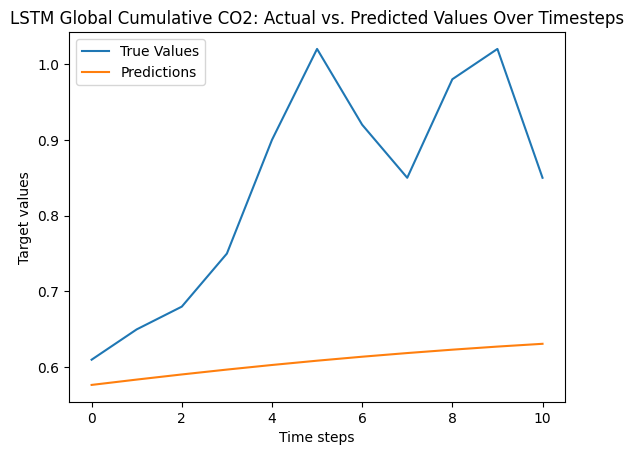

In [7]:
# Run predictions
predictions = best_model.predict(X_test_lstm)

# If you want to see the results
print(predictions)

plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Global Cumulative CO2: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')

# Save the plot
plt.savefig('LSTM_Glob_CO_bs1_prediction_plot.png')

plt.show()

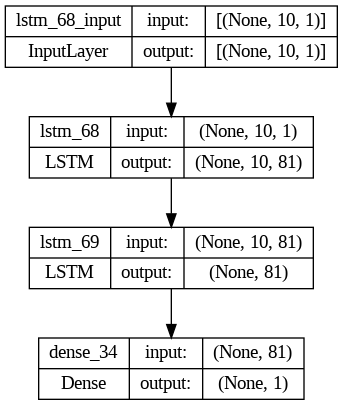

In [9]:
from keras.utils import plot_model

plot_model(best_model, to_file='LSTM_Glob_CO2_bs1_best_model_architecture.png', show_shapes=True, show_layer_names=True)

### 2.4.2 Global all features

In [ ]:
# CURRENT

# MODELING PIPELINE INCLUDING DATA PREPROCESSING, CLEANING, SPLIITING, FEATURE ENGINEERING, TRAINIGN AND HYPERPARAMETER OPTIMIZATION


import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = 'LSTM_Glob_all_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "LSTM_Glob_all_best_model.h5"
    RESULTS_PATH = 'LSTM_Glob_all_results.csv'
    MODEL_ARCH_PATH = 'LSTM_Glob_all_model_config.json'
    MODEL_WEIGHTS_PATH = 'LSTM_Glob_all_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = 'LSTM_Glob_all_library_versions.txt'


# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""
    # Load data
    df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
    df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

    # Merging and renaming columns
    df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
    df.replace(0, np.nan, inplace=True)

    # Selecting the required features
    features = ['year', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population', 'temp_change']
    df = df[features].dropna(subset=['temp_change'])
    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(train_data, test_data):
    """Preprocess the data."""
    # Split features and targets
    X_train = train_data.drop(columns=['temp_change', 'year'])
    y_train = train_data['temp_change']
    X_test = test_data.drop(columns=['temp_change', 'year'])
    y_test = test_data['temp_change']

    # Create and apply preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42, max_iter=10, initial_strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_test_preprocessed = pipeline.transform(X_test)

    # Save the preprocessing pipeline
    joblib.dump(pipeline, Config.PIPELINE_PATH)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test

def reshape_for_lstm(data, n_steps):
    """Reshape data for LSTM input."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps, -1])
    return np.array(X), np.array(y)

def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 32, 256, 32)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data = split_data(df)
    X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)

    n_steps = 10
    train_data_combined = np.hstack((X_train, y_train.values.reshape(-1, 1)))
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_combined, n_steps)

    test_data_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_combined, n_steps)

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)


    r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test,
        'Best Parameters': [str(study.best_params)]
    })


    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


[I 2023-10-11 06:02:50,472] A new study created in memory with name: no-name-068447ef-944f-4831-9d26-20a122df8d7b


Training with parameters: units=32, activation=tanh, batch_size=16
Training with parameters: units=32, activation=tanh, batch_size=16


[I 2023-10-11 06:03:11,394] Trial 0 finished with value: 0.07690582424402237 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 16}. Best is trial 0 with value: 0.07690582424402237.


Training with parameters: units=256, activation=tanh, batch_size=16
Training with parameters: units=256, activation=tanh, batch_size=16


[I 2023-10-11 06:03:52,583] Trial 1 finished with value: 0.028165411669760942 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 16}. Best is trial 1 with value: 0.028165411669760942.


Training with parameters: units=224, activation=sigmoid, batch_size=16
Training with parameters: units=224, activation=sigmoid, batch_size=16


[I 2023-10-11 06:04:27,049] Trial 2 finished with value: 0.03592565841972828 and parameters: {'units': 224, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 1 with value: 0.028165411669760942.


Training with parameters: units=192, activation=sigmoid, batch_size=64
Training with parameters: units=192, activation=sigmoid, batch_size=64


[I 2023-10-11 06:04:43,232] Trial 3 finished with value: 0.018389410339295864 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=32, activation=tanh, batch_size=16
Training with parameters: units=32, activation=tanh, batch_size=16


[I 2023-10-11 06:04:56,725] Trial 4 finished with value: 0.05073627084493637 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=96, activation=sigmoid, batch_size=64
Training with parameters: units=96, activation=sigmoid, batch_size=64


[I 2023-10-11 06:05:07,769] Trial 5 finished with value: 0.029385383240878582 and parameters: {'units': 96, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=relu, batch_size=64
Training with parameters: units=160, activation=relu, batch_size=64


[I 2023-10-11 06:05:32,640] Trial 6 finished with value: 17.399285344406962 and parameters: {'units': 160, 'activation': 'relu', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=128, activation=relu, batch_size=32
Training with parameters: units=128, activation=relu, batch_size=32


[I 2023-10-11 06:05:48,886] Trial 7 finished with value: 67324.15785649791 and parameters: {'units': 128, 'activation': 'relu', 'batch_size': 32}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=96, activation=relu, batch_size=64
Training with parameters: units=96, activation=relu, batch_size=64


[I 2023-10-11 06:05:59,585] Trial 8 finished with value: 0.18950214702636003 and parameters: {'units': 96, 'activation': 'relu', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=relu, batch_size=64
Training with parameters: units=192, activation=relu, batch_size=64


[I 2023-10-11 06:06:15,828] Trial 9 finished with value: 0.11237199231982231 and parameters: {'units': 192, 'activation': 'relu', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=256, activation=sigmoid, batch_size=32
Training with parameters: units=256, activation=sigmoid, batch_size=32


[I 2023-10-11 06:06:50,395] Trial 10 finished with value: 0.032503336668014526 and parameters: {'units': 256, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=256, activation=tanh, batch_size=16
Training with parameters: units=256, activation=tanh, batch_size=16


[I 2023-10-11 06:07:24,069] Trial 11 finished with value: 0.02909054048359394 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=sigmoid, batch_size=64
Training with parameters: units=192, activation=sigmoid, batch_size=64


[I 2023-10-11 06:07:35,507] Trial 12 finished with value: 0.08384807407855988 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-11 06:08:04,432] Trial 13 finished with value: 0.023767272010445595 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=sigmoid, batch_size=32
Training with parameters: units=192, activation=sigmoid, batch_size=32


[I 2023-10-11 06:08:23,601] Trial 14 finished with value: 0.04702681489288807 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=224, activation=tanh, batch_size=64
Training with parameters: units=224, activation=tanh, batch_size=64


[I 2023-10-11 06:08:51,901] Trial 15 finished with value: 0.027248267084360123 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:09:11,087] Trial 16 finished with value: 0.023452360183000565 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=128, activation=sigmoid, batch_size=16
Training with parameters: units=128, activation=sigmoid, batch_size=16


[I 2023-10-11 06:09:26,613] Trial 17 finished with value: 0.04013700317591429 and parameters: {'units': 128, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=sigmoid, batch_size=64
Training with parameters: units=160, activation=sigmoid, batch_size=64


[I 2023-10-11 06:09:53,250] Trial 18 finished with value: 0.06487358454614878 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=96, activation=tanh, batch_size=32
Training with parameters: units=96, activation=tanh, batch_size=32


[I 2023-10-11 06:10:15,744] Trial 19 finished with value: 0.06765947118401527 and parameters: {'units': 96, 'activation': 'tanh', 'batch_size': 32}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=sigmoid, batch_size=64
Training with parameters: units=160, activation=sigmoid, batch_size=64


[I 2023-10-11 06:10:44,285] Trial 20 finished with value: 0.21298385877162218 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-11 06:11:17,515] Trial 21 finished with value: 0.03373296372592449 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=tanh, batch_size=16
Training with parameters: units=192, activation=tanh, batch_size=16


[I 2023-10-11 06:11:41,234] Trial 22 finished with value: 0.02713703829795122 and parameters: {'units': 192, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-11 06:12:04,930] Trial 23 finished with value: 0.0300788888707757 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:12:20,621] Trial 24 finished with value: 0.030576536431908607 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=tanh, batch_size=16
Training with parameters: units=192, activation=tanh, batch_size=16


[I 2023-10-11 06:12:43,539] Trial 25 finished with value: 0.030570384114980698 and parameters: {'units': 192, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=128, activation=tanh, batch_size=16
Training with parameters: units=128, activation=tanh, batch_size=16


[I 2023-10-11 06:12:59,197] Trial 26 finished with value: 0.05436041206121445 and parameters: {'units': 128, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-11 06:13:16,247] Trial 27 finished with value: 0.02903100848197937 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=relu, batch_size=32
Training with parameters: units=192, activation=relu, batch_size=32


[I 2023-10-11 06:13:49,652] Trial 28 finished with value: 7996.856586031616 and parameters: {'units': 192, 'activation': 'relu', 'batch_size': 32}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=64, activation=sigmoid, batch_size=64
Training with parameters: units=64, activation=sigmoid, batch_size=64


[I 2023-10-11 06:13:56,852] Trial 29 finished with value: 0.07827707752585411 and parameters: {'units': 64, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:14:22,847] Trial 30 finished with value: 0.042125675827264786 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=tanh, batch_size=16
Training with parameters: units=192, activation=tanh, batch_size=16


[I 2023-10-11 06:14:37,434] Trial 31 finished with value: 0.032596942968666553 and parameters: {'units': 192, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-11 06:15:03,263] Trial 32 finished with value: 0.032584242057055235 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=tanh, batch_size=16
Training with parameters: units=192, activation=tanh, batch_size=16


[I 2023-10-11 06:15:28,625] Trial 33 finished with value: 0.047014955431222916 and parameters: {'units': 192, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=256, activation=tanh, batch_size=16
Training with parameters: units=256, activation=tanh, batch_size=16


[I 2023-10-11 06:16:21,022] Trial 34 finished with value: 0.027983817271888256 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-11 06:16:48,278] Trial 35 finished with value: 0.02963200956583023 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:17:06,254] Trial 36 finished with value: 0.02396109141409397 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=128, activation=sigmoid, batch_size=16
Training with parameters: units=128, activation=sigmoid, batch_size=16


[I 2023-10-11 06:17:21,303] Trial 37 finished with value: 0.05505853611975908 and parameters: {'units': 128, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=64
Training with parameters: units=160, activation=tanh, batch_size=64


[I 2023-10-11 06:17:41,288] Trial 38 finished with value: 0.036707803606987 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=128, activation=relu, batch_size=16
Training with parameters: units=128, activation=relu, batch_size=16


[I 2023-10-11 06:17:59,406] Trial 39 finished with value: 1269.0517429020256 and parameters: {'units': 128, 'activation': 'relu', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=32, activation=sigmoid, batch_size=64
Training with parameters: units=32, activation=sigmoid, batch_size=64


[I 2023-10-11 06:18:06,951] Trial 40 finished with value: 0.06623167917132378 and parameters: {'units': 32, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:18:21,975] Trial 41 finished with value: 0.021454105153679848 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:18:41,473] Trial 42 finished with value: 0.025281431153416634 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:19:05,096] Trial 43 finished with value: 0.15810421109199524 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=128, activation=tanh, batch_size=16
Training with parameters: units=128, activation=tanh, batch_size=16


[I 2023-10-11 06:19:18,591] Trial 44 finished with value: 0.09415906108915806 and parameters: {'units': 128, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=96, activation=relu, batch_size=32
Training with parameters: units=96, activation=relu, batch_size=32


[I 2023-10-11 06:19:31,898] Trial 45 finished with value: 14.449920808896422 and parameters: {'units': 96, 'activation': 'relu', 'batch_size': 32}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=tanh, batch_size=16
Training with parameters: units=192, activation=tanh, batch_size=16


[I 2023-10-11 06:20:03,506] Trial 46 finished with value: 0.031892004422843456 and parameters: {'units': 192, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=256, activation=sigmoid, batch_size=64
Training with parameters: units=256, activation=sigmoid, batch_size=64


[I 2023-10-11 06:20:18,193] Trial 47 finished with value: 0.18490783870220184 and parameters: {'units': 256, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=160, activation=tanh, batch_size=16
Training with parameters: units=160, activation=tanh, batch_size=16


[I 2023-10-11 06:20:55,401] Trial 48 finished with value: 0.06884821318089962 and parameters: {'units': 160, 'activation': 'tanh', 'batch_size': 16}. Best is trial 3 with value: 0.018389410339295864.


Training with parameters: units=192, activation=relu, batch_size=64
Training with parameters: units=192, activation=relu, batch_size=64


[I 2023-10-11 06:21:07,678] Trial 49 finished with value: 0.17788739874958992 and parameters: {'units': 192, 'activation': 'relu', 'batch_size': 64}. Best is trial 3 with value: 0.018389410339295864.


1/1 [==============================] - 0s 36ms/step
  Model   Scope Features  R2 train   R2 test  MAE train  MAE test  MSE train  \
0  LSTM  Global      all  0.749003 -1.754908   0.097566  0.202266   0.014475   

   MSE test  RMSE train  RMSE test  \
0   0.05442    0.120311    0.23328   

                                     Best Parameters  
0  {'units': 192, 'activation': 'sigmoid', 'batch...  


In [ ]:
# # IN-DEPTH ANALYSIS BEST PERFORMING MODEL

# # Model Visualization:

# from keras.utils import plot_model

# LSTM_Global_all_best_model = load_model('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all/LSTM_Glob_all_best_model.h5')

# plot_model(LSTM_Global_all_best_model, to_file='/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all/LSTM_Glob_all_best_model_architecture.png', show_shapes=True, show_layer_names=True)



1/1 [==============================] - 1s 674ms/step
[[0.5829976 ]
 [0.59450316]
 [0.6058483 ]
 [0.6169598 ]
 [0.6278659 ]
 [0.6384678 ]
 [0.6486338 ]
 [0.6584739 ]
 [0.66803354]
 [0.67730355]
 [0.68598866]]


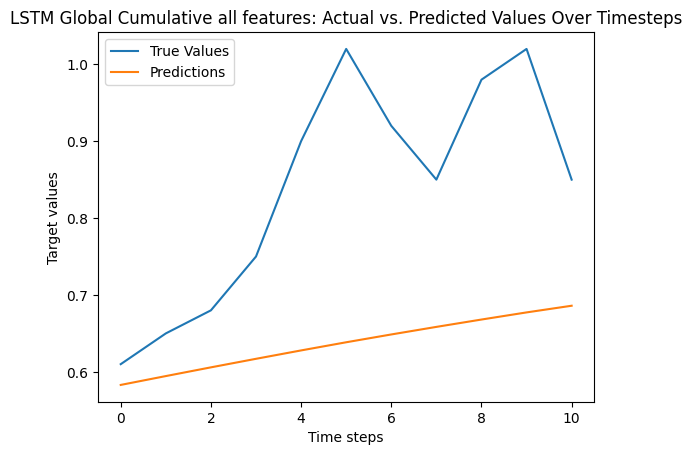

In [ ]:
# IN-DEPTH ANALYSIS BEST MODEL

# Model Visualization:

import pandas as pd
import joblib
from tensorflow.keras.models import load_model

class Config:
    SPLIT_YEAR = 2000
    BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all_best_model.h5'
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all_preprocessing_pipeline.pkl'
    PLOT_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Global_all_Predictions.png'

def load_and_preprocess_data():
    """Load and preprocess the data."""
    # Load data
    df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
    df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

    # Merging and renaming columns
    df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
    df.replace(0, np.nan, inplace=True)

    # Selecting the required features
    features = ['year', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population', 'temp_change']
    df = df[features].dropna(subset=['temp_change'])
    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data


def preprocess_data_for_lstm(data, pipeline, n_steps):
    """Preprocess and reshape data for LSTM input."""
    X = data.drop(columns=['temp_change', 'year'])
    y = data['temp_change']

    # Apply pipeline on the features only
    X_preprocessed = pipeline.transform(X)

    # Reshape both X and y for LSTM
    X_lstm, y_lstm = [], []
    for i in range(len(X_preprocessed) - n_steps):
        X_lstm.append(X_preprocessed[i:i + n_steps])
        y_lstm.append(y.iloc[i + n_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Load data
df = load_and_preprocess_data()
train_data, test_data = split_data(df)


# Load preprocessing pipeline
pipeline = joblib.load(Config.PIPELINE_PATH)

# Preprocess and reshape data for LSTM for both train and test
n_steps = 10
X_train_lstm, y_train_lstm = preprocess_data_for_lstm(train_data, pipeline, n_steps)
X_test_lstm, y_test_lstm = preprocess_data_for_lstm(test_data, pipeline, n_steps)


# Load the saved model
LSTM_Glob_all_best_model = load_model(Config.BEST_MODEL_PATH)

# Run predictions
predictions = LSTM_Glob_all_best_model.predict(X_test_lstm)

# If you want to see the results
print(predictions)

plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Global Cumulative all features: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')

# Save the plot
plt.savefig(Config.PLOT_PATH)

plt.show()

4/4 [==============================] - 0s 34ms/step


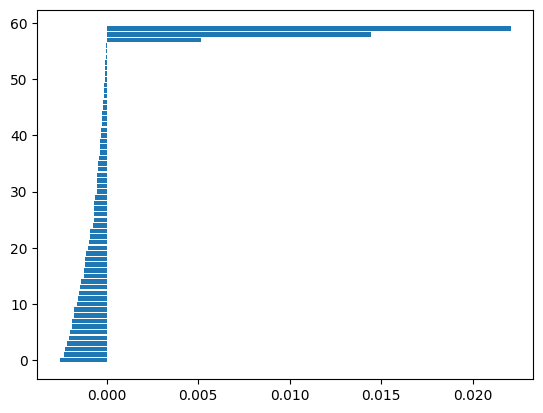

In [ ]:
# COMPUTE FEATURE IMPORTANCES WITH PERMUTATION IMPORTANCE APPROACH

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance

# Flatten LSTM input data for more straight-forward interpretability
X_train_flat = X_train_lstm.reshape(X_train_lstm.shape[0], -1)

# Create a wrapper class around our LSTM model that adheres to the scikit-learn estimator interface.
# Reason: The permutation_importance function from scikit-learn expects an estimator object that implements the fit method
class LSTMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model, n_steps):
        self.model = model
        self.n_steps = n_steps

    def fit(self, X, y):
        # We won't use the fit method since our model is already trained.
        pass

    def predict(self, X):
        X_reshaped = X.reshape(X.shape[0], self.n_steps, -1)
        return self.model.predict(X_reshaped).flatten()

# Instantiate the wrapper
lstm_wrapper = LSTMWrapper(LSTM_Glob_all_best_model, n_steps)

# Use permutation_importance with our wrapper
result = permutation_importance(lstm_wrapper, X_train_flat, y_train_lstm, n_repeats=30)
sorted_idx = result.importances_mean.argsort()

# Save results object
import pickle

with open('LSTM_Glob_all_best_model_permutation_importance_result.pkl', 'wb') as f:
    pickle.dump(result, f)

# Save importances to DataFrame
importances_df = pd.DataFrame({
    'feature': range(X_train_flat.shape[1]),
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# Save to CSV
importances_df.to_csv('LSTM_Glob_all_best_model_feature_importances.csv', index=False)

# Plot the importances, save the image
plt.barh(range(X_train_flat.shape[1]), result.importances_mean[sorted_idx])
plt.savefig('LSTM_Glob_all_best_model_feature_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


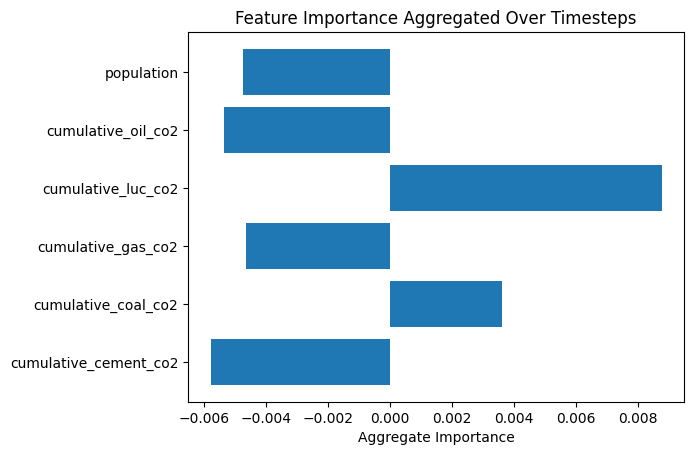

In [ ]:
# AGGREGATE FEATURE IMPORTANCE SCORES ACROSS TIMESTEPS

importance_aggregated = np.zeros(6)

# Aggregate every 6th importance value
for i in range(6):
    importance_aggregated[i] = np.sum(result.importances_mean[i::6])

# Plotting the aggregated importances
features = ['cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population']  # Replace with your actual feature names

# Create a DataFrame with the feature names and their aggregated importance scores
importance_aggregated_df = pd.DataFrame({
    'feature': features,
    'importance_aggregated': importance_aggregated
})

# Save the DataFrame to a CSV file
importance_aggregated_df.to_csv('LSTM_Glob_all_best_model_aggregated_importances.csv', index=False)


plt.barh(features, importance_aggregated)
plt.xlabel('Aggregate Importance')
plt.title('Feature Importance Aggregated Over Timesteps')
plt.savefig('LSTM_Glob_all_best_model_aggregated_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
# # SHAP test

# # !pip install shap

# import shap
# import pandas as pd
# import joblib
# from tensorflow.keras.models import load_model
# # import tensorflow
# # # tensorflow.compat.v1.disable_v2_behavior() # <-- HERE !


# class Config:
#     SPLIT_YEAR = 2000
#     BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all_best_model.h5'
#     PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all_preprocessing_pipeline.pkl'
#     PLOT_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Global_all_SHAP_Beeswarm.png'

# def load_and_preprocess_data():
#     """Load and preprocess the data."""
#     # Load data
#     df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
#     df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

#     # Merging and renaming columns
#     df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
#     df.replace(0, np.nan, inplace=True)

#     # Selecting the required features
#     features = ['year', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
#                 'cumulative_luc_co2', 'cumulative_oil_co2', 'population', 'temp_change']
#     df = df[features].dropna(subset=['temp_change'])
#     return df

# def split_data(df):
#     """Split data into training and testing sets."""
#     train_data = df[df['year'] <= Config.SPLIT_YEAR]
#     test_data = df[df['year'] > Config.SPLIT_YEAR]
#     return train_data, test_data


# def preprocess_data_for_lstm(data, pipeline, n_steps):
#     """Preprocess and reshape data for LSTM input."""
#     X = data.drop(columns=['temp_change', 'year'])
#     y = data['temp_change']

#     # Apply pipeline on the features only
#     X_preprocessed = pipeline.transform(X)

#     # Reshape both X and y for LSTM
#     X_lstm, y_lstm = [], []
#     for i in range(len(X_preprocessed) - n_steps):
#         X_lstm.append(X_preprocessed[i:i + n_steps])
#         y_lstm.append(y.iloc[i + n_steps])
#     return np.array(X_lstm), np.array(y_lstm)

# # Load data
# df = load_and_preprocess_data()
# train_data, test_data = split_data(df)


# # Load preprocessing pipeline
# pipeline = joblib.load(Config.PIPELINE_PATH)

# # Preprocess and reshape data for LSTM for both train and test
# n_steps = 10
# X_train_lstm, y_train_lstm = preprocess_data_for_lstm(train_data, pipeline, n_steps)
# X_test_lstm, y_test_lstm = preprocess_data_for_lstm(test_data, pipeline, n_steps)


# # Load the saved model
# LSTM_Glob_all_best_model = load_model(Config.BEST_MODEL_PATH)

# # Use DeepExplainer to compute SHAP values
# background_data = X_train_lstm[np.random.choice(X_train_lstm.shape[0], 100, replace=False)]  # using 100 samples as background data
# # explainer = shap.DeepExplainer(LSTM_Glob_all_best_model, background_data)
# # shap_values = explainer.shap_values(X_test_lstm)

# explainer = shap.GradientExplainer(LSTM_Glob_all_best_model, background_data)
# shap_values = explainer.shap_values(X_test_lstm)



# # Plot SHAP values using beeswarm plot

# # Average over the sequence length for features to be compatible with SHAP plot
# X_test_lstm_avg = X_test_lstm.mean(axis=1)

# shap.summary_plot(shap_values, X_test_lstm_avg, plot_type="bar")


# # shap.summary_plot(shap_values[0], X_test_lstm, plot_type="dot")

# # Save the plot
# plt.tight_layout()
# plt.savefig(CONFIG.PLOT_PATH, bbox_inches='tight')

#### batch size 1

In [10]:
# CURRENT

# MODELING PIPELINE INCLUDING DATA PREPROCESSING, CLEANING, SPLIITING, FEATURE ENGINEERING, TRAINIGN AND HYPERPARAMETER OPTIMIZATION


import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = 'LSTM_Glob_all_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "LSTM_Glob_all_best_model.h5"
    RESULTS_PATH = 'LSTM_Glob_all_results.csv'
    MODEL_ARCH_PATH = 'LSTM_Glob_all_model_config.json'
    MODEL_WEIGHTS_PATH = 'LSTM_Glob_all_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = 'LSTM_Glob_all_library_versions.txt'


# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""
    # Load data
    df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
    df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

    # Merging and renaming columns
    df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
    df.replace(0, np.nan, inplace=True)

    # Selecting the required features
    features = ['year', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population', 'temp_change']
    df = df[features].dropna(subset=['temp_change'])
    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(train_data, test_data):
    """Preprocess the data."""
    # Split features and targets
    X_train = train_data.drop(columns=['temp_change', 'year'])
    y_train = train_data['temp_change']
    X_test = test_data.drop(columns=['temp_change', 'year'])
    y_test = test_data['temp_change']

    # Create and apply preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42, max_iter=10, initial_strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_test_preprocessed = pipeline.transform(X_test)

    # Save the preprocessing pipeline
    joblib.dump(pipeline, Config.PIPELINE_PATH)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test

def reshape_for_lstm(data, n_steps):
    """Reshape data for LSTM input."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps, -1])
    return np.array(X), np.array(y)

def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 1, 256, 16)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [1, 16, 32, 64])

    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data = split_data(df)
    X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)

    n_steps = 10
    train_data_combined = np.hstack((X_train, y_train.values.reshape(-1, 1)))
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_combined, n_steps)

    test_data_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_combined, n_steps)

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)


    r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test,
        'Best Parameters': [str(study.best_params)]
    })


    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


[I 2023-10-24 06:59:03,781] A new study created in memory with name: no-name-3b2f1c5b-a8d6-43f9-9306-ee8d0db37264
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [1, 256] and step=16, but the range is not divisible by `step`. It will be replaced by [1, 241].
  warnings.warn(


Training with parameters: units=209, activation=relu, batch_size=64
Training with parameters: units=209, activation=relu, batch_size=64


[I 2023-10-24 06:59:29,331] Trial 0 finished with value: 0.1256431438960135 and parameters: {'units': 209, 'activation': 'relu', 'batch_size': 64}. Best is trial 0 with value: 0.1256431438960135.


Training with parameters: units=81, activation=tanh, batch_size=1
Training with parameters: units=81, activation=tanh, batch_size=1


[I 2023-10-24 07:00:26,728] Trial 1 finished with value: 0.05509195476770401 and parameters: {'units': 81, 'activation': 'tanh', 'batch_size': 1}. Best is trial 1 with value: 0.05509195476770401.


Training with parameters: units=65, activation=relu, batch_size=32
Training with parameters: units=65, activation=relu, batch_size=32


[I 2023-10-24 07:00:40,304] Trial 2 finished with value: 42448.110872246325 and parameters: {'units': 65, 'activation': 'relu', 'batch_size': 32}. Best is trial 1 with value: 0.05509195476770401.


Training with parameters: units=145, activation=tanh, batch_size=64
Training with parameters: units=145, activation=tanh, batch_size=64


[I 2023-10-24 07:00:54,023] Trial 3 finished with value: 0.024876343086361885 and parameters: {'units': 145, 'activation': 'tanh', 'batch_size': 64}. Best is trial 3 with value: 0.024876343086361885.


Training with parameters: units=145, activation=relu, batch_size=64
Training with parameters: units=145, activation=relu, batch_size=64


[I 2023-10-24 07:01:06,193] Trial 4 finished with value: 0.3386700605042279 and parameters: {'units': 145, 'activation': 'relu', 'batch_size': 64}. Best is trial 3 with value: 0.024876343086361885.


Training with parameters: units=193, activation=tanh, batch_size=32
Training with parameters: units=193, activation=tanh, batch_size=32


[I 2023-10-24 07:01:23,888] Trial 5 finished with value: 0.03710933681577444 and parameters: {'units': 193, 'activation': 'tanh', 'batch_size': 32}. Best is trial 3 with value: 0.024876343086361885.


Training with parameters: units=177, activation=tanh, batch_size=32
Training with parameters: units=177, activation=tanh, batch_size=32


[I 2023-10-24 07:01:45,384] Trial 6 finished with value: 0.026044840924441814 and parameters: {'units': 177, 'activation': 'tanh', 'batch_size': 32}. Best is trial 3 with value: 0.024876343086361885.


Training with parameters: units=193, activation=sigmoid, batch_size=32
Training with parameters: units=193, activation=sigmoid, batch_size=32


[I 2023-10-24 07:02:01,544] Trial 7 finished with value: 0.019509468227624893 and parameters: {'units': 193, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=33, activation=sigmoid, batch_size=32
Training with parameters: units=33, activation=sigmoid, batch_size=32


[I 2023-10-24 07:02:10,798] Trial 8 finished with value: 0.03674501273781061 and parameters: {'units': 33, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=65, activation=relu, batch_size=16
Training with parameters: units=65, activation=relu, batch_size=16


[I 2023-10-24 07:02:21,438] Trial 9 finished with value: 9618.288059867918 and parameters: {'units': 65, 'activation': 'relu', 'batch_size': 16}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=241, activation=sigmoid, batch_size=16
Training with parameters: units=241, activation=sigmoid, batch_size=16


[I 2023-10-24 07:02:56,172] Trial 10 finished with value: 0.04619535617530346 and parameters: {'units': 241, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=129, activation=sigmoid, batch_size=64
Training with parameters: units=129, activation=sigmoid, batch_size=64


[I 2023-10-24 07:03:06,192] Trial 11 finished with value: 0.020761569030582905 and parameters: {'units': 129, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=129, activation=sigmoid, batch_size=1
Training with parameters: units=129, activation=sigmoid, batch_size=1


[I 2023-10-24 07:04:51,994] Trial 12 finished with value: 0.09253668412566185 and parameters: {'units': 129, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=241, activation=sigmoid, batch_size=64
Training with parameters: units=241, activation=sigmoid, batch_size=64


[I 2023-10-24 07:05:12,104] Trial 13 finished with value: 0.06994048226624727 and parameters: {'units': 241, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=97, activation=sigmoid, batch_size=32
Training with parameters: units=97, activation=sigmoid, batch_size=32


[I 2023-10-24 07:05:18,622] Trial 14 finished with value: 0.069341947324574 and parameters: {'units': 97, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=1, activation=sigmoid, batch_size=64
Training with parameters: units=1, activation=sigmoid, batch_size=64


[I 2023-10-24 07:05:26,412] Trial 15 finished with value: 0.13700706884264946 and parameters: {'units': 1, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=161, activation=sigmoid, batch_size=16
Training with parameters: units=161, activation=sigmoid, batch_size=16


[I 2023-10-24 07:05:39,722] Trial 16 finished with value: 0.047668904066085815 and parameters: {'units': 161, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=193, activation=sigmoid, batch_size=1
Training with parameters: units=193, activation=sigmoid, batch_size=1


[I 2023-10-24 07:06:37,421] Trial 17 finished with value: 0.0527460677549243 and parameters: {'units': 193, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=113, activation=sigmoid, batch_size=64
Training with parameters: units=113, activation=sigmoid, batch_size=64


[I 2023-10-24 07:06:48,790] Trial 18 finished with value: 0.03291644714772701 and parameters: {'units': 113, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=225, activation=sigmoid, batch_size=32
Training with parameters: units=225, activation=sigmoid, batch_size=32


[I 2023-10-24 07:07:04,956] Trial 19 finished with value: 0.05194901954382658 and parameters: {'units': 225, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=161, activation=sigmoid, batch_size=32
Training with parameters: units=161, activation=sigmoid, batch_size=32


[I 2023-10-24 07:07:20,242] Trial 20 finished with value: 0.03333736024796963 and parameters: {'units': 161, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=129, activation=tanh, batch_size=64
Training with parameters: units=129, activation=tanh, batch_size=64


[I 2023-10-24 07:07:32,091] Trial 21 finished with value: 0.03698557987809181 and parameters: {'units': 129, 'activation': 'tanh', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=161, activation=tanh, batch_size=64
Training with parameters: units=161, activation=tanh, batch_size=64


[I 2023-10-24 07:07:50,224] Trial 22 finished with value: 0.025750501547008753 and parameters: {'units': 161, 'activation': 'tanh', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=113, activation=tanh, batch_size=64
Training with parameters: units=113, activation=tanh, batch_size=64


[I 2023-10-24 07:08:09,570] Trial 23 finished with value: 0.02845602110028267 and parameters: {'units': 113, 'activation': 'tanh', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=193, activation=tanh, batch_size=64
Training with parameters: units=193, activation=tanh, batch_size=64


[I 2023-10-24 07:08:28,987] Trial 24 finished with value: 0.027010774239897728 and parameters: {'units': 193, 'activation': 'tanh', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=145, activation=tanh, batch_size=64
Training with parameters: units=145, activation=tanh, batch_size=64


[I 2023-10-24 07:08:41,357] Trial 25 finished with value: 0.02762640081346035 and parameters: {'units': 145, 'activation': 'tanh', 'batch_size': 64}. Best is trial 7 with value: 0.019509468227624893.


Training with parameters: units=177, activation=sigmoid, batch_size=1
Training with parameters: units=177, activation=sigmoid, batch_size=1


[I 2023-10-24 07:09:34,439] Trial 26 finished with value: 0.019309435039758682 and parameters: {'units': 177, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 26 with value: 0.019309435039758682.


Training with parameters: units=209, activation=sigmoid, batch_size=1
Training with parameters: units=209, activation=sigmoid, batch_size=1


[I 2023-10-24 07:10:46,168] Trial 27 finished with value: 0.017345745116472244 and parameters: {'units': 209, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=209, activation=sigmoid, batch_size=1
Training with parameters: units=209, activation=sigmoid, batch_size=1


[I 2023-10-24 07:12:31,337] Trial 28 finished with value: 0.03419708181172609 and parameters: {'units': 209, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=209, activation=relu, batch_size=1
Training with parameters: units=209, activation=relu, batch_size=1


[I 2023-10-24 07:15:26,834] Trial 29 finished with value: 0.11420569568872452 and parameters: {'units': 209, 'activation': 'relu', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=225, activation=sigmoid, batch_size=1
Training with parameters: units=225, activation=sigmoid, batch_size=1


[I 2023-10-24 07:17:16,032] Trial 30 finished with value: 0.10714065097272396 and parameters: {'units': 225, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=177, activation=sigmoid, batch_size=1
Training with parameters: units=177, activation=sigmoid, batch_size=1


[I 2023-10-24 07:18:11,577] Trial 31 finished with value: 0.10167753882706165 and parameters: {'units': 177, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=177, activation=sigmoid, batch_size=1
Training with parameters: units=177, activation=sigmoid, batch_size=1


[I 2023-10-24 07:19:36,228] Trial 32 finished with value: 0.08341490663588047 and parameters: {'units': 177, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=225, activation=sigmoid, batch_size=1
Training with parameters: units=225, activation=sigmoid, batch_size=1


[I 2023-10-24 07:21:21,396] Trial 33 finished with value: 0.06097141280770302 and parameters: {'units': 225, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=193, activation=sigmoid, batch_size=1
Training with parameters: units=193, activation=sigmoid, batch_size=1


[I 2023-10-24 07:24:06,601] Trial 34 finished with value: 0.09817984700202942 and parameters: {'units': 193, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=209, activation=relu, batch_size=1
Training with parameters: units=209, activation=relu, batch_size=1


[I 2023-10-24 07:25:18,060] Trial 35 finished with value: 0.0750905480235815 and parameters: {'units': 209, 'activation': 'relu', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=97, activation=sigmoid, batch_size=32
Training with parameters: units=97, activation=sigmoid, batch_size=32


[I 2023-10-24 07:25:27,829] Trial 36 finished with value: 0.051615762524306774 and parameters: {'units': 97, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=145, activation=sigmoid, batch_size=16
Training with parameters: units=145, activation=sigmoid, batch_size=16


[I 2023-10-24 07:25:40,341] Trial 37 finished with value: 0.03260983573272824 and parameters: {'units': 145, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=177, activation=sigmoid, batch_size=32
Training with parameters: units=177, activation=sigmoid, batch_size=32


[I 2023-10-24 07:25:58,299] Trial 38 finished with value: 0.06630932074040174 and parameters: {'units': 177, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=161, activation=relu, batch_size=1
Training with parameters: units=161, activation=relu, batch_size=1


[I 2023-10-24 07:27:44,535] Trial 39 finished with value: 0.07089889794588089 and parameters: {'units': 161, 'activation': 'relu', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=65, activation=sigmoid, batch_size=32
Training with parameters: units=65, activation=sigmoid, batch_size=32


[I 2023-10-24 07:27:51,667] Trial 40 finished with value: 0.030577737372368574 and parameters: {'units': 65, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=145, activation=tanh, batch_size=64
Training with parameters: units=145, activation=tanh, batch_size=64


[I 2023-10-24 07:28:10,573] Trial 41 finished with value: 0.037192072719335556 and parameters: {'units': 145, 'activation': 'tanh', 'batch_size': 64}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=193, activation=tanh, batch_size=64
Training with parameters: units=193, activation=tanh, batch_size=64


[I 2023-10-24 07:28:38,297] Trial 42 finished with value: 0.026535941287875175 and parameters: {'units': 193, 'activation': 'tanh', 'batch_size': 64}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=129, activation=tanh, batch_size=64
Training with parameters: units=129, activation=tanh, batch_size=64


[I 2023-10-24 07:28:50,389] Trial 43 finished with value: 0.030090211890637875 and parameters: {'units': 129, 'activation': 'tanh', 'batch_size': 64}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=97, activation=sigmoid, batch_size=16
Training with parameters: units=97, activation=sigmoid, batch_size=16


[I 2023-10-24 07:29:00,125] Trial 44 finished with value: 0.051817886997014284 and parameters: {'units': 97, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=145, activation=relu, batch_size=32
Training with parameters: units=145, activation=relu, batch_size=32


[I 2023-10-24 07:29:10,244] Trial 45 finished with value: 0.8831356130540371 and parameters: {'units': 145, 'activation': 'relu', 'batch_size': 32}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=177, activation=sigmoid, batch_size=1
Training with parameters: units=177, activation=sigmoid, batch_size=1


[I 2023-10-24 07:30:18,040] Trial 46 finished with value: 0.04224833659827709 and parameters: {'units': 177, 'activation': 'sigmoid', 'batch_size': 1}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=241, activation=sigmoid, batch_size=64
Training with parameters: units=241, activation=sigmoid, batch_size=64


[I 2023-10-24 07:30:25,217] Trial 47 finished with value: 0.08020132035017014 and parameters: {'units': 241, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=33, activation=sigmoid, batch_size=16
Training with parameters: units=33, activation=sigmoid, batch_size=16


[I 2023-10-24 07:30:35,249] Trial 48 finished with value: 0.03866958152502775 and parameters: {'units': 33, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 27 with value: 0.017345745116472244.


Training with parameters: units=161, activation=tanh, batch_size=32
Training with parameters: units=161, activation=tanh, batch_size=32


[I 2023-10-24 07:30:50,870] Trial 49 finished with value: 0.031299855560064316 and parameters: {'units': 161, 'activation': 'tanh', 'batch_size': 32}. Best is trial 27 with value: 0.017345745116472244.


1/1 [==============================] - 0s 28ms/step
  Model   Scope Features  R2 train   R2 test  MAE train  MAE test  MSE train  \
0  LSTM  Global      all   0.72412 -3.983828   0.101382  0.288198    0.01591   

   MSE test  RMSE train  RMSE test  \
0  0.098449    0.126134   0.313766   

                                     Best Parameters  
0  {'units': 209, 'activation': 'sigmoid', 'batch...  


1/1 [==============================] - 0s 67ms/step
[[0.5152672 ]
 [0.52298176]
 [0.5305111 ]
 [0.537869  ]
 [0.54509187]
 [0.5520457 ]
 [0.5586748 ]
 [0.5651237 ]
 [0.57142097]
 [0.5775593 ]
 [0.5832716 ]]


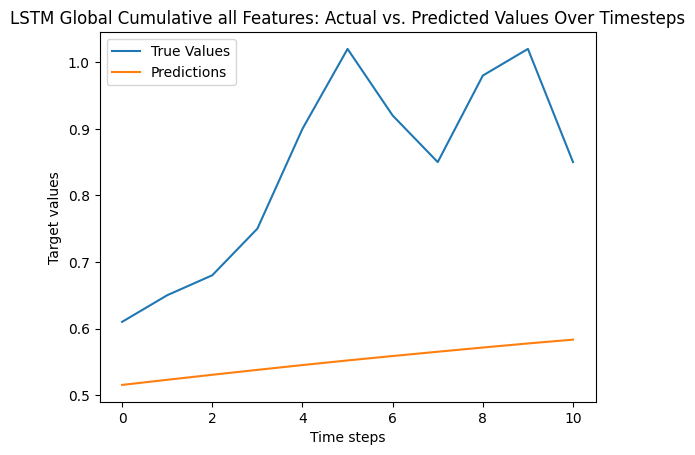

In [11]:
# Run predictions
predictions = best_model.predict(X_test_lstm)

# If you want to see the results
print(predictions)

plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Global Cumulative all Features: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')

# Save the plot
plt.savefig('LSTM_Glob_all_bs1_prediction_plot.png')

plt.show()

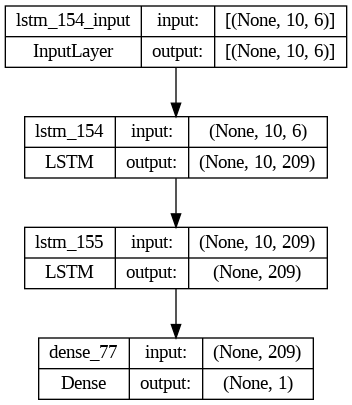

In [12]:
plot_model(best_model, to_file='LSTM_Glob_CO2_CO2_best_model_architecture.png', show_shapes=True, show_layer_names=True)

4/4 [==============================] - 0s 24ms/step


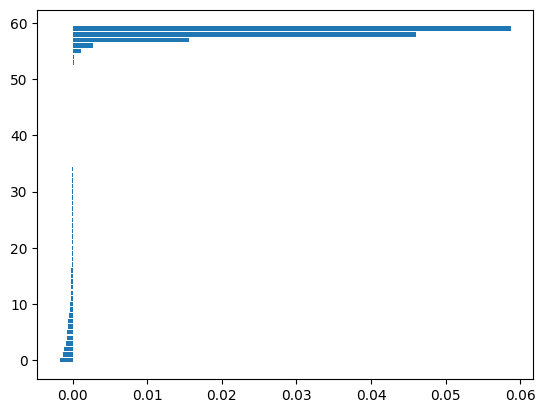

In [13]:
# COMPUTE FEATURE IMPORTANCES WITH PERMUTATION IMPORTANCE APPROACH

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance

# Flatten LSTM input data for more straight-forward interpretability
X_train_flat = X_train_lstm.reshape(X_train_lstm.shape[0], -1)

# Create a wrapper class around our LSTM model that adheres to the scikit-learn estimator interface.
# Reason: The permutation_importance function from scikit-learn expects an estimator object that implements the fit method
class LSTMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model, n_steps):
        self.model = model
        self.n_steps = n_steps

    def fit(self, X, y):
        # We won't use the fit method since our model is already trained.
        pass

    def predict(self, X):
        X_reshaped = X.reshape(X.shape[0], self.n_steps, -1)
        return self.model.predict(X_reshaped).flatten()

# Instantiate the wrapper
lstm_wrapper = LSTMWrapper(best_model, n_steps)

# Use permutation_importance with our wrapper
result = permutation_importance(lstm_wrapper, X_train_flat, y_train_lstm, n_repeats=30)
sorted_idx = result.importances_mean.argsort()

# Save results object
import pickle

with open('LSTM_Glob_all_bs1_best_model_permutation_importance_result.pkl', 'wb') as f:
    pickle.dump(result, f)

# Save importances to DataFrame
importances_df = pd.DataFrame({
    'feature': range(X_train_flat.shape[1]),
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# Save to CSV
importances_df.to_csv('LSTM_Glob_all_bs1_best_model_feature_importances.csv', index=False)

# Plot the importances, save the image
plt.barh(range(X_train_flat.shape[1]), result.importances_mean[sorted_idx])
plt.savefig('LSTM_Glob_all_bs1_best_model_feature_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


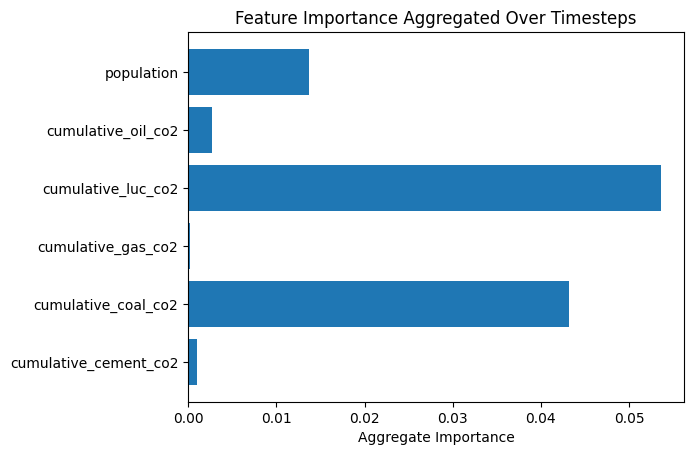

In [14]:
# AGGREGATE FEATURE IMPORTANCE SCORES ACROSS TIMESTEPS

importance_aggregated = np.zeros(6)

# Aggregate every 6th importance value
for i in range(6):
    importance_aggregated[i] = np.sum(result.importances_mean[i::6])

# Plotting the aggregated importances
features = ['cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population']  # Replace with your actual feature names

# Create a DataFrame with the feature names and their aggregated importance scores
importance_aggregated_df = pd.DataFrame({
    'feature': features,
    'importance_aggregated': importance_aggregated
})

# Save the DataFrame to a CSV file
importance_aggregated_df.to_csv('LSTM_Glob_all_bs1_best_model_aggregated_importances.csv', index=False)


plt.barh(features, importance_aggregated)
plt.xlabel('Aggregate Importance')
plt.title('Feature Importance Aggregated Over Timesteps')
plt.savefig('LSTM_Glob_all_bs1_best_model_aggregated_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


### 2.4.3 Country CO2



In [ ]:
# Consider countries via iso_code

# MODELING PIPELINE INCLUDING DATA PREPROCESSING, CLEANING, SPLIITING, FEATURE ENGINEERING, TRAINIGN AND HYPERPARAMETER OPTIMIZATION

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, Flatten
from sklearn.preprocessing import MinMaxScaler



# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_best_model.h5"
    RESULTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_results.csv'
    MODEL_ARCH_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_model_config.json'
    MODEL_WEIGHTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_library_versions.txt'


# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
                'cumulative_co2',
                'temp_change',
               'iso_code'
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(df):
    # One-hot encode the 'iso_code' column
    df = pd.get_dummies(df, columns=['iso_code'])

    # Split the data into training and testing sets
    train_data, test_data = split_data(df)

    # Scaling the 'cumulative_co2' column
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data['cumulative_co2'] = scaler.fit_transform(train_data[['cumulative_co2']])
    test_data['cumulative_co2'] = scaler.transform(test_data[['cumulative_co2']])

    return train_data, test_data, scaler


def reshape_for_lstm(data, n_steps=10):
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x, seq_y = data[i:i+n_steps, :-1], data[i+n_steps, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 32, 256, 32)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data, scaler = preprocess_data(df)  # This already includes the split_data function internally.

    # Define num_countries here after loading and preprocessing the data
    num_countries = df['iso_code'].nunique()

    # Extract relevant features and reshape for LSTM
    train_data_values = train_data[['iso_code', 'cumulative_co2']].values
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_values)

    test_data_values = test_data[['iso_code', 'cumulative_co2']].values
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_values)
    n_steps = 10

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)


    r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test,
        'Best Parameters': [str(study.best_params)]
    })


    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


<ipython-input-15-8063b4bbef2a>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cumulative_co2'] = scaler.fit_transform(train_data[['cumulative_co2']])
<ipython-input-15-8063b4bbef2a>:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cumulative_co2'] = scaler.transform(test_data[['cumulative_co2']])


KeyError: ignored

In [ ]:
# Consider countries via iso_code

# MODELING PIPELINE INCLUDING DATA PREPROCESSING, CLEANING, SPLIITING, FEATURE ENGINEERING, TRAINIGN AND HYPERPARAMETER OPTIMIZATION

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, Flatten
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Reshape



# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_best_model.h5"
    RESULTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_results.csv'
    MODEL_ARCH_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_model_config.json'
    MODEL_WEIGHTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2_2/LSTM_Country_CO2_library_versions.txt'


# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
                'cumulative_co2',
                'temp_change',
               'iso_code'
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(df):
    # # Drop unnecessary columns
    # df = df.drop(['country'], axis=1)

    # Convert date column to datetime format
    # df['year'] = pd.to_datetime(df['year'], format='%Y')

    # Label encode the 'iso_code' column
    le = LabelEncoder()
    df['iso_code'] = le.fit_transform(df['iso_code'])

    # Split the data into training and testing sets
    train_data, test_data = split_data(df)

    # Scaling the 'cumulative_co2' column
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data.loc[:, 'cumulative_co2'] = scaler.fit_transform(train_data[['cumulative_co2']])
    test_data.loc[:, 'cumulative_co2'] = scaler.transform(test_data[['cumulative_co2']])


    return train_data, test_data, scaler, le



def reshape_for_lstm(data, n_steps=10):
    X, y = [], []

    for i in range(len(data) - n_steps):
        seq_x, seq_y = data[i:i+n_steps, :-1], data[i+n_steps, -1]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)


def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 32, 256, 32)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    embedding_dim = trial.suggest_int("embedding_dim", 8, 64)

    model = Sequential()
    model.add(Embedding(input_dim=num_countries, output_dim=embedding_dim, input_length=1))
    model.add(Flatten())  # Flatten the embedding output
    model.add(Reshape((n_steps, embedding_dim)))

    model.add(LSTM(units=units, activation=activation, return_sequences=True))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data, scaler, label_encoder = preprocess_data(df)  # This already includes the split_data function internally.

    # Define num_countries here after loading and preprocessing the data
    num_countries = df['iso_code'].nunique()

    # Extract relevant features and reshape for LSTM
    train_data_values = train_data[['iso_code', 'cumulative_co2']].values
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_values)

    test_data_values = test_data[['iso_code', 'cumulative_co2']].values
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_values)
    n_steps = 10

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)


    r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test,
        'Best Parameters': [str(study.best_params)]
    })


    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


<ipython-input-18-5832521d6d56>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'cumulative_co2'] = scaler.fit_transform(train_data[['cumulative_co2']])
<ipython-input-18-5832521d6d56>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'cumulative_co2'] = scaler.transform(test_data[['cumulative_co2']])
[I 2023-10-21 16:32:38,756] A new study created in memory with name: no-name-16b8a7ee-9df3-437b-8a32-c5fad37e2c36
[W 2023-10-21 16:32:38,797] Trial 0 failed with parameter

ValueError: ignored

In [ ]:
# no replace

    # Load data
owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')
columns = ['year',
             'cumulative_co2',
                'temp_change',
           'iso_code',
                ]

    # replace all 0 with missing values
df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])
df

country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1961      AFG   8790140.0  1.314629e+10       0.022   
1      Afghanistan  1962      AFG   8969055.0  1.336763e+10       0.029   
2      Afghanistan  1963      AFG   9157463.0  1.363030e+10       0.051   
3      Afghanistan  1964      AFG   9355510.0  1.387050e+10       0.062   
4      Afghanistan  1965      AFG   9565154.0  1.418742e+10       0.084   
...            ...   ...      ...         ...           ...         ...   
13171     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
13172     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
13173     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
13174     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   
13175     Zimbabwe  2021      ZWE  15993525.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                      0.002   0.491           0.077           18.583  ...   
1                      0.003   0.689           0.198           40.301  ...   
2                      0.006   0.707           0.018            2.635  ...   
3                      0.007   0.839           0.132           18.651  ...   
4                      0.009   1.007           0.168           20.078  ...   
...                      ...     ...             ...              ...  ...   
13171                  0.032   9.596          -0.937           -8.899  ...   
13172                  0.037  11.795           2.199           22.920  ...   
13173                  0.037  11.115          -0.681           -5.772  ...   
13174                  0.036  10.608          -0.507           -4.559  ...   
13175                  0.036  11.296           0.688            6.488  ...   

       temperature_change_from_co2  temperature_change_from_ghg  \
0                              NaN                        0.001   
1                              NaN                        0.001   
2                              NaN                        0.001   
3                              NaN                        0.001   
4                              NaN                        0.001   
...                            ...                          ...   
13171                        0.001                        0.002   
13172                        0.001                        0.002   
13173                        0.001                        0.002   
13174                        0.001                        0.002   
13175                        0.001                        0.002   

       temperature_change_from_n2o  total_ghg  total_ghg_excluding_lucf  \
0                              NaN        NaN                       NaN   
1                              NaN        NaN                       NaN   
2                              NaN        NaN                       NaN   
3                              NaN        NaN                       NaN   
4                              NaN        NaN                       NaN   
...                            ...        ...                       ...   
13171                          NaN     115.59                     28.30   
13172                          NaN     118.22                     30.83   
13173                          NaN     117.96                     30.53   
13174                          NaN        NaN                       NaN   
13175                          NaN        NaN                       NaN   

       trade_co2  trade_co2_share                       Country  ISO3  \
0            NaN              NaN  Afghanistan, Islamic Rep. of   AFG   
1            NaN              NaN  Afghanistan, Islamic Rep. of   AFG   
2            NaN              NaN  Afghanistan, Islamic Rep. of   AFG   
3            NaN              NaN  Afghanistan, Islamic Rep. of   AFG   
4            NaN              NaN  Afghanistan, Islamic Rep. of   AFG   
...          ...             

In [ ]:
# CURRENT

# MODELING PIPELINE INCLUDING DATA PREPROCESSING, CLEANING, SPLIITING, FEATURE ENGINEERING, TRAINIGN AND HYPERPARAMETER OPTIMIZATION

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_best_model.h5"
    RESULTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_results.csv'
    MODEL_ARCH_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_model_config.json'
    MODEL_WEIGHTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_library_versions.txt'


# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
                'cumulative_co2',
                'temp_change',
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(train_data, test_data):
    """Preprocess the data."""
    # Split features and targets
    X_train = train_data.drop(columns=['temp_change', 'year'])
    y_train = train_data['temp_change']
    X_test = test_data.drop(columns=['temp_change', 'year'])
    y_test = test_data['temp_change']

    # Create and apply preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42, max_iter=10, initial_strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_test_preprocessed = pipeline.transform(X_test)

    # Save the preprocessing pipeline
    joblib.dump(pipeline, Config.PIPELINE_PATH)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test

def reshape_for_lstm(data, n_steps):
    """Reshape data for LSTM input."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps, -1])
    return np.array(X), np.array(y)

def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 32, 256, 32)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data = split_data(df)
    X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)

    n_steps = 10
    train_data_combined = np.hstack((X_train, y_train.values.reshape(-1, 1)))
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_combined, n_steps)

    test_data_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_combined, n_steps)

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)


    r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test,
        'Best Parameters': [str(study.best_params)]
    })


    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


[I 2023-10-14 19:46:27,832] A new study created in memory with name: no-name-e44be4e4-5e99-42c1-a79f-19c9a31b9dc4


Training with parameters: units=32, activation=relu, batch_size=16
Training with parameters: units=32, activation=relu, batch_size=16


[I 2023-10-14 19:58:16,595] Trial 0 finished with value: 0.36423400789499283 and parameters: {'units': 32, 'activation': 'relu', 'batch_size': 16}. Best is trial 0 with value: 0.36423400789499283.


Training with parameters: units=192, activation=sigmoid, batch_size=16
Training with parameters: units=192, activation=sigmoid, batch_size=16


[I 2023-10-14 20:18:08,387] Trial 1 finished with value: 0.24252481013536453 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 1 with value: 0.24252481013536453.


Training with parameters: units=192, activation=sigmoid, batch_size=32
Training with parameters: units=192, activation=sigmoid, batch_size=32


[I 2023-10-14 20:27:02,123] Trial 2 finished with value: 0.2408459112048149 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 2 with value: 0.2408459112048149.


Training with parameters: units=64, activation=relu, batch_size=64
Training with parameters: units=64, activation=relu, batch_size=64


[I 2023-10-14 20:31:51,714] Trial 3 finished with value: 0.2725231423974037 and parameters: {'units': 64, 'activation': 'relu', 'batch_size': 64}. Best is trial 2 with value: 0.2408459112048149.


Training with parameters: units=32, activation=relu, batch_size=64
Training with parameters: units=32, activation=relu, batch_size=64


[I 2023-10-14 20:35:16,983] Trial 4 finished with value: 0.2817612513899803 and parameters: {'units': 32, 'activation': 'relu', 'batch_size': 64}. Best is trial 2 with value: 0.2408459112048149.


Training with parameters: units=32, activation=tanh, batch_size=32
Training with parameters: units=32, activation=tanh, batch_size=32


[I 2023-10-14 20:41:09,490] Trial 5 finished with value: 0.2412937432527542 and parameters: {'units': 32, 'activation': 'tanh', 'batch_size': 32}. Best is trial 2 with value: 0.2408459112048149.


Training with parameters: units=32, activation=relu, batch_size=16
Training with parameters: units=32, activation=relu, batch_size=16


[I 2023-10-14 20:47:58,219] Trial 6 finished with value: 0.2648864760994911 and parameters: {'units': 32, 'activation': 'relu', 'batch_size': 16}. Best is trial 2 with value: 0.2408459112048149.


Training with parameters: units=32, activation=relu, batch_size=32
Training with parameters: units=32, activation=relu, batch_size=32


[I 2023-10-14 20:52:11,411] Trial 7 finished with value: 0.32672691345214844 and parameters: {'units': 32, 'activation': 'relu', 'batch_size': 32}. Best is trial 2 with value: 0.2408459112048149.


Training with parameters: units=160, activation=sigmoid, batch_size=32
Training with parameters: units=160, activation=sigmoid, batch_size=32


[I 2023-10-14 20:57:23,755] Trial 8 finished with value: 0.23903774470090866 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 8 with value: 0.23903774470090866.


Training with parameters: units=256, activation=sigmoid, batch_size=16
Training with parameters: units=256, activation=sigmoid, batch_size=16


[I 2023-10-14 21:14:18,080] Trial 9 finished with value: 0.2385990098118782 and parameters: {'units': 256, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 9 with value: 0.2385990098118782.


Training with parameters: units=256, activation=tanh, batch_size=16
Training with parameters: units=256, activation=tanh, batch_size=16


[I 2023-10-14 22:00:14,278] Trial 10 finished with value: 0.23716850578784943 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 16}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=256, activation=tanh, batch_size=16
Training with parameters: units=256, activation=tanh, batch_size=16


[I 2023-10-14 22:38:14,472] Trial 11 finished with value: 0.242680124938488 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 16}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=256, activation=tanh, batch_size=16
Training with parameters: units=256, activation=tanh, batch_size=16


[I 2023-10-14 23:34:10,721] Trial 12 finished with value: 0.2416890487074852 and parameters: {'units': 256, 'activation': 'tanh', 'batch_size': 16}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-15 00:19:03,991] Trial 13 finished with value: 0.2416180521249771 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=96, activation=sigmoid, batch_size=16
Training with parameters: units=96, activation=sigmoid, batch_size=16


[I 2023-10-15 00:23:07,445] Trial 14 finished with value: 0.2390054687857628 and parameters: {'units': 96, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=224, activation=tanh, batch_size=16
Training with parameters: units=224, activation=tanh, batch_size=16


[I 2023-10-15 01:09:03,087] Trial 15 finished with value: 0.2408621907234192 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 16}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=128, activation=sigmoid, batch_size=64
Training with parameters: units=128, activation=sigmoid, batch_size=64


[I 2023-10-15 01:12:13,218] Trial 16 finished with value: 0.24003152549266815 and parameters: {'units': 128, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=224, activation=sigmoid, batch_size=16
Training with parameters: units=224, activation=sigmoid, batch_size=16


[I 2023-10-15 01:43:26,715] Trial 17 finished with value: 0.24519038945436478 and parameters: {'units': 224, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 10 with value: 0.23716850578784943.


Training with parameters: units=256, activation=tanh, batch_size=16
Training with parameters: units=256, activation=tanh, batch_size=16


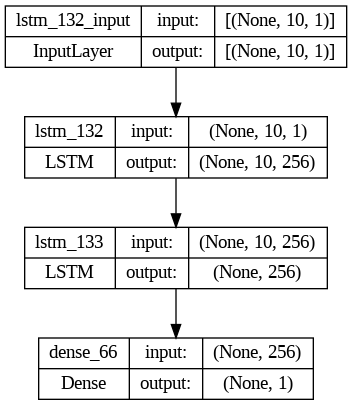

In [ ]:
# IN-DEPTH ANALYSIS BEST PERFORMING MODEL

# Model Visualization:

from keras.utils import plot_model

LSTM_Country_CO2_best_model = load_model('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_best_model.h5')

plot_model(LSTM_Country_CO2_best_model, to_file='/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Glob_CO2_best_model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

class Config:
    SPLIT_YEAR = 2000
    BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_best_model.h5'
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_preprocessing_pipeline.pkl'
    RESULTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_results.csv'

# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
                'cumulative_co2',
                'temp_change',
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(train_data, test_data):
    """Preprocess the data."""
    # Split features and targets
    X_train = train_data.drop(columns=['temp_change', 'year'])
    y_train = train_data['temp_change']
    X_test = test_data.drop(columns=['temp_change', 'year'])
    y_test = test_data['temp_change']

    # Create and apply preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42, max_iter=10, initial_strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_test_preprocessed = pipeline.transform(X_test)

    # Save the preprocessing pipeline
    joblib.dump(pipeline, Config.PIPELINE_PATH)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test

def reshape_for_lstm(data, n_steps):
    """Reshape data for LSTM input."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps, -1])
    return np.array(X), np.array(y)

def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )



# Load data
df = load_and_preprocess_data()

# Load preprocessing pipeline
pipeline = joblib.load(Config.PIPELINE_PATH)

# Preprocess and reshape data for LSTM
df = load_and_preprocess_data()
train_data, test_data = split_data(df)
X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)

n_steps = 10
train_data_combined = np.hstack((X_train, y_train.values.reshape(-1, 1)))
X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_combined, n_steps)

test_data_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_combined, n_steps)

# Load the saved model
LSTM_Glob_CO2_best_model = load_model(Config.BEST_MODEL_PATH)

# Run predictions
predictions = LSTM_Glob_CO2_best_model.predict(X_test_lstm)

best_model = load_model(Config.BEST_MODEL_PATH)



r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test
        # 'Best Parameters': [str(study.best_params)]
    }, index = [0])


    # Save results dataframe
results.to_csv(Config.RESULTS_PATH, index=False)

136/136 [==============================] - 3s 20ms/step


136/136 [==============================] - 4s 26ms/step
[[0.23871496]
 [0.23920797]
 [0.24005184]
 ...
 [0.22940598]
 [0.2295979 ]
 [0.23050418]]


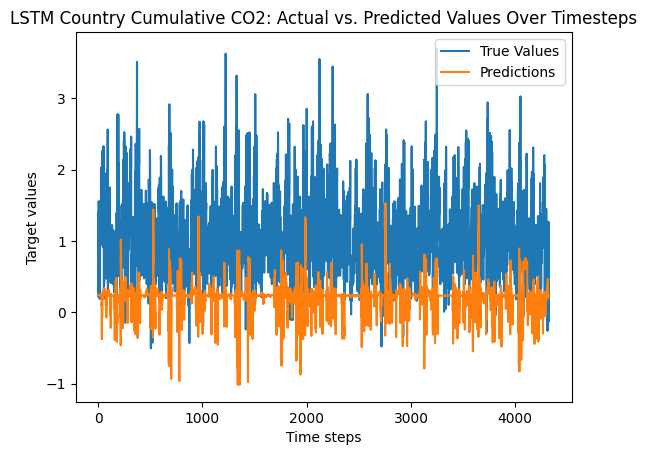

In [ ]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

class Config:
    SPLIT_YEAR = 2000
    BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_best_model.h5'
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_Country_CO2_preprocessing_pipeline.pkl'
    PLOT_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_CO2/LSTM_COuntry_CO2_Predictions.png'

def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
                'cumulative_co2',
                'temp_change',
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return test_data

def preprocess_data_for_lstm(data, pipeline, n_steps):
    """Preprocess and reshape data for LSTM input."""
    X = data.drop(columns=['temp_change', 'year'])
    y = data['temp_change']

    # Apply pipeline on the features only
    X_preprocessed = pipeline.transform(X)

    # Reshape both X and y for LSTM
    X_lstm, y_lstm = [], []
    for i in range(len(X_preprocessed) - n_steps):
        X_lstm.append(X_preprocessed[i:i + n_steps])
        y_lstm.append(y.iloc[i + n_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Load data
df = load_and_preprocess_data()
test_data = split_data(df)

# Load preprocessing pipeline
pipeline = joblib.load(Config.PIPELINE_PATH)

# Preprocess and reshape data for LSTM
n_steps = 10  # Assuming the same number of steps you used for training
X_test_lstm, y_test_lstm = preprocess_data_for_lstm(test_data, pipeline, n_steps)

# Load the saved model
LSTM_Glob_CO2_best_model = load_model(Config.BEST_MODEL_PATH)

# Run predictions
predictions = LSTM_Glob_CO2_best_model.predict(X_test_lstm)

# If you want to see the results
print(predictions)

plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Country Cumulative CO2: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')

# Save the plot
plt.savefig(Config.PLOT_PATH)

plt.show()

### 2.4.4 Country all features

In [ ]:
# CURRENT

# MODELING PIPELINE INCLUDING DATA PREPROCESSING, CLEANING, SPLIITING, FEATURE ENGINEERING, TRAINIGN AND HYPERPARAMETER OPTIMIZATION

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# Constants
class Config:
    SPLIT_YEAR = 2000
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_preprocessing_pipeline.pkl'
    BEST_MODEL_PATH = "/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_best_model.h5"
    RESULTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_results.csv'
    MODEL_ARCH_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_model_config.json'
    MODEL_WEIGHTS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_path_to_saved_weights.h5'
    LIBRARY_VERSIONS_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_library_versions.txt'


# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
              'cumulative_cement_co2',
              'cumulative_coal_co2',
              'cumulative_gas_co2',
              'cumulative_luc_co2',
              'cumulative_oil_co2',
                'temp_change',
                'population',
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data

def preprocess_data(train_data, test_data):
    """Preprocess the data."""
    # Split features and targets
    X_train = train_data.drop(columns=['temp_change', 'year'])
    y_train = train_data['temp_change']
    X_test = test_data.drop(columns=['temp_change', 'year'])
    y_test = test_data['temp_change']

    # Create and apply preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42, max_iter=10, initial_strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X_train_preprocessed = pipeline.fit_transform(X_train)
    X_test_preprocessed = pipeline.transform(X_test)

    # Save the preprocessing pipeline
    joblib.dump(pipeline, Config.PIPELINE_PATH)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test

def reshape_for_lstm(data, n_steps):
    """Reshape data for LSTM input."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps, -1])
    return np.array(X), np.array(y)

def compute_metrics(model, X, y):
    """Compute metrics."""
    predictions = model.predict(X)
    return (
        r2_score(y, predictions),
        mean_absolute_error(y, predictions),
        mean_squared_error(y, predictions),
        np.sqrt(mean_squared_error(y, predictions))
    )


def objective(trial):
    """Objective function for hyperparameter optimization."""
    units = trial.suggest_int("units", 32, 256, 32)
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    tscv = TimeSeriesSplit(n_splits=2)
    validation_scores = []

    for train_index, val_index in tscv.split(X_train_lstm):
        X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[val_index]
        y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

        print(f"Training with parameters: units={units}, activation={activation}, batch_size={batch_size}")

        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])
        validation_scores.append(model.evaluate(X_val_fold, y_val_fold, verbose=0))

    current_value = np.mean(validation_scores)

    # If current trial is better than the previous best (if any), save the model
    if trial.number == 0 or current_value < study.best_value:
        # Save in SavedModel format
        model.save(Config.BEST_MODEL_PATH, save_format='tf')

        # Save architecture and weights separately
        json_config = model.to_json()
        with open(Config.MODEL_ARCH_PATH, 'w') as json_file:
            json_file.write(json_config)
        model.save_weights(Config.MODEL_WEIGHTS_PATH)

    return current_value

# Main Execution
if __name__ == "__main__":
    df = load_and_preprocess_data()
    train_data, test_data = split_data(df)
    X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)

    n_steps = 10
    train_data_combined = np.hstack((X_train, y_train.values.reshape(-1, 1)))
    X_train_lstm, y_train_lstm = reshape_for_lstm(train_data_combined, n_steps)

    test_data_combined = np.hstack((X_test, y_test.values.reshape(-1, 1)))
    X_test_lstm, y_test_lstm = reshape_for_lstm(test_data_combined, n_steps)

    input_shape = (n_steps, X_train_lstm.shape[2])

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Load the best model and evaluate
    # Loading from SavedModel format
    best_model = load_model(Config.BEST_MODEL_PATH)

    # Alternatively, loading from separate architecture and weights (use if needed)
    # from tensorflow.keras.models import model_from_json
    # with open(Config.MODEL_ARCH_PATH) as json_file:
    #     json_config = json_file.read()
    # best_model = model_from_json(json_config)
    # best_model.load_weights(Config.MODEL_WEIGHTS_PATH)


    r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
    r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

    results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test,
        'Best Parameters': [str(study.best_params)]
    })


    # Save results dataframe
    results.to_csv(Config.RESULTS_PATH, index=False)

    # Save library versions for reproducibility
    versions = {
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'keras': Sequential.__module__.split('.')[0] + '.' + Sequential.__module__.split('.')[1],
        'sklearn': sklearn.__version__,
        'optuna': optuna.__version__
    }

    with open(Config.LIBRARY_VERSIONS_PATH, 'w') as f:
        for lib, version in versions.items():
            f.write(f"{lib}: {version}\n")

    print(results)


[I 2023-10-15 08:09:04,102] A new study created in memory with name: no-name-e1ad173c-203e-4b6b-aed6-a1e8fe82c417


Training with parameters: units=128, activation=tanh, batch_size=64
Training with parameters: units=128, activation=tanh, batch_size=64


[I 2023-10-15 08:20:08,125] Trial 0 finished with value: 0.27270451188087463 and parameters: {'units': 128, 'activation': 'tanh', 'batch_size': 64}. Best is trial 0 with value: 0.27270451188087463.


Training with parameters: units=160, activation=sigmoid, batch_size=32
Training with parameters: units=160, activation=sigmoid, batch_size=32


[I 2023-10-15 08:37:01,730] Trial 1 finished with value: 0.248320072889328 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 1 with value: 0.248320072889328.


Training with parameters: units=96, activation=relu, batch_size=16
Training with parameters: units=96, activation=relu, batch_size=16


[I 2023-10-15 08:48:24,014] Trial 2 finished with value: 0.5990811437368393 and parameters: {'units': 96, 'activation': 'relu', 'batch_size': 16}. Best is trial 1 with value: 0.248320072889328.


Training with parameters: units=224, activation=sigmoid, batch_size=32
Training with parameters: units=224, activation=sigmoid, batch_size=32


[I 2023-10-15 09:09:59,843] Trial 3 finished with value: 0.251870758831501 and parameters: {'units': 224, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 1 with value: 0.248320072889328.


Training with parameters: units=224, activation=tanh, batch_size=64
Training with parameters: units=224, activation=tanh, batch_size=64


[I 2023-10-15 09:28:52,814] Trial 4 finished with value: 0.2769663780927658 and parameters: {'units': 224, 'activation': 'tanh', 'batch_size': 64}. Best is trial 1 with value: 0.248320072889328.


Training with parameters: units=192, activation=sigmoid, batch_size=32
Training with parameters: units=192, activation=sigmoid, batch_size=32


[I 2023-10-15 09:43:17,722] Trial 5 finished with value: 0.24600610882043839 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=192, activation=relu, batch_size=32
Training with parameters: units=192, activation=relu, batch_size=32


[I 2023-10-15 10:05:08,398] Trial 6 finished with value: 0.344598188996315 and parameters: {'units': 192, 'activation': 'relu', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=96, activation=relu, batch_size=32
Training with parameters: units=96, activation=relu, batch_size=32


[I 2023-10-15 10:12:59,353] Trial 7 finished with value: 0.7117960751056671 and parameters: {'units': 96, 'activation': 'relu', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=64, activation=tanh, batch_size=16
Training with parameters: units=64, activation=tanh, batch_size=16


[I 2023-10-15 10:24:02,999] Trial 8 finished with value: 0.280615970492363 and parameters: {'units': 64, 'activation': 'tanh', 'batch_size': 16}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=192, activation=tanh, batch_size=32
Training with parameters: units=192, activation=tanh, batch_size=32


[I 2023-10-15 10:45:27,712] Trial 9 finished with value: 0.27372634410858154 and parameters: {'units': 192, 'activation': 'tanh', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=256, activation=sigmoid, batch_size=16
Training with parameters: units=256, activation=sigmoid, batch_size=16


[I 2023-10-15 11:30:19,267] Trial 10 finished with value: 0.27545876801013947 and parameters: {'units': 256, 'activation': 'sigmoid', 'batch_size': 16}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=160, activation=sigmoid, batch_size=32
Training with parameters: units=160, activation=sigmoid, batch_size=32


[I 2023-10-15 11:42:09,625] Trial 11 finished with value: 0.24848764389753342 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=160, activation=sigmoid, batch_size=32
Training with parameters: units=160, activation=sigmoid, batch_size=32


[I 2023-10-15 11:58:59,229] Trial 12 finished with value: 0.24996746331453323 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=32, activation=sigmoid, batch_size=32
Training with parameters: units=32, activation=sigmoid, batch_size=32


[I 2023-10-15 12:02:46,980] Trial 13 finished with value: 0.25294414162635803 and parameters: {'units': 32, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=128, activation=sigmoid, batch_size=64
Training with parameters: units=128, activation=sigmoid, batch_size=64


[I 2023-10-15 12:11:36,824] Trial 14 finished with value: 0.24898090213537216 and parameters: {'units': 128, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=192, activation=sigmoid, batch_size=32
Training with parameters: units=192, activation=sigmoid, batch_size=32


[I 2023-10-15 12:23:27,501] Trial 15 finished with value: 0.24914108961820602 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=256, activation=sigmoid, batch_size=32
Training with parameters: units=256, activation=sigmoid, batch_size=32


[I 2023-10-15 12:54:19,960] Trial 16 finished with value: 0.2549515813589096 and parameters: {'units': 256, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=160, activation=sigmoid, batch_size=32
Training with parameters: units=160, activation=sigmoid, batch_size=32


[I 2023-10-15 13:11:09,326] Trial 17 finished with value: 0.24863874912261963 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=224, activation=sigmoid, batch_size=64
Training with parameters: units=224, activation=sigmoid, batch_size=64


[I 2023-10-15 13:26:00,872] Trial 18 finished with value: 0.2520376145839691 and parameters: {'units': 224, 'activation': 'sigmoid', 'batch_size': 64}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=96, activation=relu, batch_size=16
Training with parameters: units=96, activation=relu, batch_size=16


[I 2023-10-15 13:38:20,158] Trial 19 finished with value: 0.38022077083587646 and parameters: {'units': 96, 'activation': 'relu', 'batch_size': 16}. Best is trial 5 with value: 0.24600610882043839.


Training with parameters: units=128, activation=sigmoid, batch_size=32
Training with parameters: units=128, activation=sigmoid, batch_size=32


[I 2023-10-15 13:49:00,144] Trial 20 finished with value: 0.24483688920736313 and parameters: {'units': 128, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 20 with value: 0.24483688920736313.


Training with parameters: units=128, activation=sigmoid, batch_size=32
Training with parameters: units=128, activation=sigmoid, batch_size=32


[I 2023-10-15 14:01:43,734] Trial 21 finished with value: 0.24870877712965012 and parameters: {'units': 128, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 20 with value: 0.24483688920736313.


Training with parameters: units=160, activation=sigmoid, batch_size=32
Training with parameters: units=160, activation=sigmoid, batch_size=32


[I 2023-10-15 14:20:33,578] Trial 22 finished with value: 0.248178131878376 and parameters: {'units': 160, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 20 with value: 0.24483688920736313.


Training with parameters: units=192, activation=sigmoid, batch_size=32
Training with parameters: units=192, activation=sigmoid, batch_size=32


[I 2023-10-15 14:42:24,705] Trial 23 finished with value: 0.2611316293478012 and parameters: {'units': 192, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 20 with value: 0.24483688920736313.


Training with parameters: units=128, activation=sigmoid, batch_size=32
Training with parameters: units=128, activation=sigmoid, batch_size=32


[I 2023-10-15 14:53:54,632] Trial 24 finished with value: 0.24695680290460587 and parameters: {'units': 128, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 20 with value: 0.24483688920736313.


Training with parameters: units=64, activation=sigmoid, batch_size=32
Training with parameters: units=64, activation=sigmoid, batch_size=32


[I 2023-10-15 14:59:26,858] Trial 25 finished with value: 0.2484859749674797 and parameters: {'units': 64, 'activation': 'sigmoid', 'batch_size': 32}. Best is trial 20 with value: 0.24483688920736313.


Training with parameters: units=128, activation=sigmoid, batch_size=32


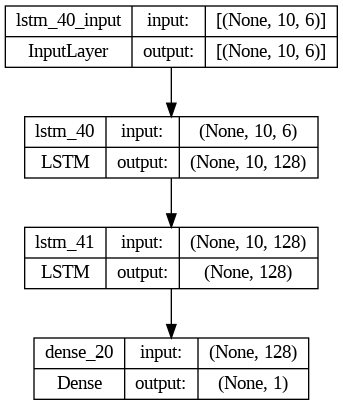

In [ ]:
# IN-DEPTH ANALYSIS BEST PERFORMING MODEL

# Model Visualization:

from keras.utils import plot_model

LSTM_Country_all_best_model = load_model('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_best_model.h5')

plot_model(LSTM_Country_all_best_model, to_file='/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_best_model_architecture.png', show_shapes=True, show_layer_names=True)



In [ ]:
# Results

class Config:
    SPLIT_YEAR = 2000
    BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_best_model.h5'
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_preprocessing_pipeline.pkl'

# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
              'cumulative_cement_co2',
              'cumulative_coal_co2',
              'cumulative_gas_co2',
              'cumulative_luc_co2',
              'cumulative_oil_co2',
                'temp_change',
                'population',
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data


def preprocess_data_for_lstm(data, pipeline, n_steps):
    """Preprocess and reshape data for LSTM input."""
    X = data.drop(columns=['temp_change', 'year'])
    y = data['temp_change']

    # Apply pipeline on the features only
    X_preprocessed = pipeline.transform(X)

    # Reshape both X and y for LSTM
    X_lstm, y_lstm = [], []
    for i in range(len(X_preprocessed) - n_steps):
        X_lstm.append(X_preprocessed[i:i + n_steps])
        y_lstm.append(y.iloc[i + n_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Load data
df = load_and_preprocess_data()
train_data, test_data = split_data(df)


# Load preprocessing pipeline
pipeline = joblib.load(Config.PIPELINE_PATH)

# Preprocess and reshape data for LSTM for both train and test
n_steps = 10
X_train_lstm, y_train_lstm = preprocess_data_for_lstm(train_data, pipeline, n_steps)
X_test_lstm, y_test_lstm = preprocess_data_for_lstm(test_data, pipeline, n_steps)


# Load the saved model
LSTM_Country_all_best_model = load_model(Config.BEST_MODEL_PATH)

# Load the best model and evaluate
# Loading from SavedModel format
best_model = load_model("/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_best_model.h5")

r2_train, mae_train, mse_train, rmse_train = compute_metrics(best_model, X_train_lstm, y_train_lstm)
r2_test, mae_test, mse_test, rmse_test = compute_metrics(best_model, X_test_lstm, y_test_lstm)

results = pd.DataFrame({
        'Model': 'LSTM',
        'Scope': 'Global',
        'Features': 'all',
        'R2 train': r2_train,
        'R2 test': r2_test,
        'MAE train': mae_train,
        'MAE test': mae_test,
        'MSE train': mse_train,
        'MSE test': mse_test,
        'RMSE train': rmse_train,
        'RMSE test': rmse_test
        # 'Best Parameters': [str(study.best_params)]
    }, index = [0])


    # Save results dataframe
results.to_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_results.csv')

136/136 [==============================] - 2s 17ms/step


136/136 [==============================] - 4s 24ms/step
[[0.1546892 ]
 [0.1542024 ]
 [0.1537557 ]
 ...
 [0.1392976 ]
 [0.13928764]
 [0.13923591]]


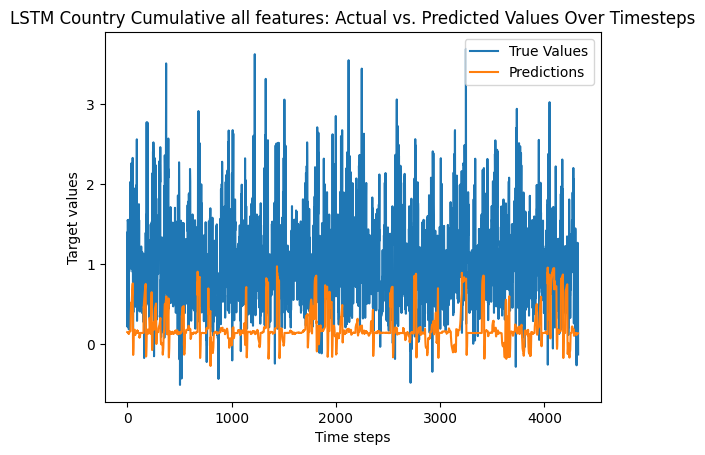

In [ ]:
# IN-DEPTH ANALYSIS BEST MODEL

# PREDICTION Plot

import pandas as pd
import joblib
from tensorflow.keras.models import load_model

class Config:
    SPLIT_YEAR = 2000
    BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_best_model.h5'
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_Country_all_preprocessing_pipeline.pkl'
    PLOT_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Country_all/LSTM_COuntry_all_Predictions.png'

# Data Preprocessing
def load_and_preprocess_data():
    """Load and preprocess the data."""

    # Load data
    owid_data = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
    annual_temp_change_data = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/Annual_Surface_Temperature_Change.csv')

    # Adjust the columns and reshape the Annual Surface Temperature Change dataset for merging
    temp_change_melted = annual_temp_change_data.melt(id_vars=['Country', 'ISO3'],
                                                      value_vars=[f'F{i}' for i in range(1961, 2023)],
                                                      var_name='year', value_name='temp_change')

    # Convert the 'year' column to integer for merging
    temp_change_melted['year'] = temp_change_melted['year'].str[1:].astype(int)

    # Merge the datasets on country and year
    df= pd.merge(owid_data, temp_change_melted,
                          left_on=['iso_code', 'year'],
                          right_on=['ISO3', 'year'],
                          how='inner')

    columns = ['year',
              'cumulative_cement_co2',
              'cumulative_coal_co2',
              'cumulative_gas_co2',
              'cumulative_luc_co2',
              'cumulative_oil_co2',
                'temp_change',
                'population',
                ]

    # replace all 0 with missing values
    df = df.replace(0, np.nan)

    # Select relevant columns
    df = df[columns]

    # drop all NaN for target
    df = df.dropna(subset=['temp_change'])

    return df

def split_data(df):
    """Split data into training and testing sets."""
    train_data = df[df['year'] <= Config.SPLIT_YEAR]
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return train_data, test_data


def preprocess_data_for_lstm(data, pipeline, n_steps):
    """Preprocess and reshape data for LSTM input."""
    X = data.drop(columns=['temp_change', 'year'])
    y = data['temp_change']

    # Apply pipeline on the features only
    X_preprocessed = pipeline.transform(X)

    # Reshape both X and y for LSTM
    X_lstm, y_lstm = [], []
    for i in range(len(X_preprocessed) - n_steps):
        X_lstm.append(X_preprocessed[i:i + n_steps])
        y_lstm.append(y.iloc[i + n_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Load data
df = load_and_preprocess_data()
train_data, test_data = split_data(df)


# Load preprocessing pipeline
pipeline = joblib.load(Config.PIPELINE_PATH)

# Preprocess and reshape data for LSTM for both train and test
n_steps = 10
X_train_lstm, y_train_lstm = preprocess_data_for_lstm(train_data, pipeline, n_steps)
X_test_lstm, y_test_lstm = preprocess_data_for_lstm(test_data, pipeline, n_steps)


# Load the saved model
LSTM_Country_all_best_model = load_model(Config.BEST_MODEL_PATH)

# Run predictions
predictions = LSTM_Country_all_best_model.predict(X_test_lstm)

# If you want to see the results
print(predictions)

plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Country Cumulative all features: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')

# Save the plot
# plt.savefig(Config.PLOT_PATH)

plt.show()

232/232 [==============================] - 3s 14ms/step


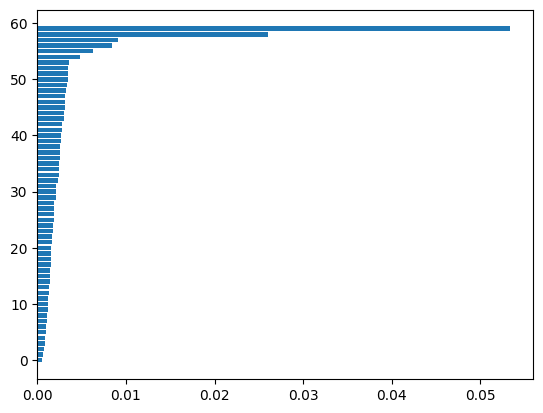

In [ ]:
# COMPUTE FEATURE IMPORTANCES WITH PERMUTATION IMPORTANCE APPROACH

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance

# Flatten LSTM input data for more straight-forward interpretability
X_train_flat = X_train_lstm.reshape(X_train_lstm.shape[0], -1)

# Create a wrapper class around our LSTM model that adheres to the scikit-learn estimator interface.
# Reason: The permutation_importance function from scikit-learn expects an estimator object that implements the fit method
class LSTMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model, n_steps):
        self.model = model
        self.n_steps = n_steps

    def fit(self, X, y):
        # We won't use the fit method since our model is already trained.
        pass

    def predict(self, X):
        X_reshaped = X.reshape(X.shape[0], self.n_steps, -1)
        return self.model.predict(X_reshaped).flatten()

# Instantiate the wrapper
lstm_wrapper = LSTMWrapper(LSTM_Country_all_best_model, n_steps)

# Use permutation_importance with our wrapper
result = permutation_importance(lstm_wrapper, X_train_flat, y_train_lstm, n_repeats=30)
sorted_idx = result.importances_mean.argsort()

# Save results object
import pickle

with open('LSTM_Country_all_best_model_permutation_importance_result.pkl', 'wb') as f:
    pickle.dump(result, f)

# Save importances to DataFrame
importances_df = pd.DataFrame({
    'feature': range(X_train_flat.shape[1]),
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# Save to CSV
importances_df.to_csv('LSTM_Country_all_best_model_feature_importances.csv', index=False)

# Plot the importances, save the image
plt.barh(range(X_train_flat.shape[1]), result.importances_mean[sorted_idx])
plt.savefig('LSTM_Country_all_best_model_feature_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


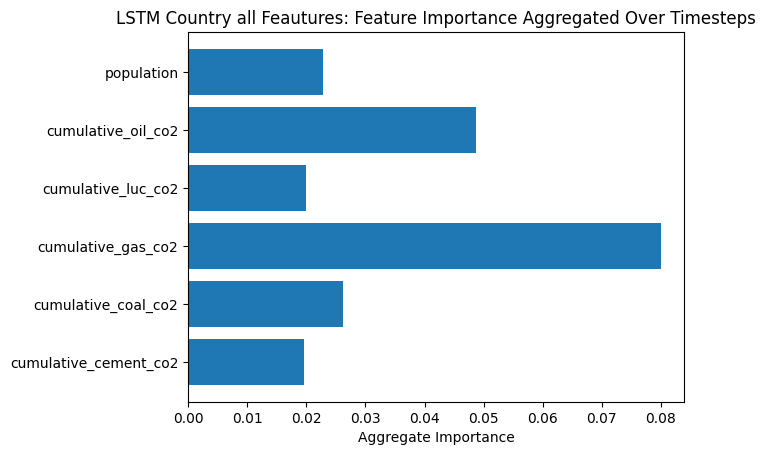

In [ ]:
# AGGREGATE FEATURE IMPORTANCE SCORES ACROSS TIMESTEPS

importance_aggregated = np.zeros(6)

# Aggregate every 6th importance value
for i in range(6):
    importance_aggregated[i] = np.sum(result.importances_mean[i::6])

# Plotting the aggregated importances
features = ['cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population']  # Replace with your actual feature names

# Create a DataFrame with the feature names and their aggregated importance scores
importance_aggregated_df = pd.DataFrame({
    'feature': features,
    'importance_aggregated': importance_aggregated
})

# Save the DataFrame to a CSV file
importance_aggregated_df.to_csv('LSTM_Country_all_best_model_aggregated_importances.csv', index=False)


plt.barh(features, importance_aggregated)
plt.xlabel('Aggregate Importance')
plt.title('LSTM Country all Feautures: Feature Importance Aggregated Over Timesteps')
plt.savefig('LSTM_Country_all_best_model_aggregated_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


### 2.4.5 Overall LSTM performance overview

In [ ]:
results_lstm_cum = pd.concat([results_LSTM_nasa_cum_co2_new,
                              results_LSTM_nasa_cum_all_new,
                              results_LSTM_fao_cum_co2_new,
                                results_LSTM_fao_cum_all_new

                           ])

results_lstm_cum = results_lstm_cum.round(3)

results_lstm_cum

### 2.4.6 In-depth analysis best performing LSTM model (global, all features)

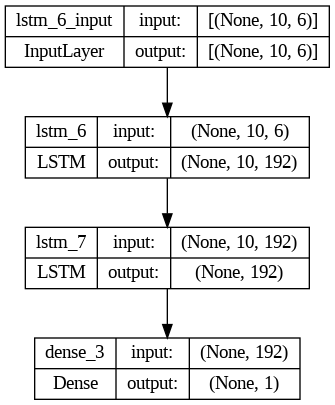

In [ ]:
# Model Visualization:

from tensorflow.keras.models import load_model
from keras.utils import plot_model

LSTM_Glob_all_best_model = load_model('/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all_best_model.h5')

plot_model(LSTM_Glob_all_best_model, to_file='LSTM_Glob_all_best_model_architecture.png', show_shapes=True, show_layer_names=True)


1/1 [==============================] - 1s 541ms/step
[[0.5829976 ]
 [0.59450316]
 [0.6058483 ]
 [0.6169598 ]
 [0.6278659 ]
 [0.6384678 ]
 [0.6486338 ]
 [0.6584739 ]
 [0.66803354]
 [0.67730355]
 [0.68598866]]


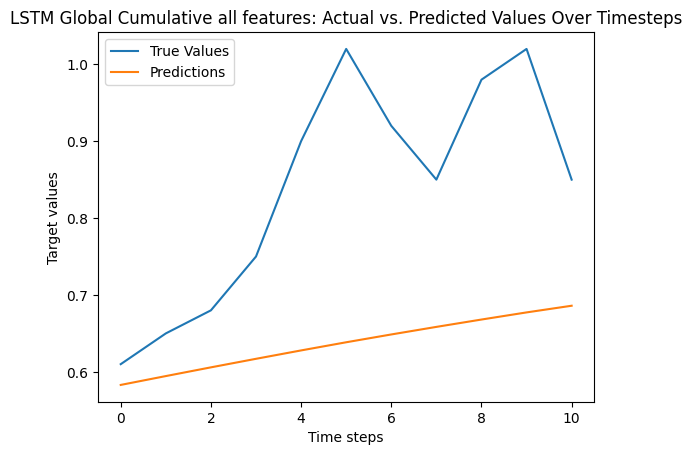

In [ ]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

class Config:
    SPLIT_YEAR = 2000
    BEST_MODEL_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all_best_model.h5'
    PIPELINE_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Glob_all_preprocessing_pipeline.pkl'
    PLOT_PATH = '/content/drive/MyDrive/DA Project World Climate Data/Data/Models/LSTM_Global_all_Predictions.png'

def load_and_preprocess_data():
    """Load and preprocess the data."""
    # Load data
    df_NASA = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/ZonAnn.Ts+dSST.csv')
    df_OWID = pd.read_csv('/content/drive/MyDrive/DA Project World Climate Data/Data/owid-co2-data.csv')

    # Merging and renaming columns
    df = df_OWID[df_OWID.country == 'World'].merge(df_NASA[['Year', 'Glob']], left_on='year', right_on='Year').rename(columns={'Glob': 'temp_change'})
    df.replace(0, np.nan, inplace=True)

    # Selecting the required features
    features = ['year', 'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population', 'temp_change']
    df = df[features].dropna(subset=['temp_change'])
    return df

def split_data(df):
    """Split data into training and testing sets."""
    test_data = df[df['year'] > Config.SPLIT_YEAR]
    return test_data

def preprocess_data_for_lstm(data, pipeline, n_steps):
    """Preprocess and reshape data for LSTM input."""
    X = data.drop(columns=['temp_change', 'year'])
    y = data['temp_change']

    # Apply pipeline on the features only
    X_preprocessed = pipeline.transform(X)

    # Reshape both X and y for LSTM
    X_lstm, y_lstm = [], []
    for i in range(len(X_preprocessed) - n_steps):
        X_lstm.append(X_preprocessed[i:i + n_steps])
        y_lstm.append(y.iloc[i + n_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Load data
df = load_and_preprocess_data()
test_data = split_data(df)

# Load preprocessing pipeline
pipeline = joblib.load(Config.PIPELINE_PATH)

# Preprocess and reshape data for LSTM
n_steps = 10  # Assuming the same number of steps you used for training
X_test_lstm, y_test_lstm = preprocess_data_for_lstm(test_data, pipeline, n_steps)

# Load the saved model
LSTM_Glob_all_best_model = load_model(Config.BEST_MODEL_PATH)

# Run predictions
predictions = LSTM_Glob_all_best_model.predict(X_test_lstm)

# If you want to see the results
print(predictions)

plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Global Cumulative all features: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')

# Save the plot
plt.savefig(Config.PLOT_PATH)

plt.show()

1/1 [==============================] - 1s 898ms/step


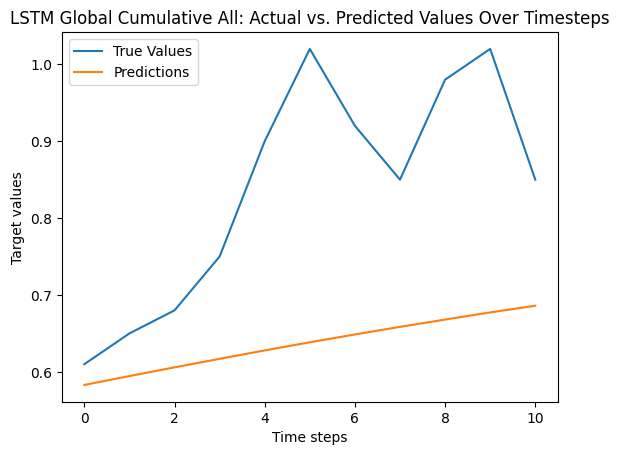

In [ ]:
# Prediction Plot

import matplotlib.pyplot as plt
predictions = LSTM_Glob_CO2_best_model.predict(X_test_lstm)
plt.plot(y_test_lstm, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("LSTM Global Cumulative All: Actual vs. Predicted Values Over Timesteps")
plt.xlabel('Time steps')
plt.ylabel('Target values')
plt.show()


4/4 [==============================] - 0s 33ms/step


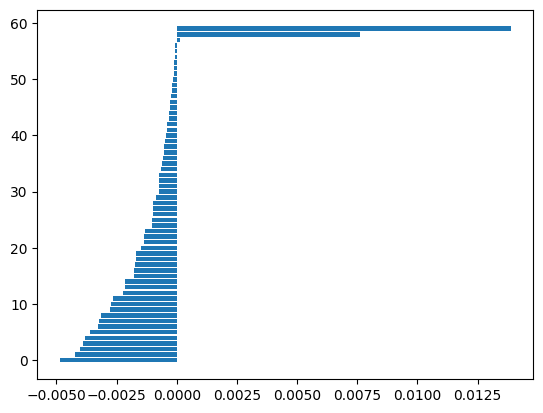

In [ ]:
# COMPUTE FEATURE IMPORTANCES WITH PERMUTATION IMPORTANCE APPROACH

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance

# Flatten LSTM input data for more straight-forward interpretability
X_train_flat = X_train_lstm.reshape(X_train_lstm.shape[0], -1)

# Create a wrapper class around our LSTM model that adheres to the scikit-learn estimator interface.
# Reason: The permutation_importance function from scikit-learn expects an estimator object that implements the fit method
class LSTMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model, n_steps):
        self.model = model
        self.n_steps = n_steps

    def fit(self, X, y):
        # We won't use the fit method since our model is already trained.
        pass

    def predict(self, X):
        X_reshaped = X.reshape(X.shape[0], self.n_steps, -1)
        return self.model.predict(X_reshaped).flatten()

# Instantiate the wrapper
lstm_wrapper = LSTMWrapper(LSTM_Glob_CO2_best_model, n_steps)

# Use permutation_importance with our wrapper
result = permutation_importance(lstm_wrapper, X_train_flat, y_train_lstm, n_repeats=30)
sorted_idx = result.importances_mean.argsort()

# Save results object
import pickle

with open('LSTM_Glob_all_best_model_permutation_importance_result.pkl', 'wb') as f:
    pickle.dump(result, f)

# Save importances to DataFrame
importances_df = pd.DataFrame({
    'feature': range(X_train_flat.shape[1]),
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# Save to CSV
importances_df.to_csv('LSTM_Glob_all_best_model_feature_importances.csv', index=False)

# Plot the importances, save the image
# plt.barh(range(X_train_flat.shape[1]), result.importances_mean[sorted_idx])
# plt.show()

plt.barh(range(X_train_flat.shape[1]), result.importances_mean[sorted_idx])
plt.savefig('LSTM_Glob_all_best_model_feature_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


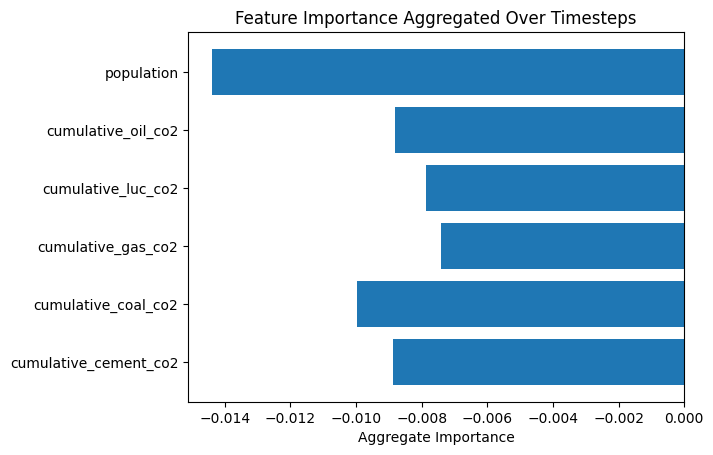

In [ ]:
# AGGREGATE FEATURE IMPORTANCE SCORES ACROSS TIMESTEPS

importance_aggregated = np.zeros(6)

# Aggregate every 6th importance value
for i in range(6):
    importance_aggregated[i] = np.sum(result.importances_mean[i::6])

# Plotting the aggregated importances
features = ['cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
                'cumulative_luc_co2', 'cumulative_oil_co2', 'population']  # Replace with your actual feature names

# Create a DataFrame with the feature names and their aggregated importance scores
importance_aggregated_df = pd.DataFrame({
    'feature': features,
    'importance_aggregated': importance_aggregated
})

# Save the DataFrame to a CSV file
importance_aggregated_df.to_csv('LSTM_Glob_all_best_model_aggregated_importances.csv', index=False)


plt.barh(features, importance_aggregated)
plt.xlabel('Aggregate Importance')
plt.title('Feature Importance Aggregated Over Timesteps')
plt.savefig('LSTM_Glob_all_best_model_aggregated_importances_plot.png', bbox_inches='tight', dpi=300)
plt.show()


## 2.5 Comparing all models

In [ ]:
results_total = pd.concat([results_final_cum, results_lstm_cum, results_sarima_glob_cum_co2]).round(3).drop(columns = 'Best Parameters')

results_total = results_total.sort_values(by = 'MSE test')

results_total